The Following Notebook represents the computational pipeline to produce each of the figures of the supplement. As such, it should remain in its appropriate folder and not be transferred to the folder of the main figures.

Some preliminary code is required to run all further analyses, marked at the top of the notebook.

The code required to generate the figures will be delineated with the name (Supplemental Figure X) Code below, with the code that produces each specific subfigure will be named (Supplemental Figure XN) Figure below

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

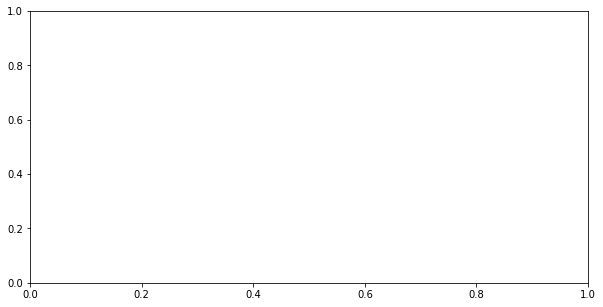

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
from sklearn.metrics import mutual_info_score

plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import networkx as nx
from operator import itemgetter
from scipy.spatial import distance_matrix

from collections import Counter

from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

import seaborn
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial import distance
plt.yticks(fontsize=10);plt.xticks(fontsize=10)

In [2]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]
refnameset,refdictset = [],[]

refsortset = []
sortset = []


for filename in os.listdir(directory):
    if filename.endswith(".txt") and '._' not in filename:
        if 'REF' not in filename:
            impath = os.path.join(directory, filename)
            nameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',') * 1.25
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            dictset.append(this_set)
            sortset.append((impath, this_set))
        else:
            impath = os.path.join(directory, filename)
            refnameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',') * 1.25
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            refdictset.append(this_set)
            refsortset.append((impath, this_set))
    
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))
truncator = len(nameset)

nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(n[1])

1322 1322
30 30


In [3]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 25)
    plt.show()

In [4]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

#'''
nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))
    
refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(remove_dangling_children(n[1]))
#'''

In [5]:
#part 1 of common node
refnodelist = set(refdictset[0])
for n in refdictset:
    refnodelist = set(n).intersection(refnodelist)

In [6]:
#part 2 of common node
newdictset = []
for n in refdictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
refdictset = newdictset

In [7]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [8]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)

In [9]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

match_links = []
match_links2 = []

findit = 0
notin = 0

o = 0
for n in range(0,df.shape[0]):
    #print(rdf.iloc[n][1] in nameset[o])
    if rdf.iloc[n][1] in nameset[o]:
        #match_links.append((o,n)) #, o in nameset, #n in dataframe
        match_links.append(n) #index is o in nameset, list value is n in dataframe
        tagref = 0
        for nm in list(globaldictset[o]):
            if cuttags[tagref] not in nm:
                try:
                    tagref = tagref + 1
                    if tagref > 6:
                        break
                except:
                    break
            #findit = findit + (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5])
            if (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5]): 
                #print(nameset[o].split('/')[-1])
                #print(rdf.iloc[n][1])
                #print('tag',o,'embryo',n,nm,globaldictset[o][nm],rdf.iloc[n][rearranger[tagref]+5])
                del dictset[o][nm]
        o = o + 1
    else:
        pass
        match_links2.append((o,-1))
        #match_links2.append(-1)
o,n

(1322, 1367)

In [10]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)

In [11]:
def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

def jaccard_distance(dict1,dict2):
    onion = len(set(dict1).union(set(dict2)))
    entry = len(set(dict1).intersection(set(dict2)))
    #print((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    return ((onion - len(set(dict1).intersection(set(dict2)))) / onion)
    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))

In [12]:
def variable_nodes(dict1,root_node):
    tip = dict()
    for n in [x for x in dict1 if re.search(root_node, x)]: tip[n] = dict1[n]
    return tip

In [13]:
def node_comparison_trimmer(dict0,root_node):
    dict1 = dict(dict0)
    tip = dict()
    if root_node == 'EMS':
        root_node = 'Q'
        for n in [x for x in dict1 if re.search('E', x) or re.search('MS', x)]:
            if n == 'EMS':
                dict1['Q'] = dict1[n]
            if n[0] == 'E':
                dict1['Qp'+n[1:]] = dict1[n]
            elif n == 'MS' : dict1['Qp'] = dict1['MS']
            else:
                dict1['Qa'+n[2:]] = dict1[n]
    elif root_node == 'P2':
        root_node = 'Q'
        try:
            dict1['P3'] = dict1['Ql']
        except:
            pass
        for n in [x for x in dict1 if re.search('C', x) or re.search('D', x)]:
            if n[0] == 'C':
                dict1['Qr'+n[1:]] = dict1[n]
            else:
                dict1['Qrr'+n[1:]] = dict1[n]
    elif root_node == 'P3':
        root_node = 'Q'
        try:
            dict1['P4'] = dict1['Ql']
        except:
            pass
        for n in [x for x in dict1 if re.search('D', x)]:
            dict1['Qr'+n[1:]] = dict1[n]
    for n in [x for x in dict1 if re.search(root_node, x)]: 
        m = n.replace('r', "p").replace('v', "p")
        m = m.replace('d', "a").replace('l', "a")
        m = m[len(root_node):]
        tip[m] = dict1[n]
    return tip

In [14]:
def novel_two_sample_permutation_test(list1,list2,its):
    ref_list = sorted([list1,list2], key = len)
    list1 = ref_list[0];list2 = ref_list[1]
    len1 = len(list1);len2 = len(list2)
    list1,list2 = np.array(list1),np.array(list2)
    reference_mean = np.mean(list1) - np.mean(list2)
    hist_list = []
    for n in range(0,its):
        pop15 = random.sample(range(0, len2), len1)
        full_list = np.concatenate((list1,list2[pop15]), axis=None)
        pop1 = random.sample(range(0, len(full_list)), len1);
        #print(pop1)
        pop2 = list(set(range(0, len(full_list))) - set(pop1))
        #print(pop2)
        resamp_mean = np.mean(full_list[pop1]) - np.mean(full_list[pop2])
        hist_list.append(resamp_mean)
    #plt.hist(hist_list)
    hist_list = np.array(hist_list)
    if reference_mean < 0:
        p = np.sum(hist_list <= reference_mean)/its
    else:
        p = np.sum(hist_list >= reference_mean)/its
    return p

In [15]:
def subtree_comparison_to_WT(WT_dict,RNAi_dict, root):
    reference = node_comparison_trimmer(RNAi_dict,root); huld = []
    for n in root_cells_comp:
        huld.append(branch_distance(reference, node_comparison_trimmer(WT_dict,n)))
    return np.array(huld)

def self_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    imp_mat = np.tril(np.array(imp_mat)).flatten()
    imp_mat = imp_mat[np.where(imp_mat != 0.0)]
    return (imp_mat)


def out_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    sample_size = int((min(imp_mat.shape) ** 2 - min(imp_mat.shape)) / 2)
    samples = np.random.choice(imp_mat.flatten().tolist()[0], sample_size)
    return ('mu',np.mean(samples),'var',np.var(samples))

def out_comp(imp_mat):
    imp_mat = np.mat(imp_mat)
    sample_size = int((min(imp_mat.shape) ** 2 - min(imp_mat.shape)) / 2)
    samples = np.random.choice(imp_mat.flatten().tolist()[0], sample_size)
    return ('mu',np.mean(samples),'var',np.var(samples))

In [16]:
fullnameset = refnameset + nameset
fulldictset = refdictset + dictset

'''

scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)'''

'\n\nscrambledictset = scramble(dictset)\nglobaldictset = globalize(dictset)\nglobalscrambledictset = globalize(scrambledictset)\n\nrefscrambledictset = scramble(refdictset)\nrefglobaldictset = globalize(refdictset)\nrefglobalscrambledictset = globalize(refscrambledictset)'

In [17]:
root_cells_comp = ['ABa', 'ABp', 'ABal', 'ABar', 'ABpl', 'ABpr', 'ABala', 'ABalp', 'ABara', 'ABarp', 'ABpla', 'ABplp', 'ABpra', 'ABprp', 'EMS', 'P2', 'MS', 'E', 'C', 'P3', 'D']
inlier_ref = [0,2,3,4,5,6,7,11,12,13,14,15,16,18,21,22,23,24,25,27,28,29]

In [18]:
with open('RNAi_name_array.pickle', 'rb') as handle:
    RNAi_name_array = pickle.load(handle)

In [19]:
subtree_dict_list = []
for n in fulldictset:
    pack = dict()
    for m in root_cells_comp:
        pack[m] = len(node_comparison_trimmer(n,m))
    subtree_dict_list.append(pack)

In [20]:
RNAi_size_assignments = {'inlierWT': [0,2,3,4,5,6,7,11,12,13,14,15,16,18,21,22,23,24,25,27,28,29],
 'outlierWT': [1, 8, 9, 10, 17, 19, 20, 26],
 'ABI-1': [30, 31, 32, 33, 34, 35],
 'AMA-1': [36, 37, 38, 39, 40, 41],
 'AOS-1': [42, 43, 44, 45, 46, 47],
 'APR-1': [48, 49, 50, 51, 52, 53],
 'APX-1': [54, 55, 56, 57, 58, 59, 60, 61],
 'ARX-2': [62, 63, 64, 65, 66, 67],
 'ATX-2': [68, 69, 70, 71],
 'BUB-1': [72, 73, 74, 75, 76, 77],
 'C01A2.5': [78, 79, 80, 81, 82, 83],
 'C01F1.1': [84, 85, 86, 87, 88],
 'C02B10.5': [89, 90, 91, 92, 93, 94, 95],
 'C06A5.1': [96, 97, 98, 99, 100, 101, 102],
 'C07A9.2': [103, 104, 105, 106, 107, 108],
 'C08B11.3': [109, 110, 111, 112, 113, 114, 115],
 'C49H3.8': [116, 117, 118, 119, 120],
 'C50F2.3': [121, 122, 123, 124, 125, 126],
 'C55A6.9': [127, 128, 129, 130, 131, 132, 133],
 'CACN-1': [134, 135, 136, 137, 138, 139, 140, 141],
 'CAMT-1': [142, 143, 144, 145, 146],
 'CBP-1': [147, 148, 149, 150, 151, 152, 153],
 'CDC-25.1': [154, 155, 156, 157, 158, 159, 160],
 'CDC-37': [161, 162, 163, 164, 165, 166, 167, 168],
 'CDK-7': [169, 170, 171, 172, 173, 174, 175],
 'CDK-9': [176, 177, 178, 179, 180, 181],
 'CDT-1': [182, 183, 184, 185, 186, 187, 188],
 'CEH-24': [189, 190, 191, 192, 193, 194],
 'CHAF-2': [195, 196, 197, 198, 199, 200, 201],
 'CHC-1': [202, 203, 204, 205, 206, 207],
 'CHK-1': [208, 209, 210, 211, 212, 213, 214],
 'CIR-1': [215, 216, 217, 218, 219, 220],
 'CLPF-1': [221, 222, 223, 224, 225, 226],
 'CLS-2': [227, 228, 229, 230, 231, 232],
 'CMD-1': [233, 234, 235, 236, 237],
 'CPL-1': [238, 239, 240, 241, 242, 243, 244],
 'CPSF-1': [245, 246, 247, 248, 249, 250],
 'CPSF-2': [251, 252, 253, 254, 255, 256],
 'CPSF-4': [257, 258, 259, 260, 261, 262],
 'CSN-4': [263, 264, 265, 266, 267],
 'CUL-1': [268, 269, 270, 271, 272, 273, 274, 275, 276, 277],
 'CUL-2': [278, 279, 280, 281, 282, 283, 284, 285, 286],
 'CUL-3': [287, 288, 289, 290],
 'D1043.1': [291, 292, 293, 294, 295, 296],
 'D1054.14': [297, 298, 299, 300, 301, 302],
 'D1081.8': [303, 304, 305, 306, 307, 308, 309, 310],
 'D2096.8': [311, 312, 313, 314, 315],
 'DDX-23': [316, 317, 318, 319, 320, 321],
 'DIC-1': [322, 323, 324, 325, 326, 327, 328, 329, 330],
 'DIE-1': [331, 332, 333, 334, 335, 336, 337, 338],
 'DIV-1': [339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350],
 'DLC-1': [351, 352, 353, 354, 355],
 'DLI-1': [356, 357, 358, 359, 360, 361, 362],
 'DRH-3': [363, 364, 365, 366, 367, 368, 369, 370, 371, 372],
 'EGO-1': [373, 374, 375, 376, 377, 378, 379, 380, 381],
 'ELB-1': [382, 383, 384, 385, 386, 387, 388],
 'ELT-1': [389, 390, 391, 392, 393, 394],
 'EMB-5': [395, 396, 397, 398, 399, 400],
 'ETR-1': [401, 402, 403, 404, 405, 406, 407],
 'F19F10.9': [408, 409, 410, 411, 412, 413],
 'F20D12.2': [414, 415, 416, 417, 418, 419],
 'F23F1.5': [420, 421, 422, 423, 424, 425, 426],
 'F25B3.6': [427, 428, 429, 430, 431, 432],
 'F31C3.5': [433, 434, 435, 436, 437, 438, 439],
 'F35F11.1': [440, 441, 442, 443, 444, 445],
 'F37C12.1': [446, 447, 448, 449, 450],
 'F43E2.7': [451, 452, 453, 454, 455, 456, 457],
 'F43G9.12': [458, 459, 460, 461, 462, 463],
 'F44B9.8': [464, 465, 466, 467, 468, 469, 470],
 'F53B7.3': [471, 472, 473, 474, 475, 476, 477],
 'F55A3.7': [478, 479, 480, 481, 482, 483],
 'GAD-1': [484, 485, 486, 487, 488, 489, 490, 491, 492],
 'GEI-11': [493, 494, 495, 496, 497, 498],
 'GEI-17': [499, 500, 501, 502, 503, 504],
 'GLD-2': [505, 506, 507, 508, 509, 510, 511, 512, 513],
 'GLP-1': [514, 515, 516, 517, 518, 519, 520, 521],
 'GOP-2': [522, 523, 524, 525, 526, 527],
 'GPB-1': [528, 529, 530, 531, 532],
 'GSK-3': [533, 534, 535, 536, 537, 538, 539, 540, 541, 542],
 'HDA-1': [543, 544, 545, 546, 547, 548],
 'HEL-1': [549, 550, 551, 552, 553, 554],
 'HIM-10': [555, 556, 557, 558, 559, 560],
 'HIS-9': [561, 562, 563, 564, 565, 566],
 'HMP-2': [567, 568, 569, 570, 571, 572],
 'IMB-2': [573, 574, 575, 576, 577, 578],
 'K07C5.6': [579, 580, 581, 582, 583, 584],
 'KLP-10': [585, 586, 587, 588, 589, 590],
 'KLP-15': [591, 592, 593, 594, 595, 596, 597, 598],
 'KLP-16': [599, 600, 601, 602, 603, 604],
 'LAG-1': [605, 606, 607, 608, 609, 610, 611, 612],
 'LET-413': [613, 614, 615, 616, 617, 618],
 'LET-502': [619, 620, 621, 622, 623, 624],
 'LET-526': [625, 626, 627, 628, 629, 630],
 'LET-711': [631, 632, 633, 634, 635, 636, 637],
 'LIG-1': [638, 639, 640, 641, 642, 643, 644],
 'LIN-23': [645, 646, 647, 648, 649, 650, 651, 652],
 'LIN-26': [653, 654, 655, 656, 657],
 'LIN-53': [658, 659, 660, 661, 662, 663, 664],
 'LIT-1': [665, 666, 667, 668, 669, 670],
 'LRR-1': [671, 672, 673, 674, 675, 676, 677, 678, 679, 680],
 'M03C11.7': [681, 682, 683, 684, 685, 686],
 'MBK-2': [687, 688, 689, 690, 691, 692],
 'MDT-19': [693, 694, 695, 696, 697, 698, 699],
 'MDT-6': [700, 701, 702, 703, 704, 705],
 'MEI-1': [706, 707, 708, 709, 710, 711],
 'MEX-3': [712, 713, 714, 715, 716, 717, 718, 719],
 'MEX-5': [720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730],
 'MOG-4': [731, 732, 733, 734, 735],
 'MOG-5': [736, 737, 738, 739, 740, 741],
 'MOM-2': [742, 743, 744, 745, 746, 747, 748, 749],
 'MOM-5': [750, 751, 752, 753, 754, 755, 756, 757, 758],
 'NMY-2': [759, 760, 761, 762, 763, 764],
 'NPP-1': [765, 766, 767, 768, 769, 770, 771],
 'NPP-2': [772, 773, 774, 775, 776, 777],
 'NPP-4': [778, 779, 780, 781, 782, 783, 784],
 'NPP-6': [785, 786, 787, 788, 789],
 'NPP-8': [790, 791, 792, 793, 794, 795],
 'NUD-1': [796, 797, 798, 799, 800, 801],
 'OMA-1/2': [802, 803, 804, 805, 806, 807, 808],
 'PABP-2': [809, 810, 811, 812, 813, 814, 815],
 'PAD-1': [816, 817, 818, 819, 820, 821, 822],
 'PAL-1': [823, 824, 825, 826, 827, 828],
 'PAR-1': [829, 830, 831, 832, 833, 834],
 'PAR-2': [835, 836, 837, 838, 839, 840],
 'PAR-3': [841, 842, 843, 844, 845, 846],
 'PAR-5': [847],
 'PAR-6': [848, 849, 850, 851, 852],
 'PCN-1': [853, 854, 855, 856, 857, 858],
 'PIE-1': [859, 860, 861, 862, 863, 864],
 'PKC-3': [865],
 'POP-1': [866, 867, 868, 869, 870, 871],
 'POS-1': [872, 873, 874, 875, 876, 877],
 'PPFR-4': [878, 879, 880, 881, 882, 883],
 'PRP-17': [884, 885, 886, 887, 888, 889],
 'PUF-3': [890, 891, 892, 893, 894, 895, 896, 897],
 'R05H5.3': [898, 899, 900, 901, 902, 903],
 'R08D7.1': [904, 905, 906, 907, 908, 909],
 'R11A8.2': [910, 911, 912, 913, 914],
 'R144.2': [915, 916, 917, 918, 919, 920, 921, 922],
 'RAB-5': [923, 924, 925, 926, 927, 928],
 'RAB-7': [929, 930, 931, 932, 933, 934],
 'RAD-51': [935, 936, 937, 938, 939, 940, 941],
 'RAN-4': [942, 943, 944, 945],
 'RBA-1': [946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956],
 'RBX-1': [957, 958, 959, 960, 961, 962],
 'REPO-1': [963, 964, 965, 966, 967, 968, 969],
 'REV-1': [970, 971, 972, 973, 974, 975],
 'RFC-3': [976, 977, 978, 979, 980, 981, 982],
 'RGA-3': [983, 984, 985, 986, 987, 988],
 'RGR-1': [989, 990, 991, 992, 993, 994],
 'RNF-113': [995, 996, 997, 998, 999, 1000],
 'RNP-4': [1001, 1002, 1003, 1004, 1005, 1006],
 'RNP-7': [1007, 1008, 1009, 1010, 1011],
 'RPB-11': [1012, 1013, 1014, 1015, 1016, 1017],
 'RPB-5': [1018, 1019, 1020, 1021, 1022, 1023],
 'RPB-7': [1024, 1025, 1026, 1027, 1028, 1029],
 'RPB-8': [1030, 1031, 1032, 1033, 1034, 1035],
 'RUVB-1': [1036, 1037, 1038, 1039, 1040, 1041],
 'SAP-49': [1042, 1043, 1044, 1045, 1046, 1047],
 'SCC-3': [1048, 1049, 1050, 1051, 1052, 1053],
 'SEL-8': [1054, 1055, 1056, 1057, 1058, 1059, 1060],
 'SEX-1': [1061, 1062, 1063, 1064, 1065, 1066],
 'SKN-1': [1067, 1068, 1069, 1070, 1071, 1072, 1073],
 'SKP-1': [1074, 1075, 1076, 1077, 1078, 1079],
 'SKR-2': [1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089],
 'SMO-1': [1090, 1091, 1092, 1093, 1094, 1095],
 'SPG-7': [1096, 1097, 1098, 1099, 1100, 1101],
 'SPN-4': [1102, 1103, 1104, 1105, 1106, 1107],
 'SPT-5': [1108, 1109, 1110, 1111, 1112, 1113],
 'SRC-1': [1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121],
 'SUF-1': [1122, 1123, 1124, 1125, 1126, 1127],
 'SUR-6': [1128, 1129, 1130, 1131, 1132, 1133],
 'SYN-13': [1134, 1135, 1136, 1137, 1138, 1139],
 'SYS-1': [1140, 1141, 1142, 1143, 1144, 1145, 1146],
 'T04A8.7': [1147, 1148, 1149, 1150, 1151],
 'T09A5.9': [1152, 1153, 1154, 1155, 1156],
 'T10F2.4': [1157, 1158, 1159, 1160, 1161, 1162],
 'T11G6.8': [1163, 1164, 1165, 1166, 1167, 1168, 1169],
 'T13H5.5': [1170, 1171, 1172, 1173, 1174],
 'T22F3.3': [1175, 1176, 1177, 1178, 1179, 1180],
 'T24C4.5': [1181, 1182, 1183, 1184, 1185, 1186],
 'TAF-12': [1187, 1188, 1189, 1190, 1191, 1192],
 'TAF-5': [1193, 1194, 1195, 1196, 1197, 1198],
 'TAG-135': [1199, 1200, 1201, 1202, 1203, 1204],
 'TAG-203': [1205, 1206, 1207, 1208, 1209, 1210],
 'TAG-214': [1211, 1212, 1213, 1214, 1215, 1216],
 'TAG-256': [1217, 1218, 1219, 1220, 1221, 1222, 1223],
 'TAG-335': [1224, 1225, 1226, 1227, 1228, 1229],
 'TAT-5': [1230, 1231, 1232, 1233, 1234, 1235, 1236],
 'TBX-33': [1237, 1238, 1239, 1240, 1241, 1242, 1243],
 'TSR-1': [1244, 1245, 1246, 1247, 1248, 1249],
 'UBA-1': [1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258],
 'UBC-12': [1259, 1260, 1261, 1262, 1263, 1264, 1265],
 'UBC-9': [1266, 1267, 1268, 1269, 1270, 1271, 1272],
 'VAB-10': [1273, 1274, 1275, 1276, 1277, 1278],
 'VPS-32.1': [1279, 1280, 1281, 1282, 1283, 1284, 1285],
 'VPS-4': [1286, 1287, 1288, 1289, 1290, 1291],
 'WWP-1': [1292, 1293, 1294, 1295, 1296, 1297, 1298],
 'XPO-1': [1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306],
 'Y110A7A.8': [1307, 1308, 1309, 1310, 1311, 1312],
 'Y48G10A.4': [1313, 1314, 1315, 1316, 1317, 1318],
 'Y52B11A.9': [1319, 1320, 1321, 1322, 1323, 1324],
 'Y53F4B.22': [1325, 1326, 1327, 1328, 1329, 1330],
 'Y71H2AM.17': [1331, 1332, 1333, 1334, 1335, 1336],
 'ZYG-11': [1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344],
 'ZYG-12': [1345, 1346, 1347, 1348, 1349, 1350, 1351]}

root_cells_comp_inflated = np.array(['ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa',
       'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa', 'ABa',
       'ABa', 'ABa', 'ABa', 'ABa', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp',
       'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp',
       'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABp', 'ABal',
       'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal',
       'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABal',
       'ABal', 'ABal', 'ABal', 'ABal', 'ABal', 'ABar', 'ABar', 'ABar',
       'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar',
       'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar', 'ABar',
       'ABar', 'ABar', 'ABar', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl',
       'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl',
       'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl', 'ABpl',
       'ABpl', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr',
       'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr',
       'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABpr', 'ABala',
       'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala',
       'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala',
       'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala', 'ABala',
       'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp',
       'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp',
       'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp', 'ABalp',
       'ABalp', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara',
       'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara',
       'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara', 'ABara',
       'ABara', 'ABara', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp',
       'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp',
       'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp', 'ABarp',
       'ABarp', 'ABarp', 'ABarp', 'ABpla', 'ABpla', 'ABpla', 'ABpla',
       'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla',
       'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABpla',
       'ABpla', 'ABpla', 'ABpla', 'ABpla', 'ABplp', 'ABplp', 'ABplp',
       'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp',
       'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp',
       'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABplp', 'ABpra', 'ABpra',
       'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra',
       'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra',
       'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABpra', 'ABprp',
       'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp',
       'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp',
       'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp', 'ABprp',
       'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS',
       'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS', 'EMS',
       'EMS', 'EMS', 'EMS', 'EMS', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2',
       'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2', 'P2',
       'P2', 'P2', 'P2', 'P2', 'P2', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS',
       'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS', 'MS',
       'MS', 'MS', 'MS', 'MS', 'MS', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'P3', 'P3',
       'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3',
       'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'P3', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D'], dtype='<U5')

In [21]:
def union_branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    merged = dict1 | dict2
    for n in list(merged):
        #print(n)
        try:
            #print(dict1[n],dict2[n])
            branch_dist += (dict1[n] - dict2[n])**2
        except:
            #print(merged[n], 0)
            branch_dist += (merged[n])**2
            pass
        #branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [22]:
def intersection_branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [23]:
def dict_to_vector(first,second):
    flist = []; slist = []
    for n in set(first).union(second):
        #print(first[n], second[n])
        flist.append(first[n]), slist.append(second[n])
    return flist,slist

#dict_to_vector(fulldictset[0],fulldictset[1])

#plt.scatter(dict_to_vector(fulldictset[0],fulldictset[1]))

In [24]:
def dict_PCA_img(name,lis,x,y):
    xaxis = [];yaxis = []
    for n in (list(set(lis[x]).intersection(set(lis[y])))):
        #print(n,lis[x][n],lis[y][n])
        xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    name1,name2 = name1[18:-7],name2[18:-7]
    
    points = np.array([xaxis,yaxis]).T
    pca = PCA(n_components=2)
    
    pca.fit(points)
    
    
    xaxis = np.array(xaxis);yaxis = np.array(yaxis)
    xData = xaxis; yData = yaxis
    
    xData = np.reshape(xData, (len(xData), 1))
    yData = np.reshape(yData, (len(yData), 1))
    
    data = np.hstack((xData, yData))

    mu = data.mean(axis=0)
    data = data - mu
    # data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    eigenvectors = pca.components_; eigenvalues = pca.explained_variance_;
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=0).mean()
    #print(eigenvectors)

    fig, ax = plt.subplots()
    ax.scatter(xData, yData, label= 'placeholder', s =  50 , alpha = .55)
    keeper = 0
    #sigma = sigma*3
    for axis in eigenvectors:
        #start, end = mu, mu + np.multiply(eigenvalues, axis)#sigma * axis
        #if keeper == 1: sigma = sigma / 3
        start, end = mu, mu + sigma * axis
        keeper = 1
        ax.annotate(
            '', xy=end, xycoords='data',
            xytext=start, textcoords='data',
            arrowprops=dict(facecolor='red', width=2.0), label = 'trot')
    ax.set_aspect('equal')
    
    plt.title('Embryonic Timing Discrepancies between '+name1+' &\n'+name2+' Common Nodes')
    plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    ax.legend(loc='upper left', shadow=True)
    #plt.figure(figsize = (15,8))
    #ax.scatter(xData, yData, label= 'etqetqt', s =  30 , alpha = .55)
    plt.show()
    
    print(pca.components_,pca.explained_variance_,'\n',eigenvectors[0][1]/eigenvectors[0][0] )
    #np.vstack([points, np.array(yaxis)])
    
    #print(len(list(set(lis[x]).intersection(set(lis[y])))))



In [25]:
#dict_PCA_img(fullnameset,fulldictset,2,10);dict_PCA_img(fullnameset,refscrambledictset,2,10)

In [26]:
def dict_PCA_img(name,lis,x,y):
    xaxis = [];yaxis = []
    for n in (list(set(lis[x]).intersection(set(lis[y])))):
        #print(n,lis[x][n],lis[y][n])
        xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    name1,name2 = name1[18:-7],name2[18:-7]
    
    points = np.array([xaxis,yaxis]).T
    pca = PCA(n_components=2)
    
    pca.fit(points)
    
    
    xaxis = np.array(xaxis);yaxis = np.array(yaxis)
    xData = xaxis; yData = yaxis
    
    xData = np.reshape(xData, (len(xData), 1))
    yData = np.reshape(yData, (len(yData), 1))
    
    data = np.hstack((xData, yData))

    mu = data.mean(axis=0)
    data = data - mu
    # data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    eigenvectors = pca.components_; eigenvalues = pca.explained_variance_;
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=0).mean()
    #print(eigenvectors)

    fig, ax = plt.subplots()
    ax.scatter(xData, yData, label= 'placeholder', s =  50 , alpha = .55)
    keeper = 0
    #sigma = sigma*3
    '''
    for axis in eigenvectors:
        #start, end = mu, mu + np.multiply(eigenvalues, axis)#sigma * axis
        #if keeper == 1: sigma = sigma / 3
        start, end = mu, mu + sigma * axis
        keeper = 1
        ax.annotate(
            '', xy=end, xycoords='data',
            xytext=start, textcoords='data',
            arrowprops=dict(facecolor='red', width=2.0), label = 'trot')
    '''
    #ax.set_aspect('equal')
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.xlim([0, max(max(xData), max(yData)) + 5])
    plt.ylim([0, max(max(xData), max(yData)) + 5])
    
    #plt.title('Embryonic Timing Discrepancies between '+name1+' &\n'+name2+' Common Nodes')
    #plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    #ax.legend(loc='upper left', shadow=True)
    #plt.figure(figsize = (15,8))
    #ax.scatter(xData, yData, label= 'etqetqt', s =  30 , alpha = .55)
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()
    
    print(pca.components_,pca.explained_variance_,'\n',eigenvectors[0][1]/eigenvectors[0][0] )
    #np.vstack([points, np.array(yaxis)])
    
    #print(len(list(set(lis[x]).intersection(set(lis[y])))))



In [28]:
#dict_PCA_img(fullnameset,refglobaldictset,2,10)
#dict_PCA_img(fullnameset,refglobalscrambledictset,2,10)
#dict_PCA_img(fullnameset,refscrambledictset,2,10)
#dict_PCA_img(fullnameset,refdictset,2,10)

In [36]:
def dict_PCA(lis,x,y):
    xaxis = [];yaxis = []
    for n in (list(set(lis[x]).intersection(set(lis[y])))):
        xaxis.append(lis[x][n]);yaxis.append(lis[y][n]) 
    points = np.array([xaxis,yaxis]).T; pca = PCA(n_components=2); pca.fit(points)
    eigenvectors = pca.components_; eigenvalues = pca.explained_variance_;
    return eigenvectors[0][1]/eigenvectors[0][0]

dict_PCA(fulldictset,1,10)

1.0077262501461635

In [37]:
full_WT_comp = []; full_r_comp = []; full_PCA_comp = [];
for n in range(0,30):
    temp_WT_comp = []; temp_r_comp = []; temp_PCA_comp = [];
    for mm in range(0,30):
        temp_WT_comp.append(branch_distance(fulldictset[n],fulldictset[mm]))
        x,y = dict_to_vector(fulldictset[n],fulldictset[mm])
        m, b, r, p_value, std_err = stats.linregress(x,y)
        temp_r_comp.append(r)
        temp_PCA_comp.append(dict_PCA(fulldictset,n,mm))
    full_WT_comp.append(temp_WT_comp)
    full_r_comp.append(temp_r_comp)
    full_PCA_comp.append(temp_PCA_comp)
full_WT_comp = np.mat(full_WT_comp)
full_r_comp = np.mat(full_r_comp)
full_PCA_comp = np.log(np.array(full_PCA_comp))

In [38]:
#plot_2_examples(['hot_r'],full_WT_comp)

In [39]:
#plot_2_examples(['hot'],full_r_comp)

In [40]:
#plot_2_examples(['seismic'],full_PCA_comp)

In [42]:
'''

clust_count = 2
Z = linkage(np.mat(full_WT_comp), 'average')
fig = plt.figure(figsize=(50, 50))
dn = dendrogram(Z)
#fcluster(Z, t=6, criterion='maxclust') 
que = fcluster(Z, t=clust_count, criterion='maxclust') '''

"\n\nclust_count = 2\nZ = linkage(np.mat(full_WT_comp), 'average')\nfig = plt.figure(figsize=(50, 50))\ndn = dendrogram(Z)\n#fcluster(Z, t=6, criterion='maxclust') \nque = fcluster(Z, t=clust_count, criterion='maxclust') "

In [38]:
'''oop = np.where(que == 1)[0].tolist()
for n in range(2,clust_count+1):
    oop = oop + np.where(que == n)[0].tolist()
oop = oop[::-1]'''

In [43]:
#plot_2_examples(['hot_r'],(np.mat(full_WT_comp)[oop]).T[oop])
#plt.savefig("filepath.svg", format = 'svg', dpi=300)

In [44]:
#plot_2_examples(['hot'],full_r_comp[oop].T[oop])

In [45]:
#plot_2_examples(['seismic'],full_PCA_comp[oop].T[oop])

In [46]:
'''
plt.scatter(np.mat(full_WT_comp).flatten().tolist()[0],np.mat(full_r_comp).flatten().tolist()[0])

plt.savefig("filepath.svg", format = 'svg', dpi=300)'''

'\nplt.scatter(np.mat(full_WT_comp).flatten().tolist()[0],np.mat(full_r_comp).flatten().tolist()[0])\n\nplt.savefig("filepath.svg", format = \'svg\', dpi=300)'

In [47]:
'''trip = np.mat(full_r_comp).flatten().tolist()[0]
plt.rcParams['figure.figsize'] = [15, 5]
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.005).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 490000]);

#plt.rcParams['figure.figsize'] = [10, 5]
plt.savefig("filepath.svg", format = 'svg', dpi=300)'''

'trip = np.mat(full_r_comp).flatten().tolist()[0]\nplt.rcParams[\'figure.figsize\'] = [15, 5]\nfrom scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,.005).pdf(x_d) for xi in trip) * 5\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), \'|k\', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 490000]);\n\n#plt.rcParams[\'figure.figsize\'] = [10, 5]\nplt.savefig("filepath.svg", format = \'svg\', dpi=300)'

In [48]:
'''
trip = np.mat(full_WT_comp).flatten().tolist()[0]
plt.rcParams['figure.figsize'] = [15, 5]
from scipy.stats import norm
x_d = np.linspace(0, 100, 2000)
density = sum(norm(xi,1.69).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 500]);

plt.savefig("filepath.svg", format = 'svg', dpi=300)'''

'\ntrip = np.mat(full_WT_comp).flatten().tolist()[0]\nplt.rcParams[\'figure.figsize\'] = [15, 5]\nfrom scipy.stats import norm\nx_d = np.linspace(0, 100, 2000)\ndensity = sum(norm(xi,1.69).pdf(x_d) for xi in trip) * 5\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), \'|k\', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 500]);\n\nplt.savefig("filepath.svg", format = \'svg\', dpi=300)'

(Supplemental Figure 1) code below

In [49]:
full_WT_comp = []; full_r_comp = []; full_PCA_comp = [];
for n in range(0,len(fulldictset)):
    temp_WT_comp = [] #; temp_r_comp = []
    for m in range(0,len(fulldictset)):
        temp_WT_comp.append(union_branch_distance(fulldictset[n],fulldictset[m]))
        #x,y = dict_to_vector(fulldictset[n],fulldictset[m])
        #m, b, r, p_value, std_err = stats.linregress(x,y)
        #temp_r_comp.append(r)
    full_WT_comp.append(temp_WT_comp)
    #full_r_comp.append(temp_r_comp)
    print(n)
full_WT_comp = np.mat(full_WT_comp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

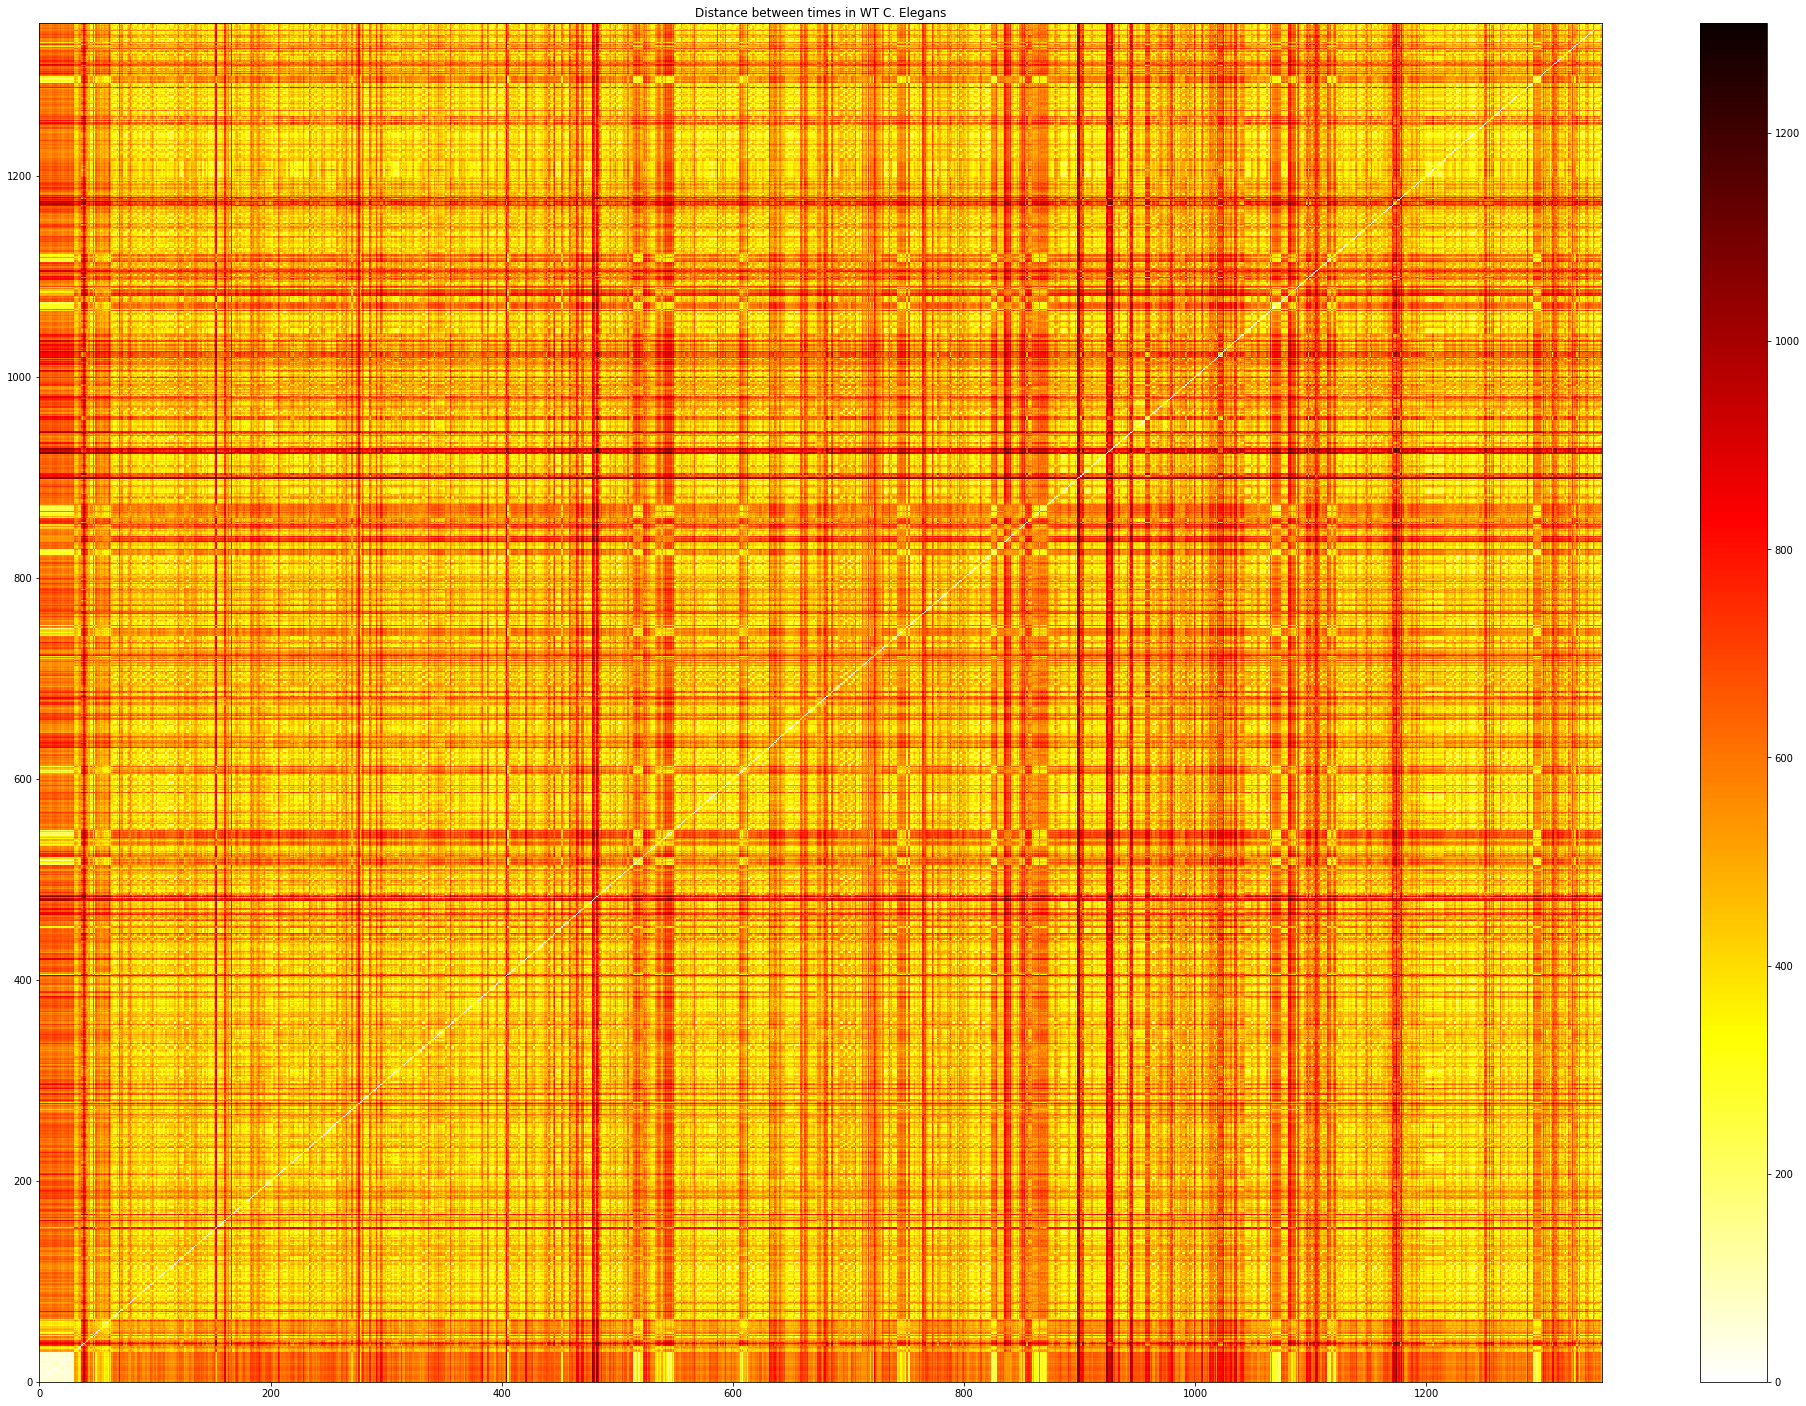

In [50]:
plot_2_examples(['hot_r'],(np.mat(full_WT_comp)))

(Supplemental Figure 1) Figure below

/tmp/ipykernel_612480/1043663754.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(np.mat(full_WT_comp), 'average')


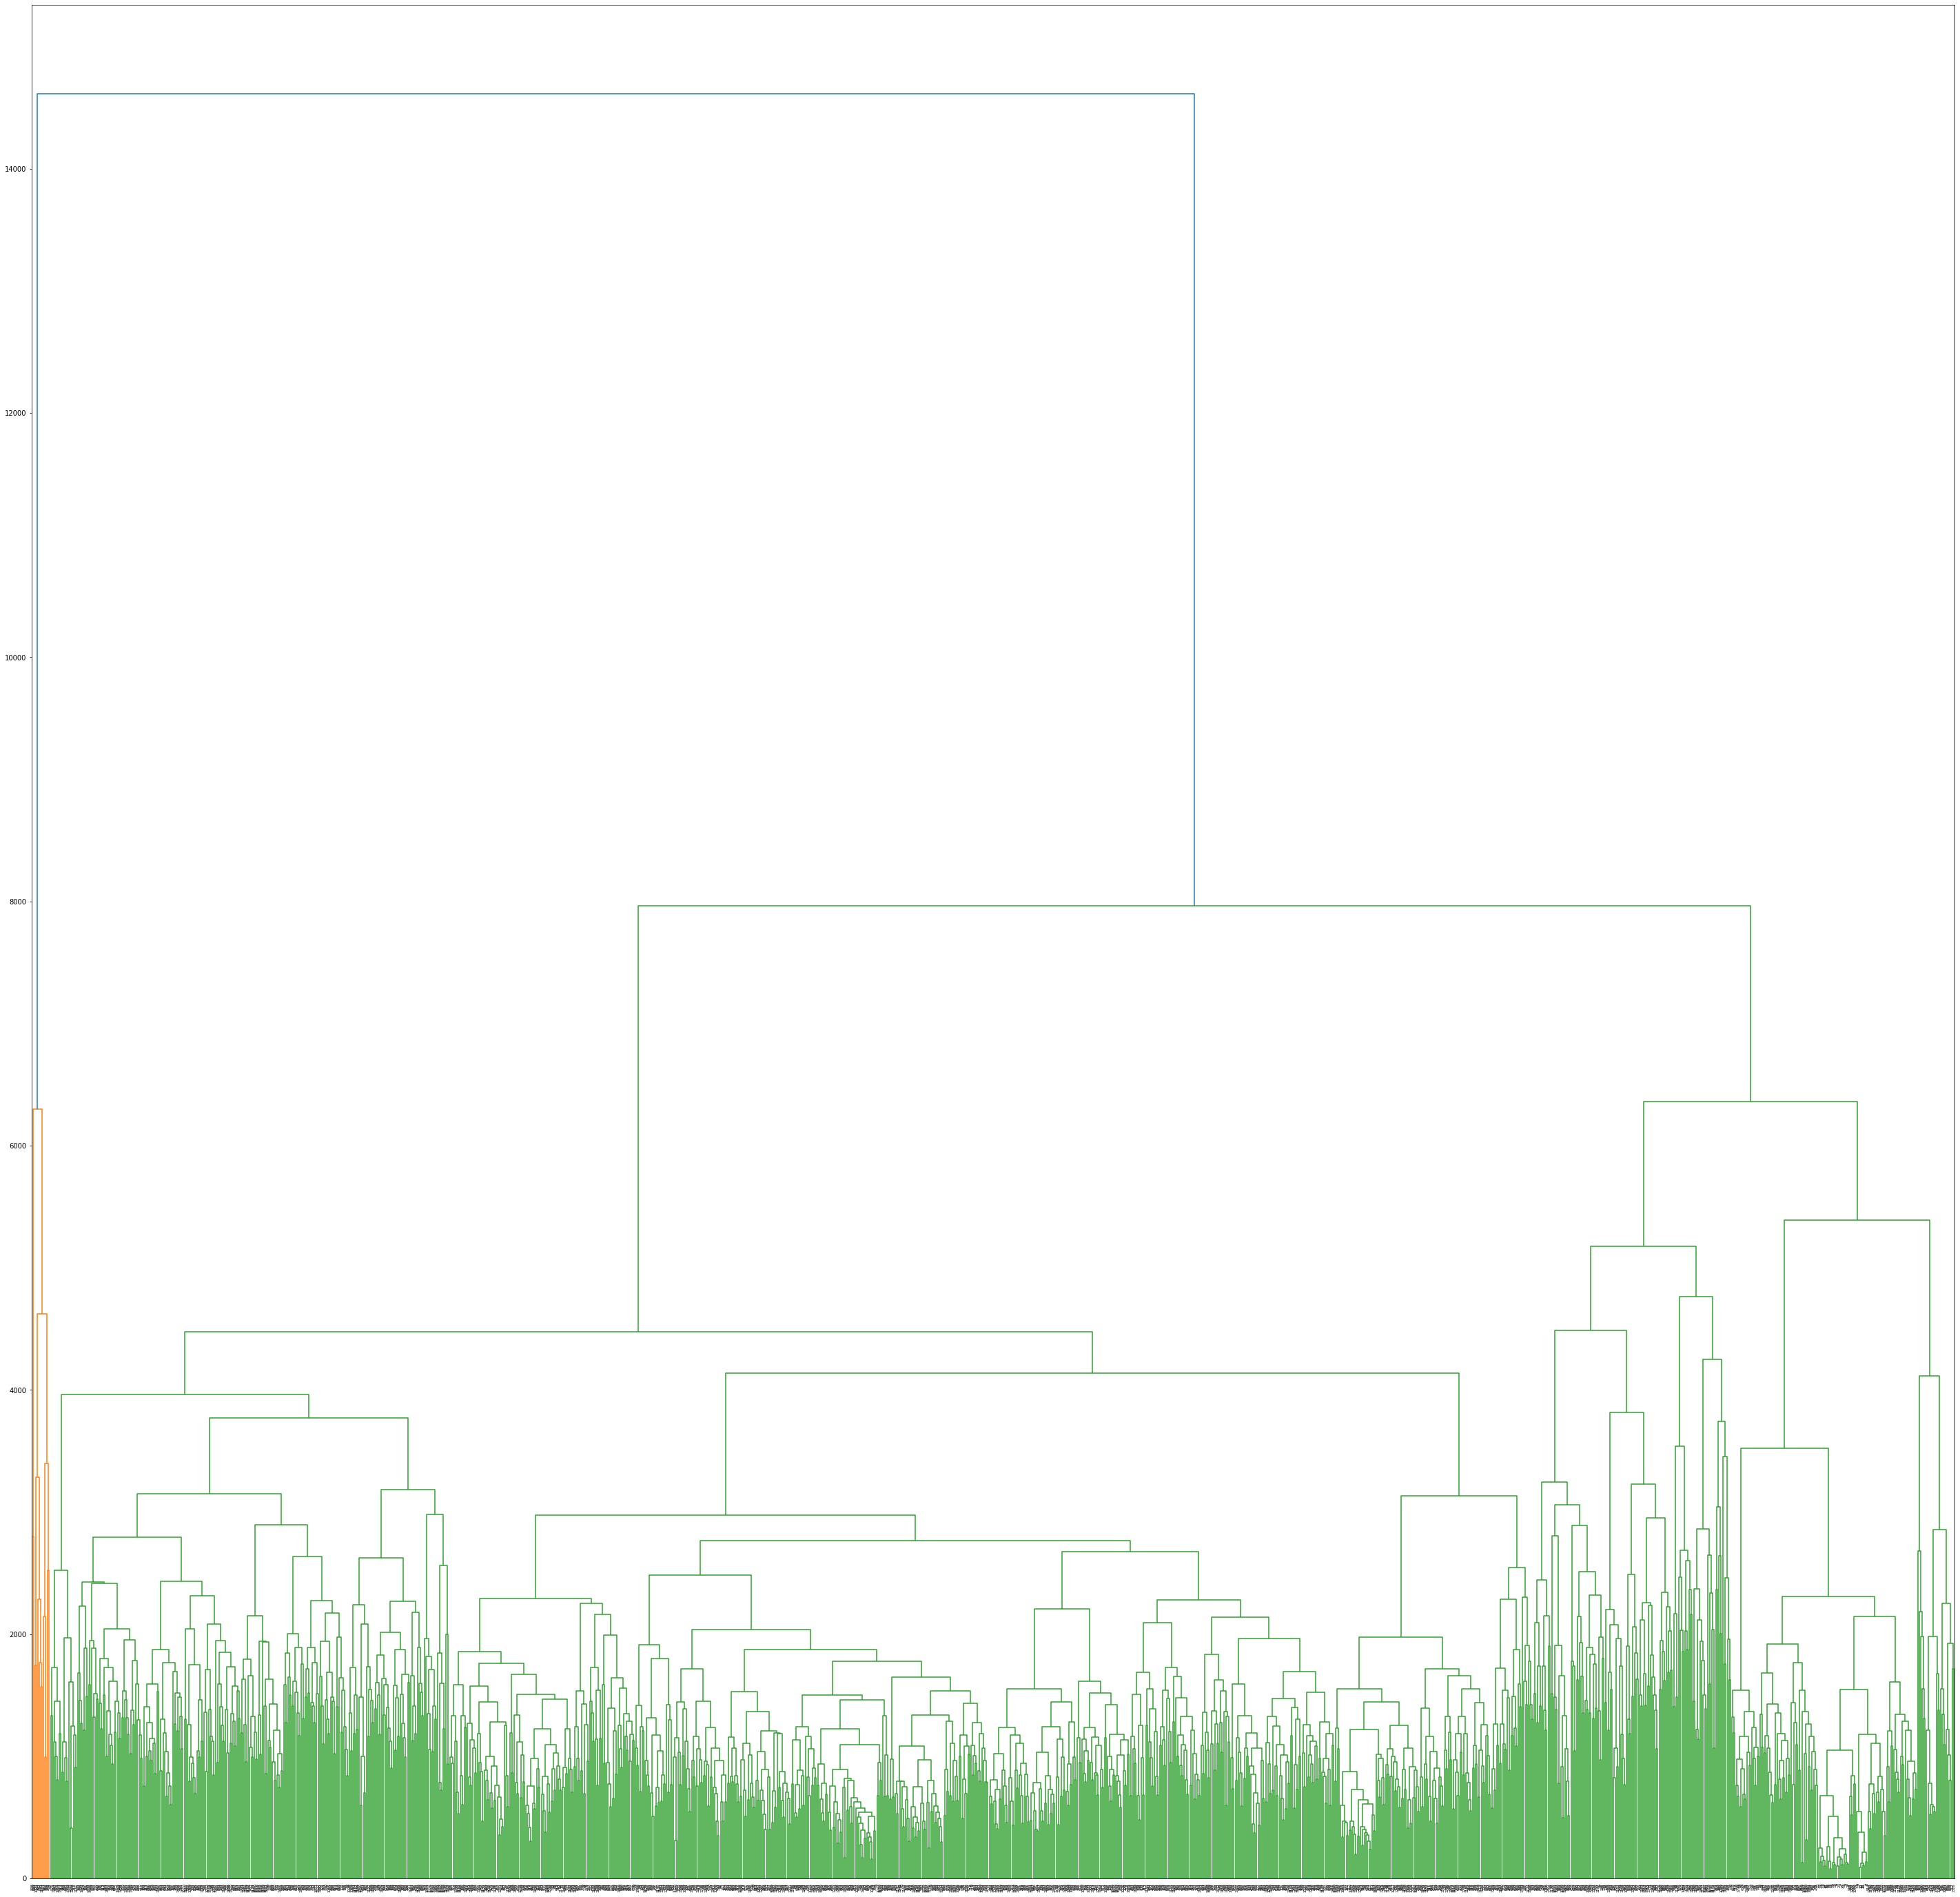

In [51]:
clust_count = 5
Z = linkage(np.mat(full_WT_comp), 'average')
fig = plt.figure(figsize=(50, 50))
dn = dendrogram(Z)
#fcluster(Z, t=6, criterion='maxclust') 
que = fcluster(Z, t=clust_count, criterion='maxclust') 

In [69]:
oop = np.where(que == 1)[0].tolist()
for n in range(2,clust_count+1):
    oop = np.where(que == n)[0].tolist() + oop
oop = oop[::-1]

#oop = np.where(que == 1)[0].tolist() + np.where(que == 2)[0].tolist() + np.where(que == 3)[0].tolist() +np.where(que == 4)[0].tolist() + np.where(que == 5)[0].tolist()oop = np.where(que == 1)[0].tolist() + np.where(que == 2)[0].tolist() + np.where(que == 3)[0].tolist() +np.where(que == 4)[0].tolist() + np.where(que == 5)[0].tolist()

oop = np.where(que == 1)[0].tolist() + np.where(que == 2)[0].tolist() + np.where(que == 3)[0].tolist() +np.where(que == 5)[0].tolist() + np.where(que == 4)[0].tolist()

In [70]:
set(que)

{1, 2, 3, 4, 5}

In [71]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 25)
    plt.show()

In [52]:
#plot_2_examples(['hot_r'],full_WT_comp[oop].T[oop])

In [53]:
full_BD_comp = []; full_TED_comp = []; full_PCA_comp = [];
for n in range(0,len(fulldictset)):
    temp_WT_comp = [] #; temp_r_comp = []
    temp_TED_comp = []
    for m in range(0,30):
        temp_WT_comp.append(intersection_branch_distance(fulldictset[n],fulldictset[m]))
        temp_TED_comp.append( tree_edit_distance(fulldictset[n],fulldictset[m]))
        #x,y = dict_to_vector(fulldictset[n],fulldictset[m])
        #m, b, r, p_value, std_err = stats.linregress(x,y)
        #temp_r_comp.append(r)
    full_BD_comp.append(temp_WT_comp)
    full_TED_comp.append(temp_TED_comp)
    #full_r_comp.append(temp_r_comp)
    print(n)
full_BD_comp = np.mat(full_BD_comp)
full_TED_comp = np.mat(full_TED_comp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [54]:
#plot_2_examples(['hot_r'],full_TED_comp)

In [55]:
np.mat(full_BD_comp).shape,np.mat(full_TED_comp).shape

((1352, 30), (1352, 30))

In [56]:
RNAi_size_assignments['SUF-1'], RNAi_size_assignments['SKR-2']

([1122, 1123, 1124, 1125, 1126, 1127],
 [1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089])

In [57]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=200) #200 TED, 275 BD instance
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 10)
    #plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [10, 10]
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()

In [58]:
#plot_2_examples(['cool'],full_TED_comp[RNAi_size_assignments['SUF-1']].T[inlier_ref])

In [59]:
#q = full_TED_comp[RNAi_size_assignments['SKR-2']].T[inlier_ref]
#plot_2_examples(['cool'],q.T[[0, 3, 4, 8, 6, 1, 2, 5, 9, 7]].T)

In [63]:
full_TED_comp[RNAi_size_assignments['SKR-2']].T[0]

matrix([[ 54,  53,  67,  43,  39,  65,  48, 157,  63, 146]])

In [64]:
np.argsort(full_TED_comp[RNAi_size_assignments['SKR-2']].T[0])

matrix([[4, 3, 6, 1, 0, 8, 5, 2, 9, 7]])

In [65]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=275) #200 TED, 275 BD instance
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 10)
    #plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [10, 10]
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()

In [66]:
#plot_2_examples(['hot_r'],full_BD_comp[RNAi_size_assignments['SUF-1']].T[inlier_ref])

In [67]:
#q = full_BD_comp[RNAi_size_assignments['SKR-2']].T[inlier_ref]
#plot_2_examples(['hot_r'],q.T[[0, 3, 4, 8, 6, 1, 2, 5, 9, 7]].T)

In [68]:
full_BD_comp = np.mat(full_BD_comp)

In [69]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 25)
    #plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [10, 10]
    #plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()

In [70]:
#plot_2_examples(['hot_r'],full_BD_comp.T[inlier_ref].T)

In [71]:
BD = full_BD_comp.T[inlier_ref]

In [72]:
#plot_2_examples(['hot_r'],full_TED_comp.T[inlier_ref].T)

In [73]:
TED = full_TED_comp.T[inlier_ref]

In [74]:
BD.shape,TED.shape

((22, 1352), (22, 1352))

In [75]:
TED[0]

matrix([[  0,   0,   0, ..., 182, 141, 121]])

In [76]:
#plot_2_examples(['hot_r'],(np.sum(BD, axis = 0)/30).T)

In [77]:
(np.array(np.sum(BD, axis = 0)/30)),np.array(TED[0]), BD.shape

(array([[31.28444768, 58.3864399 , 33.05228539, ..., 78.91383017,
         98.78687255, 82.64124635]]),
 array([[  0,   0,   0, ..., 182, 141, 121]]),
 (22, 1352))

In [83]:
#plt.scatter((np.array(np.sum(BD, axis = 0)/30)),np.array(TED[0]))
#plt.scatter(np.array(TED[0]),(np.array(np.sum(BD, axis = 0)/22)))
#plt.savefig("filepath.svg", format = 'svg', dpi=300) #X is TED, Y = BED

(Supplemental Figure 3) code below

In [84]:
df = pd.read_csv('functions.csv')

In [85]:
df = df.to_numpy()

In [86]:
functional_class_dict_00 = dict()
for n in set(df.T[2]):
    functional_class_dict_00[n] = []

In [87]:
for n in df:
    print(n[2],n[0])
    functional_class_dict_00[n[2]] = functional_class_dict_00[n[2]] + [n[0]]

cytoskeleton abi-1
general transcription ama-1
ubiquitin-like aos-1
signaling apr-1
signaling apx-1
cytoskeleton arx-2
RNA-binding/translation atx-2
cell cycle & cell division bub-1
unknown C01A2.5
general transcription C01F1.1
unknown C02B10.5
general transcription C06A5.1
mRNA Splicing C07A9.2
chromatin C08B11.3
cytoskeleton C49H3.8
mRNA Splicing C50F2.3
general transcription C55A6.9
unknown cacn-1
transcription factor camt-1
chromatin cbp-1
cell cycle & cell division cdc-25.1
protein folding and degredation cdc-37
multifunction cdk-7
general transcription cdk-9
DNA replication & repair cdt-1
transcription factor ceh-24
chromatin chaf-2
vesicles chc-1
DNA replication & repair chk-1
signaling cir-1
RNA processing clpf-1
cytoskeleton cls-2
signaling cmd-1
protein folding and degredation cpl-1
RNA processing cpsf-1
RNA processing cpsf-2
RNA processing cpsf-4
protein folding and degredation csn-4
ubiquitination cul-1
ubiquitination cul-2
ubiquitination cul-3
general transcription D1043.1

In [92]:
functional_class_dict_0

{'cytoskeleton': ['ABI-1',
  'ARX-2',
  'C49H3.8',
  'CLS-2',
  'DLC-1',
  'DLI-1',
  'GPB-1',
  'KLP-10',
  'KLP-15',
  'KLP-16',
  'LET-502',
  'MEI-1',
  'NMY-2',
  'NUD-1',
  'RGA-3',
  'VAB-10',
  'Y53F4B.22',
  'ZYG-12'],
 'general transcription': ['AMA-1',
  'C01F1.1',
  'C06A5.1',
  'C55A6.9',
  'CDK-9',
  'D1043.1',
  'DIC-1',
  'EMB-5',
  'F25B3.6',
  'F35F11.1',
  'MDT-19',
  'MDT-6',
  'RGR-1',
  'RPB-11',
  'RPB-5',
  'RPB-7',
  'RPB-8',
  'SKP-1',
  'SPT-5',
  'TAF-12',
  'TAF-5',
  'Y48G10A.4'],
 'ubiquitin-like': ['AOS-1', 'GEI-17', 'SMO-1', 'UBC-12', 'UBC-9'],
 'signaling': ['APR-1',
  'APX-1',
  'CIR-1',
  'CMD-1',
  'GLP-1',
  'HMP-2',
  'LIT-1',
  'MOM-2',
  'MOM-5',
  'POP-1',
  'SEL-8',
  'SYS-1'],
 'RNA-binding/translation': ['ATX-2',
  'ETR-1',
  'MEX-3',
  'MEX-5',
  'OMA-1/2',
  'POS-1',
  'PUF-3',
  'SPN-4'],
 'cell cycle & cell division': ['BUB-1',
  'CDC-25.1',
  'D1081.8',
  'HIM-10',
  'SCC-3'],
 'unknown': ['C01A2.5', 'C02B10.5', 'CACN-1', 'GAD-1', 'PAD-

In [93]:
functional_class_BD = dict(); functional_class_TED = dict(); gene_list = []; gene_list_function = []
print(list(functional_class_dict_0))

['cytoskeleton', 'general transcription', 'ubiquitin-like', 'signaling', 'RNA-binding/translation', 'cell cycle & cell division', 'unknown', 'mRNA Splicing', 'chromatin', 'transcription factor', 'protein folding and degredation', 'multifunction', 'DNA replication & repair', 'vesicles', 'RNA processing', 'ubiquitination', 'RNAi', 'nuclear transport', 'mitochondrion/stress', 'kinase & phosphatase', 'surface/adhesion', 'polarity', 'metabolism']


In [90]:
RNAi_size_assignments['SKR-1/2'] = RNAi_size_assignments['SKR-2']

In [91]:
functional_class_dict_0 = dict()
for n in range(0,len(df)):
    q = df[n][0].upper()
    try:
        RNAi_size_assignments[q]
        print(q,df[n][2])
        gene_list.append(q); gene_list_function.append(df[n][2]); 
        try:
            functional_class_dict_0[df[n][2]] = functional_class_dict_0[df[n][2]] + [q]
        except:
            functional_class_dict_0[df[n][2]] = [q]
    except:
        pas

ABI-1 cytoskeleton
AMA-1 general transcription
AOS-1 ubiquitin-like
APR-1 signaling
APX-1 signaling
ARX-2 cytoskeleton
ATX-2 RNA-binding/translation
BUB-1 cell cycle & cell division
C01A2.5 unknown
C01F1.1 general transcription
C02B10.5 unknown
C06A5.1 general transcription
C07A9.2 mRNA Splicing
C08B11.3 chromatin
C49H3.8 cytoskeleton
C50F2.3 mRNA Splicing
C55A6.9 general transcription
CACN-1 unknown
CAMT-1 transcription factor
CBP-1 chromatin
CDC-25.1 cell cycle & cell division
CDC-37 protein folding and degredation
CDK-7 multifunction
CDK-9 general transcription
CDT-1 DNA replication & repair
CEH-24 transcription factor
CHAF-2 chromatin
CHC-1 vesicles
CHK-1 DNA replication & repair
CIR-1 signaling
CLPF-1 RNA processing
CLS-2 cytoskeleton
CMD-1 signaling
CPL-1 protein folding and degredation
CPSF-1 RNA processing
CPSF-2 RNA processing
CPSF-4 RNA processing
CSN-4 protein folding and degredation
CUL-1 ubiquitination
CUL-2 ubiquitination
CUL-3 ubiquitination
D1043.1 general transcription

In [109]:
for n in list(functional_class_dict_0):
    functional_class_BD[n] = []; functional_class_TED[n] = []
    print(n)

cytoskeleton
general transcription
ubiquitin-like
signaling
RNA-binding/translation
cell cycle & cell division
unknown
mRNA Splicing
chromatin
transcription factor
protein folding and degredation
multifunction
DNA replication & repair
vesicles
RNA processing
ubiquitination
RNAi
nuclear transport
mitochondrion/stress
kinase & phosphatase
surface/adhesion
polarity
metabolism


In [94]:
#for n in range(0,len(gene_list_function)): print(gene_list_function[n], gene_list[n])

In [95]:
gene_functional_assigment_dict = dict()
for n in range(0,len(df)):
    q = df[n][0].upper()
    #print(q,df[n][2])
    gene_functional_assigment_dict[q] = df[n][2]

In [96]:
y0 = [];x0 = [];label0 = []

for n in list(functional_class_dict_0):
    print(n)
    functional_class_TED[n] =[]; functional_class_BD[n] = []
    for m in functional_class_dict_0[n]:
        #print(m,RNAi_size_assignments[m])
        #print(np.array(TED[0])[0][RNAi_size_assignments[m]],np.array(np.sum(BD, axis = 0)/22)[0][RNAi_size_assignments[m]])
        print(np.array(TED[0])[0][RNAi_size_assignments[m]].tolist(),np.array(np.sum(BD, axis = 0)/22)[0][RNAi_size_assignments[m]].tolist())
        functional_class_TED[n] = functional_class_TED[n] + np.array(TED[0])[0][RNAi_size_assignments[m]].tolist()
        functional_class_BD[n] = functional_class_BD[n] + np.array(np.sum(BD, axis = 0)/22)[0][RNAi_size_assignments[m]].tolist()
        #x0.append(np.sum(np.array(TED[0])[0][RNAi_size_assignments[m]]))
        #y0.append(np.sum(np.array(np.sum(BD, axis = 0)/22)[0][RNAi_size_assignments[m]]))

cytoskeleton
[111, 120, 104, 54, 67, 82] [103.74243881657507, 95.4302198936276, 53.27269850209327, 46.71665342706981, 85.65793888035796, 70.32543483287171]
[152, 137, 161, 160, 162, 142] [114.00715177000296, 80.816645611021, 228.57437727711277, 197.73682767857466, 122.5221693864382, 131.23213906847062]
[133, 137, 153, 180, 133] [128.8497726368266, 125.45579929289705, 129.0746328619052, 143.4840016858807, 250.3833531300803]
[162, 208, 205, 188, 162, 137] [149.2466365608054, 421.17299644584295, 151.6099638817285, 128.13066582159007, 101.9426700560741, 77.08707416281801]
[133, 134, 154, 136, 263] [155.72719390053828, 154.47283769154876, 158.67739670252342, 130.17274010889167, 242.92709950215294]
[138, 135, 130, 203, 158, 177, 161] [73.30160958344258, 114.96411955573913, 111.2700678009392, 135.6589347146972, 61.22255029180497, 58.95916974921575, 145.8663793221929]
[163, 153, 150, 137, 154] [160.1804085682006, 61.075643765977205, 45.769733482105394, 59.725842860050264, 65.21898783803373]
[1

In [97]:
y0 = [];x0 = [];label0 = []
for n in functional_class_TED:
    label0.append(n)
    #print(n,functional_class_TED[n],functional_class_BD[n])
    y0.append(sum(functional_class_BD[n])/len(functional_class_BD[n]))
    x0.append(sum(functional_class_TED[n])/len(functional_class_TED[n]))
    print(n,sum(functional_class_TED[n])/len(functional_class_TED[n]),sum(functional_class_BD[n])/len(functional_class_BD[n]))

cytoskeleton 150.7981651376147 138.15684891492054
general transcription 177.03649635036496 270.95152986244926
ubiquitin-like 146.78125 127.46444000351616
signaling 106.2439024390244 110.56141917557287
RNA-binding/translation 148.91228070175438 223.96107446117725
cell cycle & cell division 176.4848484848485 151.86076137015567
unknown 157.07142857142858 175.7965977506319
mRNA Splicing 180.48818897637796 215.65084737490633
chromatin 153.04054054054055 227.83735886029973
transcription factor 114.34146341463415 156.94697107476213
protein folding and degredation 159.0 196.00483937274845
multifunction 183.03703703703704 340.66250260315354
DNA replication & repair 175.98823529411766 300.9391789344528
vesicles 180.46511627906978 281.47377711550956
RNA processing 167.98333333333332 206.87129668897575
ubiquitination 148.47169811320754 224.87229300883186
RNAi 172.47368421052633 208.67272513699177
nuclear transport 171.49253731343285 233.99668843146995
mitochondrion/stress 172.20833333333334 441.08

In [ ]:
(Supplemental Figure 3) Figure below

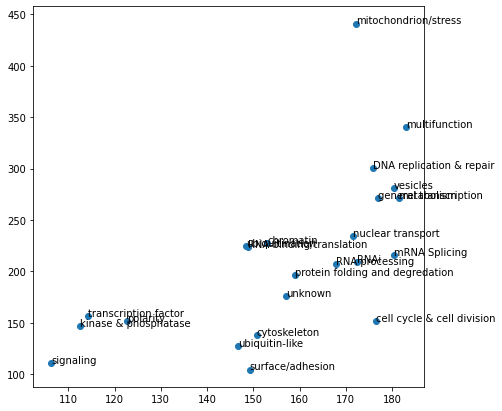

In [98]:
plt.scatter(x0,y0)

for i, txt in enumerate(label0):
    plt.annotate(txt, (x0[i], y0[i]))

In [102]:
y0 = [];x0 = [];label0 = []
for n in functional_class_TED:
    label0.append(n)
    #print(n,functional_class_TED[n],functional_class_BD[n])
    y0.append(sum(functional_class_BD[n])/len(functional_class_BD[n]))
    x0.append(sum(functional_class_TED[n])/len(functional_class_TED[n]))
    print(n,max(functional_class_TED[n]),min(functional_class_TED[n]),max(functional_class_BD[n]),max(functional_class_BD[n]))

cytoskeleton 263 54 421.17299644584295 421.17299644584295
general transcription 318 107 681.6746131389843 681.6746131389843
ubiquitin-like 197 63 260.325660334169 260.325660334169
signaling 244 5 330.5709769043002 330.5709769043002
RNA-binding/translation 237 24 804.995136472358 804.995136472358
cell cycle & cell division 237 127 538.6929098908739 538.6929098908739
unknown 216 100 438.68418539209273 438.68418539209273
mRNA Splicing 269 102 587.4390951263496 587.4390951263496
chromatin 256 6 812.659695383847 812.659695383847
transcription factor 209 10 458.1588977259669 458.1588977259669
protein folding and degredation 215 86 456.23044288384716 456.23044288384716
multifunction 236 126 516.842605935231 516.842605935231
DNA replication & repair 267 127 607.8190514522213 607.8190514522213
vesicles 310 128 848.8303797099805 848.8303797099805
RNA processing 222 82 354.57809774378336 354.57809774378336
ubiquitination 268 14 567.6969510787875 567.6969510787875
RNAi 221 121 309.86153485731126 3

'''for n in functional_class_BD:
    print(n,'Intersection Branch Distances',functional_class_BD[n])
    print(n,'Tree Edit Distances',functional_class_TED[n])'''


'''
for n in functional_class_BD:
    print(n,'IBD mean',np.mean(functional_class_BD[n]),'var',np.var(functional_class_BD[n]))
    print(n,'TED',np.mean(functional_class_TED[n]),'var',np.var(functional_class_TED[n]))'''

In [117]:
'''
functional_class_dict_1 = dict()
for n in list(functional_class_dict_0):
    #print(n)
    functional_class_dict_temp = dict()
    for m in functional_class_dict_0[n]:
        #print(m,np.mean(np.array(TED[0])[0][RNAi_size_assignments[m]]),np.mean(np.array(np.sum(BD, axis = 0)/22)[0][RNAi_size_assignments[m]]))
        functional_class_dict_temp[m] = (np.mean(np.array(TED[0])[0][RNAi_size_assignments[m]]), np.mean(np.array(np.sum(BD, axis = 0)/22)[0][RNAi_size_assignments[m]]))
        #print(,np.array(np.sum(BD, axis = 0)/22)[0][RNAi_size_assignments[m]])
    functional_class_dict_1[n] = functional_class_dict_temp'''

In [118]:
'''
functional_class_dict_2 = dict()
for n in functional_class_dict_1:
    #print(n,functional_class_dict_1[n],'\n')
    #print(n)
    TED_temps = []; BED_temps = [];
    for m in functional_class_dict_1[n]:
        #print(m,functional_class_dict_1[n][m])
        TED_temps.append(functional_class_dict_1[n][m][0])
        BED_temps.append(functional_class_dict_1[n][m][1])
    #print();print()
    functional_class_dict_2[n] = (TED_temps,BED_temps)
    #print(np.means(np.array(TED_temps)))
    #print(np.means(np.array(BED_temps)))'''

In [119]:
'''
x_val = [] #TED
y_val = [] #BED
x_err = []
y_err = []
label = []
for n in list(functional_class_dict_2):
    label.append(n)
    #print(n,functional_class_dict_2[n][0],functional_class_dict_2[n][1],'\n')
    x_val.append(np.mean(np.array(functional_class_dict_2[n][0])))
    y_val.append(np.mean(np.array(functional_class_dict_2[n][1])))
    x_err.append((max(functional_class_dict_2[n][0]) - min(functional_class_dict_2[n][0]))/2)
    y_err.append((max(functional_class_dict_2[n][1]) - min(functional_class_dict_2[n][1]))/2)'''

In [105]:
#functional_class_dict_0,functional_class_dict_1,functional_class_dict_2,functional_class_dict_temp

In [ ]:
'''
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})
plt.scatter(x_val, y_val)

c = [1, 3, 2, 1]
  
plt.errorbar(x_val, y_val, yerr=y_err, fmt="o")
plt.errorbar(x_val, y_val, xerr=x_err, fmt="o")

for i, txt in enumerate(list(label)):
    plt.annotate(txt, (x_val[i], y_val[i]))
    
plt.ylim(0,450);plt.xlim(75,220)

plt.show()'''

In [ ]:
'''
rank_sort = []
for n in functional_class_dict_1:
    for m in functional_class_dict_1[n]:
        #print(m,functional_class_dict_1[n][m][0],functional_class_dict_1[n][m][1])
        rank_sort.append((m,functional_class_dict_1[n][m][0],functional_class_dict_1[n][m][1]))
'''

In [ ]:
'''rank_x_TED_dict = dict()
rank_x_TED = sorted(rank_sort, key = lambda x: x[1])
for n in range(0,len(rank_sort)): #TED
    #print(n,rank_x_TED[n][0],gene_functional_assigment_dict[rank_x_TED[n][0]])
    try:
        rank_x_TED_dict[gene_functional_assigment_dict[rank_x_TED[n][0]]] = rank_x_TED_dict[gene_functional_assigment_dict[rank_x_TED[n][0]]] + [n]
    except:
        rank_x_TED_dict[gene_functional_assigment_dict[rank_x_TED[n][0]]] = [n]

print(rank_x_TED_dict)'''

In [109]:
'''rank_y_TED_dict = dict()
rank_y_TED = sorted(rank_sort, key = lambda x: x[2])
for n in range(0,len(rank_sort)): #BD
    #print(n,rank_x_TED[n][0],gene_functional_assigment_dict[rank_x_TED[n][0]])
    try:
        rank_y_TED_dict[gene_functional_assigment_dict[rank_y_TED[n][0]]] = rank_y_TED_dict[gene_functional_assigment_dict[rank_y_TED[n][0]]] + [n]
    except:
        rank_y_TED_dict[gene_functional_assigment_dict[rank_y_TED[n][0]]] = [n]

print(rank_y_TED_dict)'''

'rank_y_TED_dict = dict()\nrank_y_TED = sorted(rank_sort, key = lambda x: x[2])\nfor n in range(0,len(rank_sort)): #BD\n    #print(n,rank_x_TED[n][0],gene_functional_assigment_dict[rank_x_TED[n][0]])\n    try:\n        rank_y_TED_dict[gene_functional_assigment_dict[rank_y_TED[n][0]]] = rank_y_TED_dict[gene_functional_assigment_dict[rank_y_TED[n][0]]] + [n]\n    except:\n        rank_y_TED_dict[gene_functional_assigment_dict[rank_y_TED[n][0]]] = [n]\n\nprint(rank_y_TED_dict)'

In [110]:
'''rank_x_TED_dict
rank_y_BD_dict = rank_y_TED_dict

x_val = [] #TED
y_val = [] #BED
x_err = []
y_err = []
for n in rank_x_TED_dict:
    print(n,rank_x_TED_dict[n],rank_y_BD_dict[n])
    #print(n,functional_class_dict_2[n][0],functional_class_dict_2[n][1],'\n')
    x_val.append(np.mean(np.array(rank_x_TED_dict[n])))
    y_val.append(np.mean(np.array(rank_y_BD_dict[n])))
    x_err.append(max(rank_x_TED_dict[n]) - min(rank_x_TED_dict[n])/2)
    y_err.append(max(rank_y_BD_dict[n]) - min(rank_y_BD_dict[n])/2)'''

"rank_x_TED_dict\nrank_y_BD_dict = rank_y_TED_dict\n\nx_val = [] #TED\ny_val = [] #BED\nx_err = []\ny_err = []\nfor n in rank_x_TED_dict:\n    print(n,rank_x_TED_dict[n],rank_y_BD_dict[n])\n    #print(n,functional_class_dict_2[n][0],functional_class_dict_2[n][1],'\n')\n    x_val.append(np.mean(np.array(rank_x_TED_dict[n])))\n    y_val.append(np.mean(np.array(rank_y_BD_dict[n])))\n    x_err.append(max(rank_x_TED_dict[n]) - min(rank_x_TED_dict[n])/2)\n    y_err.append(max(rank_y_BD_dict[n]) - min(rank_y_BD_dict[n])/2)"

In [111]:
'''
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 12})
plt.scatter(x_val, y_val)

c = [1, 3, 2, 1]
  
plt.errorbar(x_val, y_val, yerr=y_err, fmt="o")
plt.errorbar(x_val, y_val, xerr=x_err, fmt="o")

for i, txt in enumerate(list(rank_x_TED_dict)):
    plt.annotate(txt, (x_val[i], y_val[i]))
    
plt.ylim(20,180);plt.xlim(40,180)

plt.show()'''

'\nplt.rcParams[\'figure.figsize\'] = [20, 20]\nplt.rcParams.update({\'font.size\': 12})\nplt.scatter(x_val, y_val)\n\nc = [1, 3, 2, 1]\n  \nplt.errorbar(x_val, y_val, yerr=y_err, fmt="o")\nplt.errorbar(x_val, y_val, xerr=x_err, fmt="o")\n\nfor i, txt in enumerate(list(rank_x_TED_dict)):\n    plt.annotate(txt, (x_val[i], y_val[i]))\n    \nplt.ylim(20,180);plt.xlim(40,180)\n\nplt.show()'

In [116]:
scatter_RNAi_list = []
for n in functional_class_dict_00:
    print(n, functional_class_dict_00[n])
    scatter_RNAi_list = scatter_RNAi_list + functional_class_dict_00[n]

metabolism ['T04A8.7', 'T22F3.3', 'TAG-335']
surface/adhesion ['let-413', 'tag-256', 'tat-5']
multifunction ['cdk-7', 'gop-2', 'let-711', 'par-5', 'ruvb-1']
signaling ['apr-1', 'apx-1', 'cir-1', 'cmd-1', 'glp-1', 'hmp-2', 'lit-1', 'mom-2', 'mom-5', 'pop-1', 'sel-8', 'sys-1']
RNA processing ['clpf-1', 'cpsf-1', 'cpsf-2', 'cpsf-4', 'ddx-23', 'gld-2', 'pabp-2', 'R144.2', 'suf-1']
DNA replication & repair ['cdt-1', 'chk-1', 'div-1', 'F31C3.5', 'F44B9.8', 'lig-1', 'pcn-1', 'rad-51', 'rev-1', 'rfc-3', 'T24C4.5', 'Y52B11A.9']
mRNA Splicing ['C07A9.2', 'C50F2.3', 'D1054.14', 'F19F10.9', 'F23F1.5', 'F37C12.1', 'F53B7.3', 'K07C5.6', 'M03C11.7', 'mog-4', 'mog-5', 'prp-17', 'R08D7.1', 'repo-1', 'rnp-4', 'rnp-7', 'sap-49', 'T11G6.8', 'tag-135', 'tag-203', 'Y110A7A.8']
polarity ['par-2', 'par-3', 'par-6', 'pkc-3']
unknown ['C01A2.5', 'C02B10.5', 'cacn-1', 'gad-1', 'pad-1', 'R11A8.2']
RNAi ['drh-3', 'ego-1']
kinase & phosphatase ['gsk-3', 'mbk-2', 'ppfr-4', 'src-1', 'sur-6', 'T09A5.9']
cell cycle & c

In [117]:
scatter_RNAi_color = []
colorvar = 0
for n in functional_class_dict_00:
    print(n, functional_class_dict_00[n])
    scatter_RNAi_color = scatter_RNAi_color + [list(mcolors.CSS4_COLORS.values())[colorvar]] * len(functional_class_dict_00[n])
    colorvar = colorvar + 1

metabolism ['T04A8.7', 'T22F3.3', 'TAG-335']
surface/adhesion ['let-413', 'tag-256', 'tat-5']
multifunction ['cdk-7', 'gop-2', 'let-711', 'par-5', 'ruvb-1']
signaling ['apr-1', 'apx-1', 'cir-1', 'cmd-1', 'glp-1', 'hmp-2', 'lit-1', 'mom-2', 'mom-5', 'pop-1', 'sel-8', 'sys-1']
RNA processing ['clpf-1', 'cpsf-1', 'cpsf-2', 'cpsf-4', 'ddx-23', 'gld-2', 'pabp-2', 'R144.2', 'suf-1']
DNA replication & repair ['cdt-1', 'chk-1', 'div-1', 'F31C3.5', 'F44B9.8', 'lig-1', 'pcn-1', 'rad-51', 'rev-1', 'rfc-3', 'T24C4.5', 'Y52B11A.9']
mRNA Splicing ['C07A9.2', 'C50F2.3', 'D1054.14', 'F19F10.9', 'F23F1.5', 'F37C12.1', 'F53B7.3', 'K07C5.6', 'M03C11.7', 'mog-4', 'mog-5', 'prp-17', 'R08D7.1', 'repo-1', 'rnp-4', 'rnp-7', 'sap-49', 'T11G6.8', 'tag-135', 'tag-203', 'Y110A7A.8']
polarity ['par-2', 'par-3', 'par-6', 'pkc-3']
unknown ['C01A2.5', 'C02B10.5', 'cacn-1', 'gad-1', 'pad-1', 'R11A8.2']
RNAi ['drh-3', 'ego-1']
kinase & phosphatase ['gsk-3', 'mbk-2', 'ppfr-4', 'src-1', 'sur-6', 'T09A5.9']
cell cycle & c

In [118]:
scatter_RNAi_color = ['b'] + scatter_RNAi_color

/home/gunalan/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gunalan/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


GOGOG PAR-5
GOGOG PKC-3


([<matplotlib.axis.XTick at 0x7efff4e837c0>,
 [Text(0, 0, 'WT'),
  Text(1, 0, 'F23F1.5'),
  Text(2, 0, 'CPSF-4'),
  Text(3, 0, 'C06A5.1'),
  Text(4, 0, 'RAB-5'),
  Text(5, 0, 'AOS-1'),
  Text(6, 0, 'Y71H2AM.17'),
  Text(7, 0, 'HDA-1'),
  Text(8, 0, 'AMA-1'),
  Text(9, 0, 'PAR-5'),
  Text(10, 0, 'CDK-7'),
  Text(11, 0, 'Y53F4B.22'),
  Text(12, 0, 'VPS-4'),
  Text(13, 0, 'GLD-2'),
  Text(14, 0, 'PAR-1'),
  Text(15, 0, 'SUR-6'),
  Text(16, 0, 'CLS-2'),
  Text(17, 0, 'CAMT-1'),
  Text(18, 0, 'GAD-1'),
  Text(19, 0, 'UBA-1'),
  Text(20, 0, 'Y110A7A.8'),
  Text(21, 0, 'MOG-4'),
  Text(22, 0, 'PABP-2'),
  Text(23, 0, 'D1054.14'),
  Text(24, 0, 'CPL-1'),
  Text(25, 0, 'NPP-4'),
  Text(26, 0, 'F35F11.1'),
  Text(27, 0, 'F37C12.1'),
  Text(28, 0, 'MDT-19'),
  Text(29, 0, 'SAP-49'),
  Text(30, 0, 'BUB-1'),
  Text(31, 0, 'LRR-1'),
  Text(32, 0, 'F44B9.8'),
  Text(33, 0, 'T04A8.7'),
  Text(34, 0, 'APX-1'),
  Text(35, 0, 'POS-1'),
  Text(36, 0, 'PAR-6'),
  Text(37, 0, 'F55A3.7'),
  Text(38, 0, 'PKC-

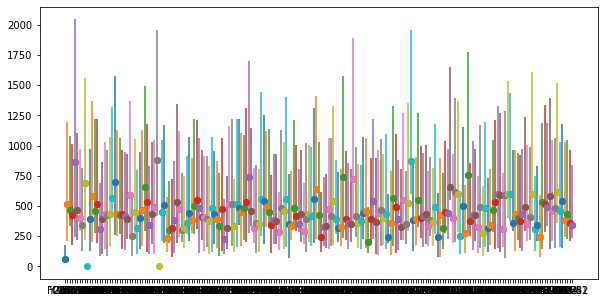

In [119]:
bagman = 0
average_branch_distances = []
bogo = set(RNAi_name_array)
#bogo = set(scatter_RNAi_list)
bogo.remove('inlierWT');bogo.remove('outlierWT')

q = 30

indy = np.mat(full_WT_comp)[range(0,30)].T[range(0,30)]

shortround = indy[np.triu_indices(q)].flatten()

data2 =  shortround[shortround != 0].tolist()
#plt.scatter([bagman] * len(data2), data2, c = 'g')

#print(np.triu_indices(len(q[0])))

average_branch_distances.append(np.mean(data2))

plt.scatter(bagman, np.mean(data2), c = 'g')

plt.errorbar(bagman, np.mean(data2), yerr=[[np.min(data2)],[np.max(data2)]], fmt='o')  



bagman = bagman + 1

for nn in bogo:
    n = nn.upper()
    q = np.where(RNAi_name_array == n)
    #print(q)
    indy = np.mat(full_WT_comp)[q].T[q]
    #short = np.shape(indy)[0]
    #print(short)
    #print(indy.T[np.triu_indices(short,-1)])
    #print(indy[np.where(0 == np.triu(indy))],"\n")
    shortround = indy[np.triu_indices(len(q[0]))].flatten()
    #print()
    data2 =  shortround[shortround != 0].tolist()[0] 
    #print(n,np.mean(data), np.var(data))
    #plt.scatter([bagman] * len(data2), data2, c = "b")
    plt.scatter(bagman, np.mean(data2), c = "r")
    
    #print(len(data2))
    
    if len(data2) == 0: 
        
        data2 = [0]
        print("GOGOG",n)
    
    plt.errorbar(bagman, np.mean(data2), yerr=[[np.min(data2)],[np.max(data2)]], fmt='o'  )
    average_branch_distances.append(np.mean(data2))
    
    #sns.swarmplot(data2)
    #print(len(q[0]))
    #print(np.triu_indices(short,-1))
    bagman = bagman + 1
    
#plt.xticks(range(0,bagman),["WT"] + list(bogo)) 
plt.xticks(range(0,bagman),["WT"] + list(bogo)) 

In [ ]:
(Supplemental Figure 2) code below

In [122]:
from scipy.stats import norm
x_d_0 = np.linspace(0, 1100, 10000)
x = [np.array(average_branch_distances)[0]]
#x_d_0 = np.linspace(0, 1100, 10000)average_branch_distances = average_branch_distances[average_branch_distances > 0]
density_0 = sum(norm(x[xi], np.sqrt(average_branch_distances[xi])).pdf(x_d_0) for xi in range(len(x)))

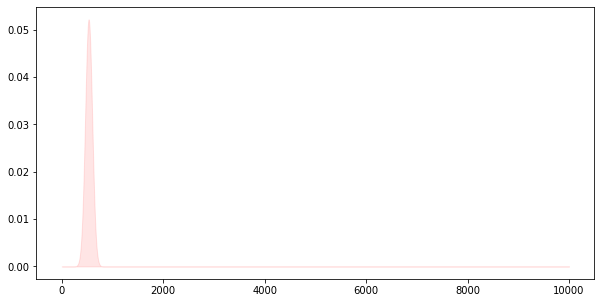

In [123]:

x = average_branch_distances[1:]
x_d = np.linspace(0, 1200, 12000)
x_d = x_d_0
density = sum(norm(xi, 7).pdf(x_d) for xi in x)

plt.fill_between(range(len(x_d)), density_0, color='red', alpha=.1)

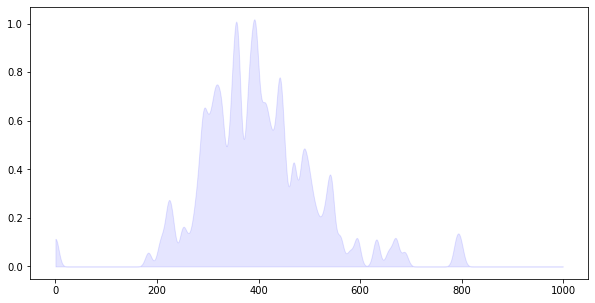

In [126]:
x = [average_branch_distances[0]]
x_d_0 = np.linspace(0, 1100, 1000)
density_0 = sum(norm(xi, 7).pdf(x_d_0) for xi in x)
x = average_branch_distances[1:]
x_d = np.linspace(0, 1100, 1000)
density = sum(norm(xi, 7).pdf(x_d) for xi in x)

#plt.plot(density)
plt.fill_between(range(len(x_d)), density, color='blue', alpha=.1)
#plt.plot(range(len(x_d)), density)
#plt.fill_between(range(len(x_d)), density_0, color='red', alpha=.1)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
#plt.plot(np.where(x_d == x), np.full_like(x, -0.1))
#plt.xticks(x_d)
#plt.fill_between(np.linspace(-4, 800, 10000) ,density, alpha=0.5)
#plt.savefig("heterogeneity.svg", format = "svg")

GOGOG PAR-5
GOGOG PKC-3


([<matplotlib.axis.XTick at 0x7efff39456d0>,
 [Text(0, 0, 'WT'),
  Text(1, 0, 'F23F1.5'),
  Text(2, 0, 'CPSF-4'),
  Text(3, 0, 'C06A5.1'),
  Text(4, 0, 'RAB-5'),
  Text(5, 0, 'AOS-1'),
  Text(6, 0, 'Y71H2AM.17'),
  Text(7, 0, 'HDA-1'),
  Text(8, 0, 'AMA-1'),
  Text(9, 0, 'PAR-5'),
  Text(10, 0, 'CDK-7'),
  Text(11, 0, 'Y53F4B.22'),
  Text(12, 0, 'VPS-4'),
  Text(13, 0, 'GLD-2'),
  Text(14, 0, 'PAR-1'),
  Text(15, 0, 'SUR-6'),
  Text(16, 0, 'CLS-2'),
  Text(17, 0, 'CAMT-1'),
  Text(18, 0, 'GAD-1'),
  Text(19, 0, 'UBA-1'),
  Text(20, 0, 'Y110A7A.8'),
  Text(21, 0, 'MOG-4'),
  Text(22, 0, 'PABP-2'),
  Text(23, 0, 'D1054.14'),
  Text(24, 0, 'CPL-1'),
  Text(25, 0, 'NPP-4'),
  Text(26, 0, 'F35F11.1'),
  Text(27, 0, 'F37C12.1'),
  Text(28, 0, 'MDT-19'),
  Text(29, 0, 'SAP-49'),
  Text(30, 0, 'BUB-1'),
  Text(31, 0, 'LRR-1'),
  Text(32, 0, 'F44B9.8'),
  Text(33, 0, 'T04A8.7'),
  Text(34, 0, 'APX-1'),
  Text(35, 0, 'POS-1'),
  Text(36, 0, 'PAR-6'),
  Text(37, 0, 'F55A3.7'),
  Text(38, 0, 'PKC-

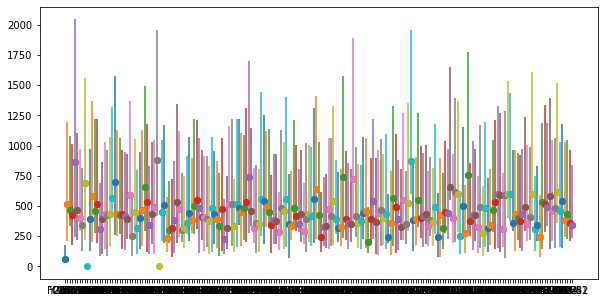

In [128]:
bagman = 0
average_branch_distances = []
average_branch_variances = []
bogo = set(RNAi_name_array)
#bogo = set(scatter_RNAi_list)
bogo.remove('inlierWT');bogo.remove('outlierWT')

q = 30

indy = np.mat(full_WT_comp)[range(0,30)].T[range(0,30)]

shortround = indy[np.triu_indices(q)].flatten()

data2 =  shortround[shortround != 0].tolist()
#plt.scatter([bagman] * len(data2), data2, c = 'g')

#print(np.triu_indices(len(q[0])))

average_branch_distances.append(np.mean(data2))
average_branch_variances.append(np.var(data2))

plt.scatter(bagman, np.mean(data2), c = 'g')

plt.errorbar(bagman, np.mean(data2), yerr=[[np.min(data2)],[np.max(data2)]], fmt='o')  



bagman = bagman + 1

for nn in bogo:
    n = nn.upper()
    q = np.where(RNAi_name_array == n)
    #print(q)
    indy = np.mat(full_WT_comp)[q].T[q]
    #short = np.shape(indy)[0]
    #print(short)
    #print(indy.T[np.triu_indices(short,-1)])
    #print(indy[np.where(0 == np.triu(indy))],"\n")
    shortround = indy[np.triu_indices(len(q[0]))].flatten()
    #print()
    data2 =  shortround[shortround != 0].tolist()[0] 
    #print(n,np.mean(data), np.var(data))
    #plt.scatter([bagman] * len(data2), data2, c = "b")
    plt.scatter(bagman, np.mean(data2), c = "r")
    
    #print(len(data2))
    
    if len(data2) == 0: 
        
        data2 = [0]
        print("GOGOG",n)
    
    plt.errorbar(bagman, np.mean(data2), yerr=[[np.min(data2)],[np.max(data2)]], fmt='o'  )
    average_branch_distances.append(np.mean(data2))
    average_branch_variances.append(np.var(data2))
    o
    #sns.swarmplot(data2)
    #print(len(q[0]))
    #print(np.triu_indices(short,-1))
    bagman = bagman + 1
    
#plt.xticks(range(0,bagman),["WT"] + list(bogo)) 
plt.xticks(range(0,bagman),["WT"] + list(bogo)) 

In [131]:
scatter_RNAi_list_group = []
for n in functional_class_dict_00:
    scatter_RNAi_list_group = scatter_RNAi_list_group + [n] * len(functional_class_dict_00[n])
    #print()
    

(Supplemental Figure 2A) Figure below

GOGOG PAR-5
GOGOG PKC-3


([<matplotlib.axis.XTick at 0x7effed6de790>,
 [Text(0, 0, 'WT'),
  Text(1, 0, 'metabolism'),
  Text(2, 0, 'metabolism'),
  Text(3, 0, 'metabolism'),
  Text(4, 0, 'surface/adhesion'),
  Text(5, 0, 'surface/adhesion'),
  Text(6, 0, 'surface/adhesion'),
  Text(7, 0, 'multifunction'),
  Text(8, 0, 'multifunction'),
  Text(9, 0, 'multifunction'),
  Text(10, 0, 'multifunction'),
  Text(11, 0, 'multifunction'),
  Text(12, 0, 'signaling'),
  Text(13, 0, 'signaling'),
  Text(14, 0, 'signaling'),
  Text(15, 0, 'signaling'),
  Text(16, 0, 'signaling'),
  Text(17, 0, 'signaling'),
  Text(18, 0, 'signaling'),
  Text(19, 0, 'signaling'),
  Text(20, 0, 'signaling'),
  Text(21, 0, 'signaling'),
  Text(22, 0, 'signaling'),
  Text(23, 0, 'signaling'),
  Text(24, 0, 'RNA processing'),
  Text(25, 0, 'RNA processing'),
  Text(26, 0, 'RNA processing'),
  Text(27, 0, 'RNA processing'),
  Text(28, 0, 'RNA processing'),
  Text(29, 0, 'RNA processing'),
  Text(30, 0, 'RNA processing'),
  Text(31, 0, 'RNA proces

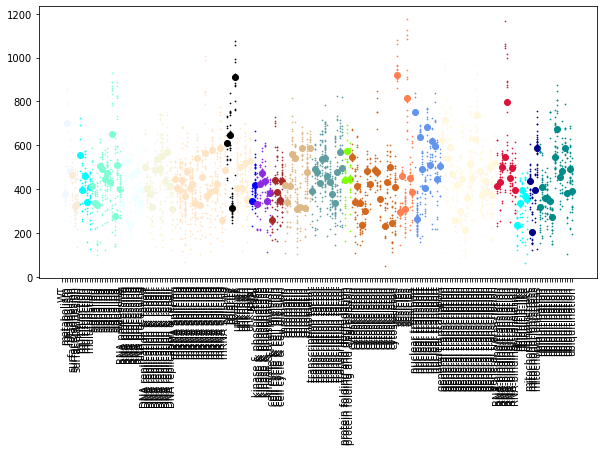

In [150]:
bagman = 0
average_branch_distances = []
average_branch_distances_WT = []
bogo = sorted(set(RNAi_name_array))
#bogo = set(scatter_RNAi_list)
bogo.remove('inlierWT');bogo.remove('outlierWT')

x_d_0 = np.linspace(0, 1100, 10000)

q = 30

indy = np.mat(full_WT_comp)[range(0,30)].T[range(0,30)]

shortround = indy[np.triu_indices(q)].flatten()

data2 =  shortround[shortround != 0].tolist()
#plt.scatter([bagman] * len(data2), data2, c = 'g')

#print(np.triu_indices(len(q[0])))

#average_branch_distances.append(np.mean(data2))
#average_branch_variances.append(np.var(data2))

average_branch_distances_WT = data2

#plt.scatter(bagman, np.median(data2), c = 'g')

#plt.errorbar(bagman, np.median(data2), yerr=[[np.min(data2)],[np.max(data2)]], fmt='o')  



bagman = bagman + 1

for nn in bogo:
    n = nn.upper()
    q = np.where(RNAi_name_array == n)
    #print(q)
    indy = np.mat(full_WT_comp)[q].T[q]
    #short = np.shape(indy)[0]
    #print(short)
    #print(indy.T[np.triu_indices(short,-1)])
    #print(indy[np.where(0 == np.triu(indy))],"\n")
    shortround = indy[np.triu_indices(len(q[0]))].flatten()
    #print()
    data2 =  shortround[shortround != 0].tolist()[0] 
    #print(n,np.mean(data), np.var(data))
    plt.scatter([bagman] * len(data2), data2, c = scatter_RNAi_color[bagman], s = 0.5)
    plt.scatter(bagman, np.median(data2), c = scatter_RNAi_color[bagman])
    #plt.scatter(bagman, data2, c = scatter_RNAi_color[bagman] * len(data2))
    
    #print(len(data2))
    
    if len(data2) == 0: 
        
        data2 = [0]
        print("GOGOG",n)
    
    #plt.errorbar(bagman, np.median(data2), yerr=[[np.min(data2)],[np.max(data2)]], fmt='o' ,c = scatter_RNAi_color[bagman] )
    average_branch_distances = average_branch_distances + data2
    #average_branch_variances.append(np.var(data2))
    
    #sns.swarmplot(data2)
    #print(len(q[0]))
    #print(np.triu_indices(short,-1))
    bagman = bagman + 1
    
#plt.xticks(range(0,bagman),["WT"] + list(bogo)) 
plt.xticks(range(0,bagman),["WT"] + scatter_RNAi_list_group, rotation = 90) 

#plt.savefig("heterogen.svg", format = "svg")



(Supplemental Figure 2B) Figure below

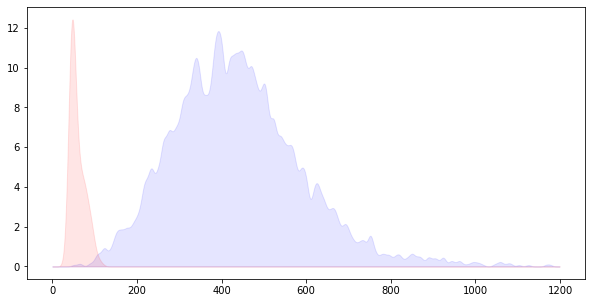

In [136]:
average_branch_distances = np.array(average_branch_distances)
average_branch_distances = average_branch_distances[average_branch_distances > 0]

average_branch_variances = np.array(average_branch_variances)
average_branch_variances = average_branch_variances[average_branch_variances > 0]



x_d_0 = np.linspace(0, 1200, 1200)
x = average_branch_distances_WT[0]
#x_d_0 = np.linspace(0, 1200, 12000)
density_0 = sum(norm(xi, 7).pdf(x_d_0) for xi in x)


x = average_branch_distances[1:]
x_d = np.linspace(0, 1200, 1200)
x_d = x_d_0
density = sum(norm(xi, 6).pdf(x_d) for xi in x)

#plt.plot(density)
plt.fill_between(range(len(x_d)), density, color='blue', alpha=.1)

#plt.plot(average_branch_distances, np.full_like(average_branch_distances, -0.1), '|k', markeredgewidth=1)
#plt.plot(range(len(x_d)), density)
plt.fill_between(range(len(x_d)), density_0, color='red', alpha=.1)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
#plt.plot(np.where(x_d == x), np.full_like(x, -0.1))
#plt.xticks(x_d)
#plt.fill_between(np.linspace(-4, 800, 10000) ,density, alpha=0.5)

#plt.plot(average_branch_distances_WT, np.full_like(average_branch_distances_WT, -0.1), '|k', markeredgewidth=1)
#plt.savefig("heterogeneity.svg", format = "svg")

(Supplemental Figure 4) Code below

In [144]:
self_b_mat_RNAi = [];
inlier_ref = [0, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 27, 28, 29];

self_b_mat_RNAi_eff = np.zeros((len(inlier_ref)*len(root_cells_comp),len(inlier_ref)*len(root_cells_comp)))
for n in range(0,len(root_cells_comp)):
    for m in range(0,len(inlier_ref)):
        x_index = n*len(inlier_ref)+m
        nim = node_comparison_trimmer(fulldictset[inlier_ref[m]],root_cells_comp[n])
        for a in range(0,len(root_cells_comp)):
            for b in range(0,len(inlier_ref)):
                y_index = a*len(inlier_ref)+b
                if y_index > x_index:
                    continue
                ab = node_comparison_trimmer(fulldictset[inlier_ref[b]],root_cells_comp[a])
                self_b_mat_RNAi_eff[x_index,y_index] = union_branch_distance(nim,ab)
        #self_b_mat_RNAi.append(branches)
    print(root_cells_comp[n])
self_b_mat_RNAi_eff = self_b_mat_RNAi_eff + self_b_mat_RNAi_eff.T

ABa
ABp
ABal
ABar
ABpl
ABpr
ABala
ABalp
ABara
ABarp
ABpla
ABplp
ABpra
ABprp
EMS
P2
MS
E
C
P3
D


In [702]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0)) #200 TED, 275 BD instance
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 25)
    plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [30, 30]
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    plt.show()

(Supplemental Figure 4) Figure below

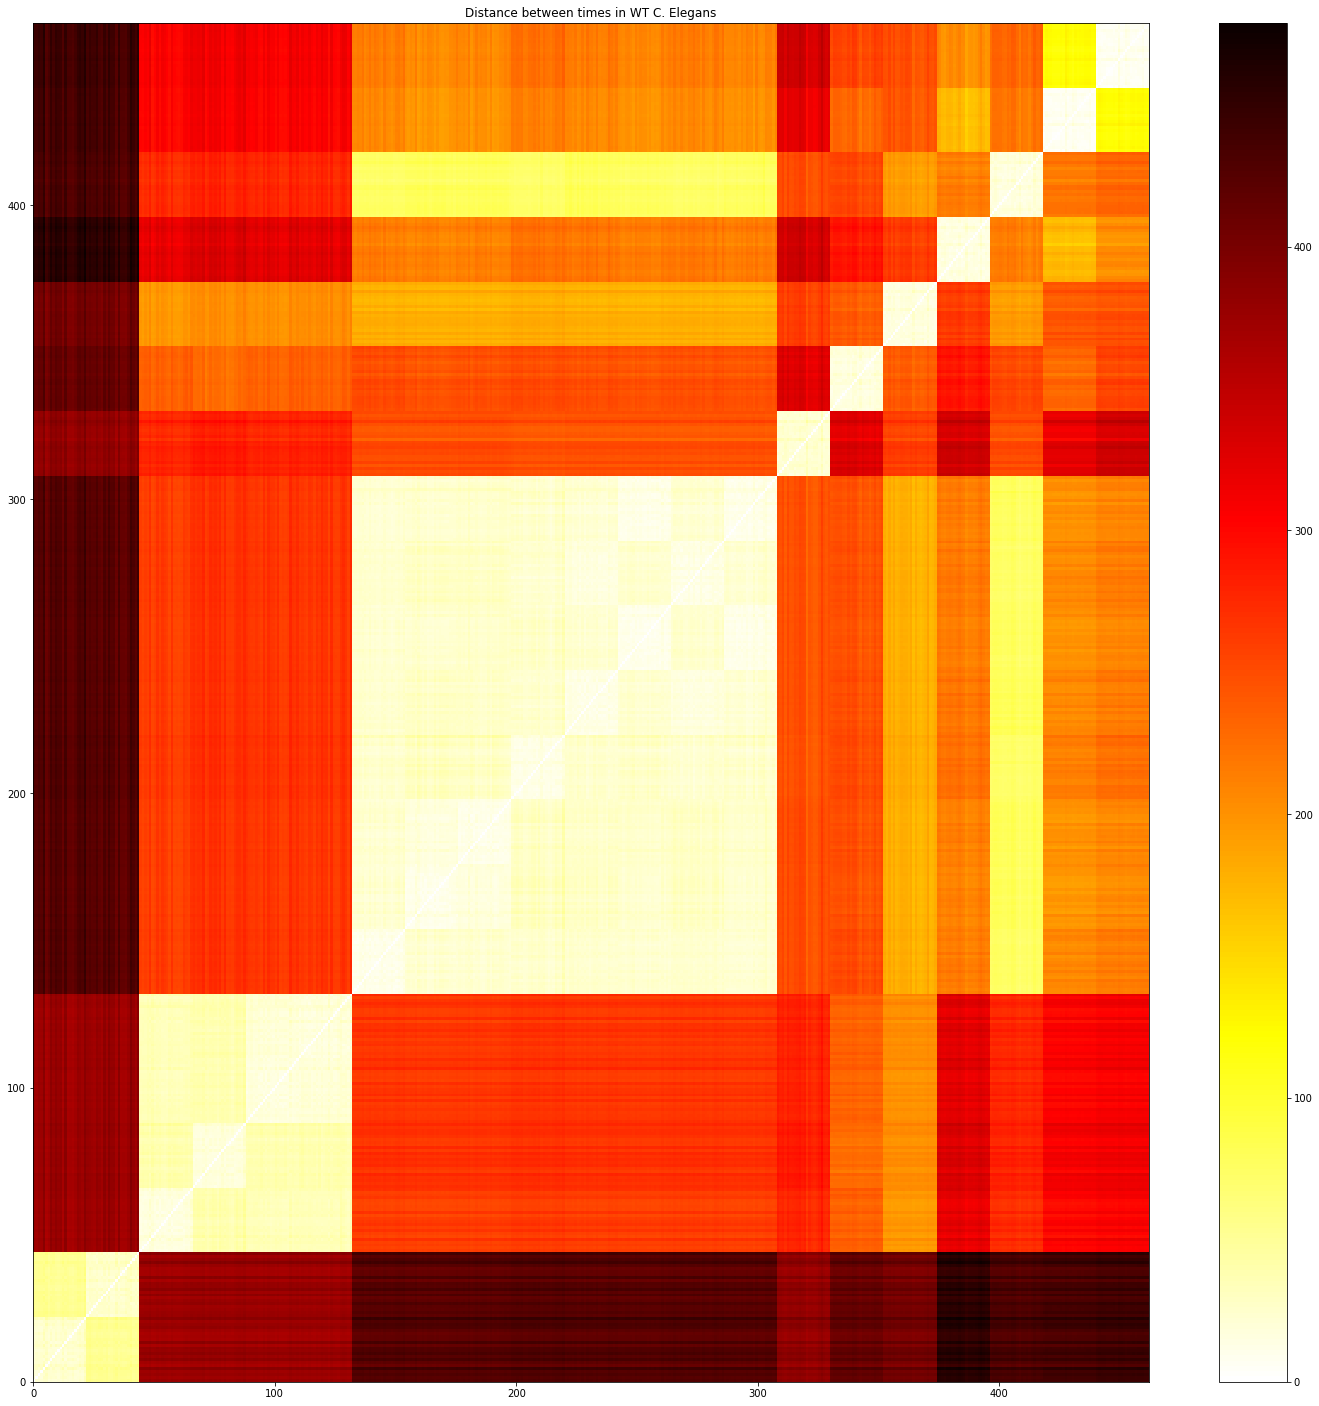

0.0 478.91152627599183


In [145]:
b_mat = self_b_mat_RNAi_eff
plot_2_examples(['hot_r'],self_b_mat_RNAi_eff)
print(min(self_b_mat_RNAi_eff.flatten()),max(self_b_mat_RNAi_eff.flatten()))

In [ ]:
(Supplemental Figure 5) code below

In [146]:
scale = len(inlier_ref);b_mat = np.mat(b_mat)
resample_mat = [];ttest_mat = [];bm_mat = []
for n in range(0,scale-1):
    resample_row = [];ttest_row = [];bm_row = []
    nn = self_comp(np.mat(b_mat[n*scale:(n+1)*scale,n*scale:(n+1)*scale])).tolist()
    for m in range(0,scale-1):
        go2 = np.mat(b_mat[n*scale:(n+1)*scale,m*scale:(m+1)*scale]).flatten()[0]
        go2 = go2[go2 != 0]
        mm = go2.tolist()[0]
        ntsp = novel_two_sample_permutation_test(nn,mm,500)
        if ntsp > 0.01:
            if n != m:
                print('WT/WT branch',root_cells_comp[n],'WT/WT branch',root_cells_comp[n],root_cells_comp[m])
            #print(ntsp)
        resample_row.append(ntsp)
        #t,p = ttest_ind(nn,mm, equal_var=False)
        #ttest_row.append(p)
        #t2,p2 = stats.brunnermunzel(nn,mm)
        #bm_row.append(p2)
    print(n)
    resample_mat.append(resample_row)
    #ttest_mat.append(ttest_row)
    #bm_mat.append(bm_row)

resample_mat = np.mat(resample_mat);#ttest_mat = np.mat(ttest_mat);bm_mat = np.mat(bm_mat)
bm_mat = np.nan_to_num(bm_mat)

0
1
2
3
4
5
6
7
8
9
10
11
12
WT/WT branch ABprp WT/WT branch ABprp ABplp
13
14
15
16
17
18
19
20


(Supplemental Figure 5) Figure below

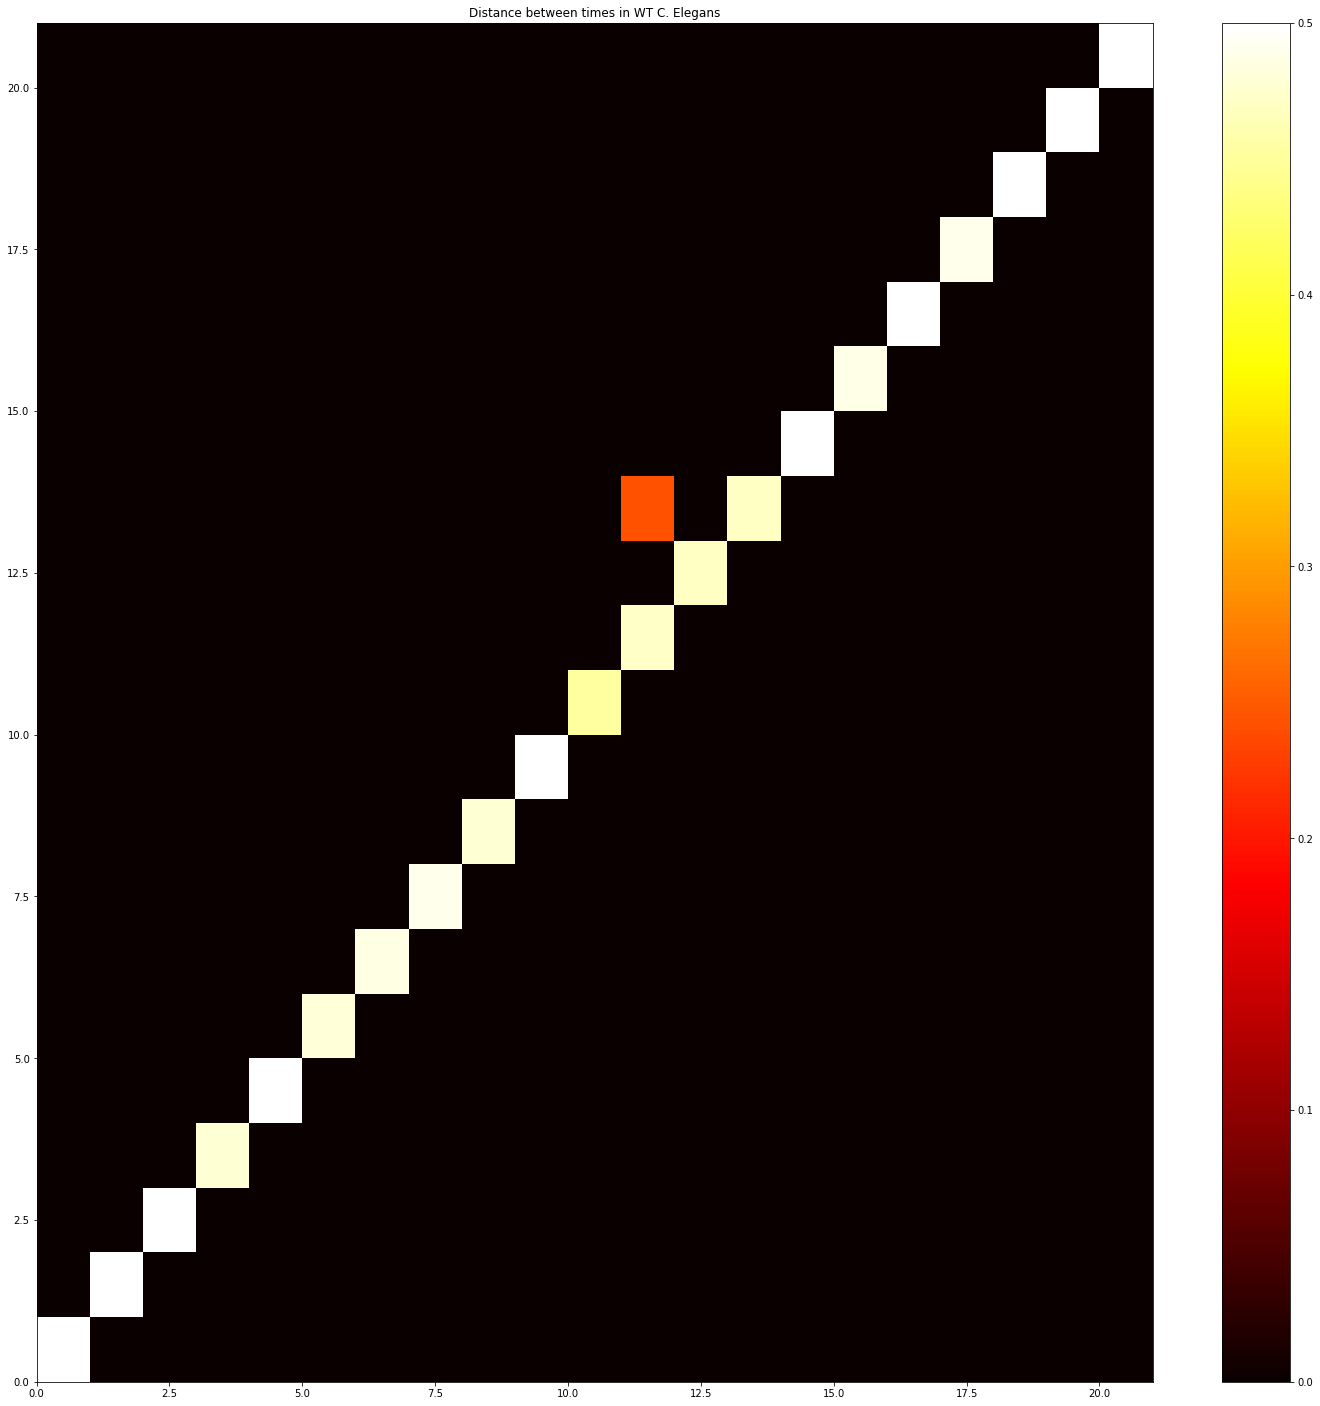

In [149]:
plot_2_examples(['hot'],resample_mat) #rerun the code with more iterations to get the result shown in the paper.
#replace 500 with whichever one you prefer

In [154]:
def dict_PCA_list(x,y):
    xaxis = [];yaxis = []
    for n in (list(set(x).intersection(set(y)))):
        xaxis.append(x[n]);yaxis.append(y[n]) 
    points = np.array([xaxis,yaxis]).T; pca = PCA(n_components=2); pca.fit(points)
    eigenvectors = pca.components_; eigenvalues = pca.explained_variance_;
    return eigenvectors[0][1]/eigenvectors[0][0]

dict_PCA_list(fulldictset[1],fulldictset[10])

1.0077262501461635

In [ ]:
(Supplemental Figure 6) Code below

In [152]:
def dict_counter(x,y):
    Xc=0;Yc=0
    for n in (list(set(x).intersection(set(y)))):
        #print(x[n], y[n])
        if x[n] > y[n]: 
            Xc = Xc + 1
            #print(n)
        elif x[n] < y[n]: 
            Yc = Yc + 1
    #print(Xc,Yc)
    return Xc,Yc
        #print(n,lis[x][n],lis[y][n])

dict_counter(node_comparison_trimmer(fulldictset[inlier_ref[0]],root_cells_comp[n]),node_comparison_trimmer(fulldictset[inlier_ref[0]],root_cells_comp[m]))

(0, 0)

In [200]:
self_b_mat_RNAi = [];
inlier_ref = [0, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23, 24, 25, 27, 28, 29];

self_b_mat_RNAi_eff = np.zeros((len(inlier_ref)*len(root_cells_comp),len(inlier_ref)*len(root_cells_comp)))
self_b_mat_RNAi_opp = np.zeros((len(inlier_ref)*len(root_cells_comp),len(inlier_ref)*len(root_cells_comp)))
self_b_mat_RNAi_slope = np.zeros((len(inlier_ref)*len(root_cells_comp),len(inlier_ref)*len(root_cells_comp)))
for n in range(0,len(root_cells_comp)):
    for m in range(0,len(inlier_ref)):
        x_index = n*len(inlier_ref)+m
        nim = node_comparison_trimmer(fulldictset[inlier_ref[m]],root_cells_comp[n])
        nim_list = list(nim.values())
        for a in range(0,len(root_cells_comp)):
            for b in range(0,len(inlier_ref)):
                y_index = a*len(inlier_ref)+b
                #if y_index > x_index:
                #    continue
                ab = node_comparison_trimmer(fulldictset[inlier_ref[b]],root_cells_comp[a])
                QQ = dict_counter(nim,ab)
                print(QQ)
                self_b_mat_RNAi_slope[x_index,y_index] = dict_PCA_list(nim,ab)
                try:
                    self_b_mat_RNAi_eff[x_index,y_index] = QQ[1]
                    #self_b_mat_RNAi_opp[x_index,y_index] = QQ[0]
                except:
                    self_b_mat_RNAi_eff[x_index,y_index] = 1
                #self_b_mat_RNAi_eff[x_index,y_index] = union_branch_distance(nim,ab)
        #self_b_mat_RNAi.append(branches)
    print(root_cells_comp[n])
#self_b_mat_RNAi_eff = self_b_mat_RNAi_eff + self_b_mat_RNAi_eff.T

(0, 0)
(34, 56)
(20, 67)
(37, 57)
(11, 90)
(89, 14)
(60, 30)
(28, 63)
(66, 28)
(27, 56)
(29, 52)
(50, 39)
(78, 15)
(28, 50)
(63, 26)
(60, 27)
(75, 14)
(45, 38)
(30, 59)
(29, 69)
(35, 57)
(29, 69)
(62, 47)
(42, 67)
(50, 58)
(44, 61)
(45, 66)
(66, 41)
(67, 40)
(54, 54)
(63, 37)
(54, 53)
(56, 44)
(58, 41)
(78, 31)
(51, 54)
(63, 40)
(64, 37)
(69, 34)
(48, 56)
(36, 74)
(48, 62)
(51, 48)
(48, 56)
(0, 61)
(0, 61)
(0, 62)
(0, 61)
(0, 62)
(0, 59)
(0, 60)
(0, 61)
(1, 61)
(0, 61)
(0, 62)
(0, 61)
(1, 59)
(1, 61)
(0, 60)
(0, 60)
(0, 61)
(0, 61)
(0, 62)
(0, 62)
(0, 62)
(1, 59)
(0, 60)
(0, 61)
(0, 62)
(0, 61)
(0, 62)
(2, 59)
(0, 61)
(0, 60)
(1, 59)
(0, 58)
(0, 61)
(0, 60)
(1, 58)
(0, 62)
(0, 58)
(1, 59)
(0, 56)
(0, 61)
(0, 62)
(0, 60)
(0, 59)
(1, 55)
(0, 61)
(0, 62)
(0, 62)
(0, 62)
(1, 61)
(0, 60)
(0, 62)
(0, 62)
(0, 61)
(0, 60)
(0, 61)
(0, 61)
(1, 60)
(0, 61)
(0, 60)
(0, 59)
(0, 59)
(0, 62)
(0, 62)
(0, 62)
(0, 61)
(0, 59)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 61)
(0, 60)
(0, 62)
(0, 61)
(0, 60

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(0, 62)
(0, 61)
(0, 62)
(1, 60)
(0, 58)
(1, 57)
(0, 61)
(0, 55)
(1, 57)
(1, 60)
(0, 57)
(1, 52)
(0, 57)
(0, 57)
(1, 57)
(1, 59)
(0, 62)
(0, 61)
(0, 60)
(0, 60)
(1, 56)
(0, 61)
(0, 62)
(0, 62)
(0, 61)
(0, 62)
(0, 59)
(0, 59)
(0, 62)
(0, 58)
(1, 60)
(0, 59)
(1, 59)
(1, 53)
(0, 60)
(0, 60)
(0, 58)
(2, 59)
(0, 62)
(0, 62)
(0, 61)
(0, 60)
(0, 60)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(3, 40)
(2, 42)
(3, 40)
(1, 42)
(4, 38)
(1, 41)
(2, 42)
(3, 41)
(1, 43)
(2, 41)
(2, 40)
(6, 36)
(3, 40)
(3, 39)
(4, 40)
(4, 39)
(3, 41)
(2, 41)
(3, 40)
(4, 39)
(1, 42)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(90, 11)
(71, 28)
(60, 23)
(77, 21)
(0, 0)
(109, 5)
(100, 4)
(73, 23)
(103, 10)
(77, 17)
(77, 14)
(95, 13)
(113, 3)
(79, 24)
(100, 9)
(100, 5)
(113, 3)
(86, 15)
(70, 25)
(

(60, 43)
(38, 65)
(29, 84)
(32, 73)
(41, 63)
(38, 64)
(0, 62)
(0, 61)
(0, 62)
(0, 60)
(0, 62)
(1, 59)
(0, 60)
(0, 62)
(0, 61)
(0, 61)
(0, 61)
(0, 62)
(1, 60)
(0, 62)
(0, 60)
(0, 61)
(0, 62)
(0, 61)
(0, 62)
(0, 62)
(0, 61)
(0, 60)
(1, 61)
(1, 61)
(0, 61)
(1, 61)
(0, 61)
(1, 61)
(0, 62)
(1, 61)
(0, 61)
(0, 60)
(0, 62)
(0, 62)
(1, 61)
(0, 61)
(1, 61)
(1, 61)
(1, 60)
(1, 61)
(1, 61)
(0, 61)
(0, 60)
(1, 59)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(1, 61)
(0, 62)
(0, 61)
(0, 62)
(0, 62)
(0, 60)
(0, 61)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 61)
(0, 60)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 60)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 61)
(0, 62)
(0, 60)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 60)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(1, 60)
(1, 61)
(1, 60)
(2, 58)
(1, 60)
(2, 59)
(3, 58)
(0, 58)
(0, 60)
(0, 59)
(3, 57)
(1, 61)
(2, 59)
(2, 59)
(2, 57)
(1, 60)
(1, 60)
(1, 59)
(1, 58)
(3, 57)
(0, 60)
(0, 62)
(0, 62)
(0, 62)
(1, 61)
(0, 61)
(0, 62)
(0, 62)
(0, 61)
(0, 62)
(0, 61)
(0, 61)
(1, 60)
(0, 61)
(0, 61)
(0, 60)
(0, 61)
(0, 62)
(0, 62)
(0, 62)
(0, 61)
(0, 61)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 61)
(0, 61)
(0, 62)
(0, 61)
(0, 61)
(0, 61)
(0, 61)
(1, 60)
(0, 61)
(0, 61)
(0, 61)
(1, 61)
(0, 62)
(0, 62)
(0, 62)
(0, 61)
(0, 61)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(11, 43)
(11, 44)
(10, 48)
(12, 44)
(10, 48)
(14, 43)
(14, 41)
(13, 44)
(13, 41)
(10, 46)
(11, 44)
(13, 44)
(16, 37)
(14, 42)
(17, 42)
(14, 43)
(15, 40)
(11, 43)
(10, 47)
(13, 45)
(13, 41)
(11, 45)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(2, 41)
(3, 41)
(1, 42)
(2, 41)
(0, 42)
(3, 41)
(1, 42)
(2, 42)
(2, 41)
(0, 43)
(3, 41)
(3, 41)
(3, 41)
(2, 41)
(3, 41)
(3, 41)
(2, 42)
(3, 41)
(2, 41)
(2, 41)
(3, 41)
(0, 41)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(27, 60)
(15, 75)
(7, 86)
(19, 73)
(5, 100)
(73, 24)
(43, 43)
(20, 77)
(50, 42)
(20, 70)
(20, 72)
(32, 51)
(62, 33)
(25, 68)
(45, 43)
(0, 0)
(58, 32)
(33, 60)
(16, 80)
(11, 88)
(23, 68)
(24, 82)
(57, 48)
(35, 76)
(42, 65)
(41, 67)
(31, 70)
(59, 49)
(63, 43)
(46, 60)
(60, 45)
(44, 65)
(50, 55)
(53, 53)
(76, 38)
(43, 64)
(57, 43)
(60, 47)
(64, 36)
(40, 59)
(32, 78)
(43, 66)
(48, 57)
(40, 62)
(1, 61)
(0, 61)
(0, 62)
(0, 60)
(0, 62)
(1, 60)
(1, 60)
(1, 61)
(1, 61)
(0, 60)
(0, 61)
(1, 61)
(1, 60)
(1, 61)
(1, 60)
(1, 60)
(1, 61)
(1, 61)
(0, 61)
(0, 61)
(0, 61)
(1, 59)
(2, 60)
(1, 60)
(0, 61)
(1, 60)
(0, 61)
(2, 59)
(0, 60)
(1, 59)
(1, 59)
(1, 58)
(1, 61)
(1, 60)
(2, 58)
(0, 61)
(2, 58)
(2, 59)
(2, 56)
(1, 60)
(0, 60)
(1, 60)
(1, 59)
(2,

(19, 35)
(17, 36)
(17, 39)
(15, 40)
(18, 38)
(15, 41)
(13, 43)
(15, 41)
(17, 40)
(15, 40)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(2, 42)
(2, 41)
(1, 42)
(2, 42)
(1, 42)
(2, 41)
(2, 41)
(1, 40)
(2, 41)
(0, 42)
(2, 41)
(2, 41)
(4, 38)
(2, 41)
(2, 40)
(2, 41)
(2, 41)
(3, 40)
(2, 41)
(2, 42)
(2, 40)
(1, 42)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0,

(0, 0)
(36, 62)
(65, 46)
(45, 65)
(51, 54)
(51, 59)
(46, 60)
(69, 42)
(72, 39)
(60, 53)
(74, 37)
(57, 52)
(67, 45)
(62, 44)
(80, 31)
(57, 52)
(71, 40)
(66, 36)
(75, 37)
(57, 51)
(42, 65)
(49, 59)
(58, 45)
(53, 52)
(0, 61)
(1, 60)
(0, 62)
(2, 59)
(0, 62)
(1, 58)
(1, 60)
(0, 61)
(2, 59)
(0, 61)
(0, 62)
(0, 59)
(2, 57)
(1, 60)
(1, 59)
(2, 58)
(1, 59)
(0, 59)
(0, 61)
(0, 61)
(0, 62)
(1, 59)
(1, 60)
(1, 61)
(0, 61)
(1, 61)
(0, 61)
(2, 59)
(0, 62)
(1, 60)
(1, 59)
(0, 58)
(0, 61)
(0, 60)
(2, 58)
(0, 61)
(2, 58)
(2, 59)
(1, 57)
(1, 61)
(1, 61)
(0, 59)
(0, 58)
(2, 56)
(1, 60)
(1, 61)
(1, 61)
(1, 61)
(2, 60)
(1, 60)
(1, 61)
(0, 61)
(1, 60)
(1, 59)
(0, 60)
(1, 60)
(2, 59)
(0, 59)
(1, 60)
(1, 59)
(1, 57)
(1, 61)
(1, 61)
(1, 61)
(1, 59)
(0, 59)
(1, 61)
(1, 61)
(1, 61)
(1, 61)
(1, 61)
(1, 60)
(1, 60)
(0, 61)
(1, 60)
(0, 60)
(1, 60)
(0, 59)
(2, 58)
(0, 61)
(1, 60)
(1, 61)
(2, 59)
(1, 61)
(1, 61)
(0, 61)
(1, 60)
(0, 61)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvect


(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(14, 44)
(10, 47)
(9, 50)
(14, 44)
(10, 48)
(14, 44)
(15, 42)
(14, 42)
(15, 41)
(10, 46)
(9, 47)
(10, 44)
(16, 36)
(15, 37)
(14, 39)
(14, 39)
(16, 37)
(13, 46)
(12, 48)
(11, 42)
(12, 42)
(11,

(0, 45)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(61, 44)
(50, 62)
(46, 58)
(52, 52)
(43, 63)
(85, 36)
(77, 40)
(56, 48)
(76, 40)
(61, 52)
(56, 48)
(70, 43)
(85, 32)
(63, 49)
(71, 45)
(67, 41)
(77, 36)
(63, 47)
(53, 49)
(47, 63)
(59, 51)
(53, 58)
(72, 30)
(32, 61)
(43, 42)
(0, 0)
(32, 55)
(75, 29)
(86, 19)
(50, 51)
(74, 23)
(42, 57)
(59, 35)
(60, 39)
(90, 13)
(50, 59)
(78, 19)
(

(0, 61)
(0, 62)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 61)
(0, 63)
(0, 62)
(0, 62)
(0, 61)
(0, 62)
(0, 62)
(0, 60)
(0, 63)
(0, 63)
(0, 63)
(0, 62)
(0, 63)
(0, 63)
(0, 62)
(0, 62)
(0, 61)
(0, 62)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 62)
(0, 62)
(0, 62)
(0, 63)
(0, 62)
(0, 62)
(0, 61)
(0, 63)
(0, 62)
(0, 63)
(0, 62)
(0, 63)
(0, 63)
(0, 62)
(0, 62)
(0, 62)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)


(19, 40)
(14, 40)
(13, 46)
(12, 40)
(20, 33)
(17, 34)
(17, 37)
(17, 37)
(20, 35)
(14, 43)
(12, 43)
(15, 40)
(16, 40)
(15, 40)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 45)
(0, 43)
(0, 45)
(0, 44)
(0, 45)
(2, 43)
(0, 44)
(0, 44)
(0, 43)
(0, 45)
(0, 45)
(0, 44)
(3, 41)
(0, 44)
(2, 43)
(0, 43)
(1, 43)
(1, 43)
(0, 45)
(1, 43)
(2, 43)
(0, 45)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0

(55, 50)
(61, 42)
(47, 55)
(42, 68)
(37, 69)
(45, 67)
(45, 71)
(56, 40)
(26, 80)
(39, 51)
(35, 59)
(27, 74)
(58, 20)
(61, 18)
(30, 60)
(54, 27)
(32, 65)
(0, 0)
(45, 40)
(83, 15)
(28, 52)
(60, 25)
(59, 22)
(75, 15)
(42, 57)
(11, 86)
(35, 63)
(40, 45)
(26, 75)
(0, 62)
(0, 62)
(0, 63)
(1, 62)
(0, 63)
(1, 61)
(0, 63)
(0, 62)
(0, 63)
(0, 63)
(0, 62)
(0, 62)
(0, 62)
(0, 63)
(0, 63)
(0, 62)
(1, 62)
(0, 63)
(0, 62)
(1, 62)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 62)
(0, 62)
(0, 61)
(0, 62)
(0, 63)
(0, 62)
(0, 62)
(0, 61)
(0, 63)
(0, 62)
(0, 63)
(0, 61)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 61)
(0, 62)
(0, 63)
(0, 63)
(0, 63)
(0, 62)
(1, 61)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 61)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 62)
(0, 62)
(0, 62)
(0, 62)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 63)
(0, 62)
(0, 62)
(0, 62)
(0, 63)
(0, 62)
(0, 63)
(0, 61)
(0, 63)
(0, 62)
(0, 63)
(1, 62)
(0, 63)
(0, 63)
(0, 62)
(0, 62)
(0, 62)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 3

(0, 45)
(0, 45)
(0, 45)
(0, 45)
(1, 41)
(0, 45)
(0, 44)
(0, 45)
(0, 45)
(0, 44)
(0, 45)
(0, 44)
(0, 44)
(0, 45)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(54, 51)
(47, 63)
(49, 66)
(48, 63)
(42, 70)
(75, 31)
(66, 39)
(50, 55)
(68, 37)
(52, 51)
(50, 58)
(59, 47)
(80, 34)
(56, 47)
(62, 40)
(64, 43)
(61, 36)
(57, 49)
(47, 61)
(46, 61)
(52, 57)
(48, 62)
(69, 29)
(42, 66)
(58, 43)
(59

(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(34, 69)
(27, 80)
(31, 79)
(31, 80)
(20, 94)
(56, 48)
(43, 60)
(32, 77)
(53, 56)
(32, 71)
(31, 79)
(39, 67)
(65, 47)
(34, 71)
(45, 63)
(36, 64)
(46, 53)
(40, 66)
(31, 76)
(27, 82)
(37, 75)
(29, 74)
(27, 65)
(14, 100)
(16, 85)
(10, 85)
(8, 99)
(36, 54)
(38, 58)
(14, 85)
(35, 59)
(13, 82)
(15, 75)
(28, 72)
(60, 34)
(15, 78)
(35, 56)
(33, 54)
(0, 0)
(23, 80)
(6, 112)
(14, 92)
(20, 75)
(13, 88)
(0, 62)
(0, 62)
(0, 63)
(1, 62)
(0, 63)
(1, 61)
(0, 63)
(0, 63)
(0, 63)
(0, 62)
(0

(0, 59)
(1, 58)
(3, 56)
(0, 58)
(0, 59)
(0, 56)
(2, 58)
(0, 61)
(0, 63)
(0, 62)
(0, 59)
(4, 58)
(0, 62)
(0, 63)
(0, 63)
(0, 62)
(0, 63)
(0, 58)
(0, 61)
(0, 61)
(1, 59)
(1, 58)
(0, 59)
(2, 58)
(3, 58)
(0, 60)
(0, 60)
(0, 59)
(2, 58)
(0, 63)
(0, 63)
(0, 61)
(0, 60)
(0, 58)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)


(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(13, 39)
(14, 44)
(12, 48)
(17, 40)
(12, 47)
(17, 39)
(18, 37)
(16, 42)
(19, 36)
(12, 42)
(13, 43)
(13, 39)
(22, 33)
(17, 35)
(18, 37)
(17, 38)
(19, 35)
(13, 44)
(13, 45)
(15, 43)
(14, 42)
(14, 40)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 43)
(2, 43)
(0, 44)
(1, 42)
(0, 44)
(2, 41)
(1, 43)
(1, 44)
(2, 42)
(0, 44)
(0, 43)
(0, 42)
(4, 39)
(1, 41)
(2, 43)
(2, 42)
(2, 42)
(2, 43)
(0, 43)
(2, 43)
(2, 41)
(0, 45)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(61, 0)
(61, 1)
(59, 1)
(60, 1)
(60, 1)
(62, 0)
(61, 0)
(61, 1)
(61, 1)
(61, 0)
(61, 0)
(61, 1)
(62, 0)
(61, 1)
(60, 1)
(61, 0)
(62, 0)
(61, 1)
(61, 1)
(57, 2)
(60, 1)
(59, 2)
(62, 0)
(60, 1)
(61, 1)
(61, 1)
(62, 1)
(63, 0)
(62, 1)
(62, 0)
(62, 1)
(62, 0)
(62, 0)
(62, 1)
(63, 0)
(63, 0)
(62, 1)
(62, 1)
(62, 0)
(62, 1)
(62, 1)
(59, 2)
(59, 1)
(61, 1)
(28, 18)
(0, 0)
(13, 30)
(25, 21)
(9, 41)
(50, 4)
(36, 12)
(22, 30)
(39, 12)
(20, 27)
(24, 24)
(34, 22)
(48, 7)
(24, 28)
(35, 14)
(35, 8)
(41, 7)
(34, 8)
(18, 26)
(15, 32)
(21, 23)
(16, 41)
(29, 27)
(22, 31)
(26, 32)
(26, 26)
(24, 32)
(37, 21)
(36, 23)
(31, 29)
(34, 24)
(31, 27)
(26, 26)
(32, 26)
(39, 21)
(29, 27)
(35, 24)
(33, 24)
(33, 19)
(29, 28)
(27, 25)
(25, 34)
(26, 29)
(25, 30)
(35, 19)
(25, 28)
(29, 22)
(28, 30)
(23, 28)
(39, 18)
(41, 17)
(29, 22)
(42, 15)
(27, 26)
(37, 22)
(35, 25)
(41, 14)
(31, 23)
(40, 17)
(40, 18)
(37, 14)
(32, 20)
(21, 37)
(32, 23)
(30, 25)
(27, 29)
(34, 17)
(20, 31)
(2

(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(61, 0)
(61, 0)
(62, 0)
(61, 1)
(63, 0)
(62, 0)
(63, 0)
(62, 0)
(62, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(61, 1)
(63, 0)
(63,

(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(1, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(26, 17)
(24, 20)
(27, 19)
(29, 16)
(26, 19)
(27, 18)
(28, 17)
(26, 18)
(28, 17)
(26, 20)
(25, 19)
(29, 17)
(29, 16)
(28, 17)
(28, 18)
(28, 17)
(28, 16)
(24, 18)
(26, 18)
(25, 19)
(26, 17)
(28, 18)
(6, 20)
(2, 26)
(5, 24)
(3, 24)
(4, 24)
(5, 20)
(6, 21)
(5, 22)
(6, 21)
(4, 23)
(3, 24)
(6, 20)
(8, 19)
(4, 22)
(5, 23)
(6, 23)
(6, 21)
(4, 23)
(2, 25)
(4, 22)
(2, 25)
(4, 24)
(13, 27)
(13, 29)
(10, 33)
(13, 30)
(10, 32)
(15, 26)
(16, 25)
(14, 27)
(17, 23)
(13, 30)
(13, 30)
(15, 26)
(18, 22)
(16, 24)
(17, 27)
(15, 27)
(17, 24)
(12, 30)
(10, 31)
(13, 27)
(14, 26)
(13, 27)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 

(60, 1)
(61, 0)
(59, 1)
(61, 0)
(61, 0)
(61, 0)
(60, 0)
(61, 0)
(62, 0)
(62, 0)
(62, 0)
(61, 0)
(58, 0)
(60, 0)
(61, 0)
(61, 0)
(60, 1)
(60, 1)
(61, 0)
(59, 0)
(63, 0)
(59, 2)
(61, 0)
(60, 1)
(61, 1)
(63, 0)
(62, 0)
(63, 0)
(62, 0)
(62, 0)
(63, 0)
(63, 0)
(63, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(59, 1)
(61, 1)
(62, 0)
(62, 0)
(27, 10)
(27, 20)
(20, 29)
(27, 20)
(6, 42)
(47, 5)
(34, 6)
(22, 23)
(47, 3)
(0, 0)
(21, 13)
(39, 8)
(45, 7)
(20, 16)
(37, 11)
(38, 8)
(45, 5)
(39, 13)
(20, 29)
(20, 28)
(27, 22)
(16, 30)
(24, 28)
(19, 30)
(24, 30)
(23, 32)
(20, 35)
(35, 18)
(30, 18)
(25, 34)
(29, 23)
(25, 28)
(24, 28)
(26, 28)
(36, 18)
(23, 30)
(32, 22)
(26, 23)
(36, 19)
(23, 30)
(23, 28)
(19, 33)
(21, 29)
(27, 30)
(33, 21)
(23, 32)
(29, 25)
(24, 33)
(24, 32)
(36, 18)
(36, 16)
(25, 27)
(40, 15)
(28, 26)
(32, 18)
(32, 22)
(40, 15)
(30, 21)
(38, 18)
(36, 19)
(37, 14)
(29, 22)
(17, 36)
(25, 25)
(26, 24)
(26, 27)
(33, 21)
(19, 35)
(25, 28)
(29, 28)
(22, 34)
(31, 17)
(33, 23)
(27, 24)
(33, 22)

(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(59, 1)
(57, 2)
(54, 3)
(58, 1)
(57, 3)
(61, 1)
(60, 1)
(59, 1)
(61, 1)
(60, 0)
(58, 1)
(60, 1)
(62, 0)
(60, 1)
(59, 3)
(60, 1)
(61, 0)
(60, 2)
(60, 1)
(53, 5)
(57, 2)
(56, 3)
(62, 0)
(53, 5)
(58, 3)
(57, 2)
(55, 0)
(61, 0)
(60, 0)
(61, 1)
(61, 0)
(62, 1)
(62, 0)
(59, 1)
(63, 0)
(61, 0)
(61, 2)
(62, 0)
(62, 0)
(60, 0)
(56, 1)
(59, 4)
(57, 3)
(59, 1)
(8, 38)
(7, 48)
(2, 51)
(7, 43)
(1, 59)
(24, 19)
(10, 34)
(2, 45)
(17, 25)
(7, 45)
(3, 44)
(8, 33)
(

(0, 31)
(0, 31)
(1, 29)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 30)
(1, 30)
(1, 30)
(1, 30)
(0, 29)
(0, 31)
(0, 30)
(1, 30)
(0, 31)
(1, 30)
(0, 31)
(1, 28)
(0, 30)
(0, 30)
(0, 31)
(0, 29)
(1, 28)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(1, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(1, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(1, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(26, 17)
(25, 20)
(26, 18)
(29, 16)
(26, 20)
(27, 16)
(28, 16)
(27, 17)
(28, 17)
(26, 18)
(27, 1

(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 28)
(1, 29)
(0, 29)
(1, 29)
(0, 31)
(3, 26)
(1, 28)
(1, 29)
(1, 25)
(0, 30)
(1, 30)
(0, 28)
(3, 27)
(1, 26)
(2, 27)
(1, 27)
(1, 28)
(1, 30)
(1, 30)
(0, 31)
(1, 30)
(0, 29)
(1, 30)
(1, 30)
(0, 31)
(1, 30)
(0, 31)
(1, 29)
(0, 31)
(0, 30)
(0, 29)
(0, 29)
(0, 31)
(0, 30)
(1, 30)
(0, 30)
(1, 29)
(1, 29)
(1, 29)
(1, 30)
(0, 30)
(0, 31)
(0, 31)
(1, 29)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 29)
(1, 28)
(1, 29)
(1, 28)
(0, 29)
(0, 31)
(0, 30)
(1, 29)
(0, 30)
(1, 28)
(0, 31)
(2, 27)
(0, 29)
(0, 30)
(0, 31)
(0, 29)
(2, 28)
(0, 29)
(0, 31)
(0, 31)
(0, 31)
(1, 30)
(0, 29)
(0, 30)
(0, 30)
(0, 30)
(0, 29)
(1, 30)
(0, 30)
(0, 30)
(0, 29)
(0, 30)
(1, 30)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 29)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(1, 29)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 30)
(0, 27)
(0, 30)
(0, 30)
(0, 31)
(0, 29)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)


(16, 24)
(20, 21)
(22, 15)
(20, 19)
(18, 21)
(19, 22)
(21, 18)
(16, 23)
(15, 26)
(19, 25)
(18, 23)
(17, 23)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(59, 1)
(57, 2)
(58, 3)
(59, 0)
(59, 3)
(60, 1)
(60, 0)
(60, 0)
(59, 0)
(60, 0)
(61, 1)
(61, 0)
(62, 0)
(59, 0)
(58, 1)
(59, 1)
(59, 0)
(58, 1)
(58, 1)
(59, 2)
(59, 1)
(57, 0)
(63, 0)
(58, 3)
(60, 1)
(59, 2)
(60, 2)
(61, 0)
(61, 0)


(2, 27)
(2, 28)
(0, 28)
(1, 28)
(2, 26)
(0, 29)
(0, 27)
(2, 28)
(2, 26)
(0, 30)
(0, 31)
(1, 28)
(2, 28)
(3, 26)
(1, 28)
(0, 31)
(0, 30)
(0, 31)
(1, 28)
(0, 28)
(1, 28)
(0, 30)
(2, 28)
(3, 28)
(0, 27)
(1, 28)
(2, 28)
(0, 28)
(0, 29)
(0, 27)
(1, 29)
(0, 29)
(0, 31)
(0, 30)
(0, 28)
(3, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 30)
(0, 30)
(1, 29)
(0, 29)
(0, 31)
(0, 27)
(1, 30)
(0, 30)
(0, 29)
(2, 26)
(0, 29)
(1, 28)
(1, 28)
(1, 28)
(0, 30)
(0, 31)
(0, 31)
(0, 29)
(1, 29)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 28)
(0, 30)
(0, 29)
(1, 28)
(1, 28)
(0, 28)
(1, 28)
(2, 27)
(0, 29)
(0, 29)
(0, 28)
(1, 28)
(0, 31)
(0, 31)
(0, 29)
(0, 29)
(0, 28)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 29)
(1, 29)
(0, 31)
(0, 30)
(0, 29)
(0, 30)
(1, 29)
(2, 28)
(0, 30)
(1, 29)
(1, 29)
(1, 28)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 29)
(28, 16)
(25, 17)
(26, 19)
(29, 16)
(26, 17)
(28, 16)
(29, 17)
(27, 18)
(28, 16)
(27, 17)
(26, 19)
(28, 16)
(30, 16)
(29, 17)
(28, 17)
(28, 17)
(31, 15)
(27, 17)
(27, 18)
(28, 17)
(29,

(0, 31)
(0, 31)
(1, 29)
(0, 31)
(0, 30)
(1, 29)
(0, 29)
(0, 30)
(0, 29)
(1, 29)
(0, 31)
(0, 30)
(1, 29)
(0, 29)
(0, 31)
(0, 31)
(0, 29)
(0, 29)
(1, 29)
(0, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 29)
(0, 31)
(1, 29)
(1, 29)
(0, 30)
(0, 29)
(1, 29)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(1, 29)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(1, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 30)
(1, 30)
(0, 30)
(0, 30)
(0, 30)
(1, 29)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(24, 21)
(20, 23)
(22, 23)
(26, 18)
(23, 22)
(23, 20)
(27, 19)
(23, 21)
(25, 20)
(18, 23)
(21, 22)
(27, 18)
(28, 18)
(26, 20)
(25, 20)
(25, 18)


(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(25, 19)
(22, 21)
(21, 21)
(26, 17)
(22, 20)
(24, 18)
(27, 16)
(24, 19)
(26, 17)
(21, 20)
(21, 20)
(28, 18)
(28, 15)
(28, 17)
(26, 17)
(26, 17)
(27, 16)
(24, 21)
(22, 18)
(25, 19)
(24, 18)
(26, 17)
(8, 19)
(5, 22)
(7, 19)
(6, 20)
(6, 20)
(7, 17)
(10, 18)
(8, 20)
(8, 19)
(5, 22)
(5, 20)
(9, 16)
(15, 14)
(7, 20)
(10, 18)
(10, 18)
(11, 15)
(5, 18)
(5, 21)
(8, 18)
(7, 18)
(5, 23)
(14, 30)
(14, 29)
(14, 31)
(15, 29)
(13, 31)
(16, 25)
(15, 26)
(14, 27)
(17, 26)
(13, 30)
(13, 30)
(14, 27)
(18, 23)
(14, 27)
(16, 27)
(15, 28)
(16, 26)
(15, 29)
(14, 31)
(16, 28)
(15, 29)


(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(58, 1)
(54, 3)
(55, 3)
(57, 2)
(55, 2)
(60, 1)
(61, 1)
(58, 1)
(61, 1)
(61, 1)
(57, 3)
(59, 0)
(61, 1)
(60, 1)
(57, 2)
(58, 2)
(60, 0)
(57, 4)
(59, 1)
(58, 2)
(58, 2)
(58, 3)
(61, 0)
(53, 4)
(59, 2)
(57, 0)
(57, 2)
(61, 0)
(61, 0)
(62, 0)
(63, 0)
(62, 0)
(61, 0)
(63, 0)
(63, 0)
(62, 0)
(61, 1)
(62, 0)
(62, 0)
(60, 0)
(56, 1)
(61, 0)
(58, 2)
(61, 1)
(21, 35)
(21, 39)
(18, 40)
(19, 40)
(12, 46)
(26, 26)
(21, 31)
(20, 38)
(23, 28)
(18, 36)
(20, 37)
(19, 30)
(26, 28)
(18, 34)
(21, 37)
(22, 33)
(24, 30)
(21, 40)
(19, 41)
(16, 42)
(17, 38)
(13, 40)
(7, 40)
(10, 45)
(5, 53)
(9, 42)
(2, 54)
(24, 21)
(11, 30)
(5, 43)
(14, 32)
(8, 40)
(8, 42)
(1

(2, 29)
(1, 28)
(0, 29)
(0, 30)
(1, 28)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(1, 29)
(1, 30)
(0, 30)
(1, 29)
(0, 29)
(0, 31)
(0, 30)
(1, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 31)
(0, 30)
(0, 29)
(1, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(1, 29)
(0, 29)
(1, 29)
(1, 28)
(1, 28)
(1, 30)
(1, 29)
(1, 27)
(0, 30)
(1, 29)
(1, 29)
(1, 27)
(0, 30)
(0, 30)
(1, 29)
(1, 28)
(1, 27)
(2, 28)
(0, 31)
(0, 30)
(0, 30)
(0, 30)
(2, 29)
(1, 28)
(0, 30)
(1, 28)
(1, 28)
(1, 29)
(1, 29)
(1, 28)
(1, 29)
(0, 29)
(1, 30)
(0, 28)
(1, 30)
(0, 31)
(0, 30)
(1, 30)
(1, 28)
(2, 29)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(1, 29)
(0, 29)
(0, 30)
(1, 29)
(0, 28)
(0, 29)
(1, 30)
(2, 29)
(1, 29)
(1, 30)
(1, 29)
(1, 28)
(0, 30)
(0, 31)
(0, 30)
(1, 30)
(1, 29)
(0, 29)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(1, 29)
(1, 29)
(1, 30)
(1, 30)
(1, 29)
(1, 30)
(1, 29)
(1, 29)
(0, 29)
(1, 29)
(1, 30)
(1, 28)
(0, 30)
(0, 31)
(0, 30)
(0, 30)
(1, 30)
(0, 29)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(1, 29)
(1, 30)
(0, 30)
(1, 30)
(1, 30)


(8, 17)
(5, 22)
(6, 21)
(6, 22)
(8, 21)
(6, 23)
(5, 23)
(5, 20)
(4, 23)
(4, 25)
(13, 29)
(14, 30)
(10, 31)
(14, 29)
(11, 33)
(17, 26)
(17, 27)
(13, 30)
(16, 25)
(11, 30)
(11, 28)
(16, 25)
(18, 21)
(18, 26)
(15, 25)
(16, 26)
(16, 25)
(14, 29)
(13, 31)
(13, 29)
(14, 28)
(14, 28)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(61, 0)
(59, 1)
(60, 1)
(60, 1)
(61, 1)
(62, 0)
(61, 1)
(61, 1

(29, 19)
(22, 18)
(36, 19)
(19, 25)
(50, 5)
(42, 10)
(31, 20)
(38, 12)
(33, 18)
(31, 18)
(30, 16)
(50, 4)
(27, 20)
(44, 8)
(39, 5)
(48, 3)
(36, 19)
(33, 13)
(0, 0)
(27, 15)
(26, 24)
(37, 21)
(28, 27)
(31, 23)
(32, 22)
(30, 27)
(42, 15)
(39, 17)
(32, 22)
(39, 13)
(31, 22)
(34, 16)
(35, 17)
(43, 13)
(38, 18)
(41, 12)
(37, 16)
(39, 12)
(33, 21)
(28, 29)
(33, 22)
(29, 18)
(30, 25)
(39, 20)
(24, 28)
(30, 25)
(32, 23)
(29, 24)
(38, 18)
(39, 17)
(34, 21)
(35, 21)
(31, 23)
(32, 19)
(35, 19)
(44, 11)
(28, 23)
(38, 15)
(39, 15)
(39, 12)
(30, 24)
(26, 26)
(26, 27)
(32, 16)
(30, 20)
(0, 29)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 30)
(0, 29)
(0, 30)
(0, 30)
(0, 29)
(0, 30)
(0, 30)
(0, 30)
(1, 29)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(1, 27)
(1, 28)
(1, 29)
(2, 29)
(0, 30)
(3, 24)
(1, 27)
(2, 28)
(4, 26)
(1, 29)
(1, 29)
(2, 28)
(4, 24)
(3, 28)
(3, 26)
(3, 26)
(1, 27)
(1, 29)
(1, 29)
(1, 29)
(0, 31)
(2, 28)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 29)
(0, 29)
(0, 31)
(0, 30

(0, 31)
(1, 29)
(1, 29)
(0, 31)
(1, 29)
(2, 28)
(0, 31)
(0, 31)
(0, 31)
(1, 29)
(0, 29)
(0, 31)
(0, 30)
(0, 29)
(0, 31)
(1, 30)
(1, 29)
(1, 30)
(1, 30)
(1, 30)
(1, 28)
(1, 30)
(0, 30)
(1, 29)
(0, 31)
(1, 30)
(0, 30)
(3, 26)
(0, 31)
(1, 30)
(1, 29)
(1, 28)
(1, 30)
(1, 30)
(0, 30)
(1, 30)
(0, 31)
(26, 18)
(24, 20)
(24, 20)
(29, 17)
(26, 20)
(26, 17)
(28, 17)
(25, 19)
(27, 17)
(26, 18)
(25, 19)
(26, 17)
(29, 16)
(27, 18)
(28, 17)
(28, 17)
(30, 15)
(26, 18)
(27, 18)
(26, 19)
(26, 17)
(28, 18)
(15, 14)
(7, 18)
(11, 16)
(11, 15)
(12, 17)
(15, 14)
(13, 16)
(11, 17)
(13, 15)
(9, 18)
(9, 18)
(14, 15)
(16, 13)
(11, 14)
(13, 15)
(14, 14)
(14, 14)
(14, 15)
(10, 16)
(12, 14)
(11, 16)
(9, 19)
(16, 26)
(17, 28)
(13, 29)
(17, 26)
(14, 29)
(21, 24)
(18, 24)
(15, 27)
(19, 23)
(14, 27)
(13, 29)
(18, 22)
(22, 17)
(20, 23)
(17, 24)
(19, 24)
(19, 21)
(16, 27)
(14, 30)
(17, 27)
(15, 27)
(15, 27)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(62, 0)
(61, 0)
(62, 0)
(62, 0)
(61, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(61, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(60, 0)
(61, 1)
(60, 1)
(63, 0)
(62, 0)
(62, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(62, 0)
(62, 1)
(62, 0)
(63, 0)
(31, 25)
(22, 29)
(22, 32)
(22, 26)
(17, 36)
(39, 15)
(35, 18)
(30, 29)
(35, 20)
(25, 29)
(29, 28)
(33, 24)
(43, 18)
(30, 28)
(32, 21)
(35, 20)
(36, 19)
(32, 21)
(24, 26)
(22, 33)
(26, 27)
(26, 32)
(26, 27)
(18, 35)
(21, 32)
(21, 30)
(20, 36)
(37, 19)
(33, 23)
(28, 25)
(33, 24)
(25, 30)
(22, 32)
(29, 27)
(40, 18)
(25, 27)
(33, 23)
(30, 24)
(32, 24)
(25, 27)
(24, 26)
(23, 31)
(26, 32)
(22, 31)
(31, 20)
(22, 32)
(0, 0)
(19, 24)
(14, 31)
(39, 12)
(38, 11)
(23, 28)
(36, 12)
(19, 30)
(27

(1, 30)
(1, 30)
(1, 30)
(2, 29)
(1, 29)
(2, 29)
(2, 29)
(2, 29)
(1, 29)
(1, 30)
(1, 29)
(1, 29)
(2, 29)
(1, 29)
(0, 31)
(0, 30)
(0, 31)
(1, 29)
(1, 28)
(2, 29)
(1, 29)
(2, 28)
(1, 29)
(1, 30)
(1, 29)
(2, 28)
(1, 30)
(2, 28)
(1, 29)
(2, 28)
(0, 29)
(0, 30)
(1, 30)
(1, 29)
(2, 27)
(0, 29)
(0, 31)
(0, 31)
(0, 29)
(2, 29)
(1, 28)
(1, 30)
(0, 30)
(1, 29)
(1, 29)
(1, 29)
(1, 30)
(1, 28)
(1, 29)
(1, 30)
(1, 28)
(1, 29)
(0, 30)
(0, 30)
(1, 30)
(1, 30)
(1, 29)
(0, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(1, 29)
(0, 30)
(1, 30)
(1, 30)
(1, 30)
(1, 30)
(1, 28)
(1, 30)
(1, 30)
(1, 30)
(1, 30)
(0, 31)
(0, 30)
(0, 30)
(0, 30)
(1, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(1, 30)
(0, 29)
(0, 30)
(1, 29)
(1, 30)
(1, 30)
(1, 30)
(1, 29)
(1, 30)
(0, 30)
(1, 30)
(1, 29)
(0, 30)
(0, 30)
(1, 30)
(1, 30)
(1, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(1, 30)
(0, 30)
(0, 30)
(0, 30)
(1, 30)
(0, 30)
(1, 30)
(1, 29)
(0, 30)
(0, 30)
(0, 29)
(1, 30)
(0, 31)
(0, 30)
(0, 30)
(0, 30)
(1, 30)
(29, 17)
(27, 17

(16, 27)
(12, 28)
(13, 26)
(8, 31)
(9, 33)
(11, 28)
(17, 22)
(16, 27)
(15, 25)
(13, 26)
(14, 23)
(11, 31)
(9, 33)
(9, 29)
(11, 28)
(11, 28)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(62, 0)
(61, 0)
(61, 0)
(61, 0)
(61, 0)
(62, 0)
(62, 0)
(61, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(60, 0)
(61, 0)
(62, 0)
(62, 0)
(61, 0)
(61, 0)
(61, 0)
(61, 0)
(62, 0)
(60, 1)
(61, 0)


(30, 13)
(46, 4)
(30, 15)
(41, 10)
(41, 9)
(39, 7)
(35, 14)
(10, 39)
(26, 20)
(24, 21)
(16, 25)
(34, 13)
(22, 34)
(22, 24)
(23, 28)
(19, 35)
(34, 15)
(38, 16)
(24, 28)
(28, 19)
(18, 27)
(24, 24)
(23, 22)
(50, 6)
(20, 29)
(37, 19)
(34, 17)
(38, 10)
(25, 23)
(15, 40)
(18, 27)
(29, 20)
(22, 34)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 30)
(0, 31)
(1, 30)
(0, 31)
(1, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(1, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0,

(24, 19)
(27, 18)
(29, 16)
(24, 18)
(28, 17)
(26, 18)
(24, 19)
(29, 17)
(29, 16)
(29, 17)
(29, 15)
(28, 15)
(29, 16)
(26, 17)
(25, 17)
(26, 18)
(26, 18)
(28, 16)
(7, 22)
(1, 28)
(2, 24)
(1, 25)
(3, 23)
(5, 23)
(6, 22)
(5, 23)
(5, 22)
(2, 26)
(4, 23)
(4, 22)
(6, 20)
(4, 24)
(2, 23)
(2, 23)
(6, 21)
(1, 25)
(2, 25)
(4, 24)
(3, 24)
(3, 25)
(13, 28)
(12, 30)
(9, 33)
(14, 27)
(10, 33)
(16, 27)
(17, 27)
(13, 29)
(17, 26)
(13, 30)
(12, 31)
(11, 25)
(16, 23)
(15, 23)
(14, 27)
(15, 26)
(17, 24)
(13, 30)
(11, 32)
(13, 29)
(14, 28)
(14, 29)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(

(62, 0)
(59, 0)
(60, 0)
(59, 1)
(60, 1)
(59, 1)
(63, 0)
(56, 0)
(61, 0)
(60, 0)
(61, 1)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(62, 0)
(63, 0)
(63, 0)
(63, 0)
(59, 0)
(60, 2)
(61, 2)
(61, 0)
(21, 33)
(17, 40)
(16, 41)
(16, 38)
(9, 46)
(28, 19)
(24, 28)
(15, 39)
(28, 26)
(18, 38)
(18, 37)
(19, 29)
(31, 21)
(19, 35)
(22, 31)
(20, 27)
(25, 23)
(18, 28)
(14, 40)
(15, 43)
(17, 38)
(18, 40)
(15, 36)
(9, 43)
(16, 45)
(13, 43)
(10, 44)
(27, 26)
(22, 29)
(14, 37)
(24, 28)
(18, 36)
(15, 39)
(16, 31)
(30, 23)
(12, 33)
(22, 29)
(19, 36)
(23, 29)
(17, 40)
(13, 37)
(12, 41)
(13, 36)
(15, 37)
(16, 36)
(5, 50)
(11, 37)
(5, 44)
(5, 45)
(23, 19)
(18, 14)
(7, 44)
(17, 18)
(10, 41)
(12, 30)
(14, 32)
(26, 18)
(9, 32)
(0, 0)
(17, 21)
(22, 18)
(10, 37)
(1, 56)
(9, 38)
(9, 43)
(6, 44)
(16, 36)
(5, 53)
(7, 46)
(9, 40)
(5, 53)
(10, 31)
(14, 24)
(15, 39)
(13, 30)
(8, 45)
(10, 42)
(11, 39)
(31, 11)
(5, 45)
(14, 29)
(18, 28)
(19, 23)
(4, 44)
(3, 55)
(8, 46)
(14, 35)
(7, 42)
(0, 31)

(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 29)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(28, 17)
(24, 20)
(26, 19)
(28, 16)
(26, 19)
(27, 16)
(29, 16)
(26, 16)
(28, 16)
(27, 17)
(26, 18)
(28, 16)
(29, 16)
(29, 16)
(29, 16)
(

(27, 11)
(23, 17)
(22, 20)
(23, 19)
(24, 16)
(18, 23)
(16, 23)
(19, 22)
(21, 19)
(21, 21)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 29)
(0, 28)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 28)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(62, 0)
(60, 0)
(61, 0)
(61, 0)
(61, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(61, 0)
(61, 0)
(62, 0)
(61, 0)
(62, 0)
(61, 0)
(61, 1)
(60, 1)
(62, 0)
(59, 1)
(62, 0)
(62, 0)
(62, 1)
(62, 0)
(62, 0)
(62, 0)
(63, 0)
(6

(37, 17)
(30, 21)
(23, 20)
(48, 7)
(42, 5)
(26, 17)
(47, 5)
(25, 16)
(40, 12)
(40, 8)
(50, 4)
(29, 15)
(44, 6)
(44, 6)
(44, 5)
(37, 11)
(13, 30)
(30, 18)
(32, 16)
(0, 0)
(39, 13)
(20, 27)
(31, 17)
(30, 20)
(23, 30)
(36, 11)
(39, 10)
(31, 20)
(32, 10)
(24, 22)
(30, 17)
(27, 15)
(47, 5)
(20, 24)
(39, 13)
(37, 13)
(44, 10)
(29, 21)
(21, 31)
(23, 26)
(36, 15)
(24, 25)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(1, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(1, 29)
(2, 29)
(1, 29)
(2, 29)
(0, 31)
(2, 28)
(2, 29)
(2, 29)
(2, 29)
(0, 31)
(1, 30)
(0, 29)
(2, 29)
(1, 29)
(2, 29)
(2, 29)
(2, 29)
(1, 30)
(2, 29)
(0, 30)
(2, 29)
(0, 29)
(1, 30)
(1, 30)
(0, 31)
(1, 30)
(0, 31)
(1, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(1, 29)
(0, 31)
(1, 30)
(1, 30)
(1, 30)
(1, 30)
(0, 30)
(0, 31)
(0, 31)
(1, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(

(0, 30)
(0, 31)
(0, 30)
(0, 29)
(0, 30)
(1, 29)
(1, 28)
(0, 30)
(0, 30)
(0, 30)
(1, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 29)
(29, 15)
(27, 16)
(28, 17)
(30, 16)
(27, 15)
(29, 15)
(32, 14)
(29, 15)
(30, 16)
(30, 16)
(29, 16)
(29, 15)
(32, 14)
(31, 15)
(30, 15)
(29, 14)
(32, 14)
(29, 14)
(29, 17)
(29, 16)
(31, 15)
(31, 15)
(7, 21)
(2, 25)
(3, 24)
(3, 24)
(6, 22)
(5, 22)
(5, 21)
(5, 22)
(7, 21)
(5, 24)
(5, 22)
(5, 23)
(7, 20)
(6, 23)
(5, 21)
(3, 22)
(7, 20)
(2, 22)
(4, 23)
(4, 22)
(5, 22)
(5, 24)
(23, 16)
(17, 23)
(12, 26)
(19, 18)
(11, 25)
(19, 20)
(25, 13)
(21, 19)
(24, 14)
(17, 23)
(16, 22)
(25, 17)
(30, 9)
(26, 14)
(25, 15)
(23, 16)
(28, 14)
(18, 18)
(15, 23)
(21, 19)
(21, 18)
(21, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 29)
(0, 29)
(0, 29)
(0, 2

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(62, 0)
(62, 0)
(61, 0)
(62, 0)
(61, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(62, 0)
(61, 1)
(61, 1)
(61, 1)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(62, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(63, 0)
(61, 0)
(63, 0)
(63, 0)
(36, 20)
(30, 24)
(26, 23)
(31, 23)
(24, 30)
(47, 12)
(42, 14)
(31, 21)
(40, 14)
(34, 22)
(35, 21)
(39, 17)
(43, 16)
(35, 20)
(37, 20)
(41, 13)
(43, 15)
(38, 15)
(31, 20)
(25, 29)
(31, 22)
(30, 26)
(31, 25)
(23, 29)
(24, 27)
(26, 23)
(26, 29)
(43, 13)
(39, 16)
(31, 25)
(37, 20)
(35, 23)
(29, 24)
(34, 21)
(44, 15)
(34, 23)
(36, 19)
(34, 17)
(38, 15)
(33, 24)
(29, 24)
(24, 29)
(32, 24)
(29, 28)
(46, 9)
(30, 16)
(39, 13)
(28, 14)
(34, 15)
(46, 7)
(51, 7)
(36, 13)
(48, 6)
(35, 19)
(42, 13)
(43, 12)
(53, 6)
(41, 12)
(53, 5)
(50, 6)
(51, 4)
(42, 9)
(14, 30)
(37, 14)
(36,

(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(1, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 29)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(26, 19)
(25, 21)
(24, 21)
(26, 17)
(26, 20)
(26, 19)
(27, 16)
(24, 20)


(3, 24)
(10, 30)
(13, 31)
(8, 35)
(10, 27)
(8, 35)
(12, 30)
(12, 29)
(11, 29)
(12, 26)
(10, 32)
(9, 33)
(11, 30)
(14, 21)
(13, 27)
(15, 29)
(11, 29)
(12, 27)
(12, 33)
(9, 34)
(11, 31)
(11, 27)
(10, 29)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(60, 0)
(60, 1)
(59, 1)
(61, 0)
(59, 1)
(60, 0)
(61, 0)
(62, 0)
(61, 0)
(61, 0)
(61, 0)
(62, 0)
(62, 0)
(61, 0)
(60, 1)
(60, 1)
(61, 0)
(6

(25, 31)
(33, 19)
(20, 29)
(32, 25)
(26, 29)
(30, 26)
(23, 31)
(21, 32)
(19, 35)
(24, 29)
(18, 31)
(26, 17)
(22, 29)
(28, 21)
(22, 31)
(22, 31)
(40, 16)
(39, 12)
(19, 27)
(39, 13)
(22, 23)
(30, 17)
(29, 13)
(47, 10)
(25, 20)
(39, 11)
(36, 14)
(39, 11)
(26, 19)
(14, 39)
(23, 24)
(19, 23)
(15, 27)
(33, 17)
(14, 36)
(20, 22)
(24, 26)
(14, 39)
(25, 17)
(32, 12)
(23, 26)
(23, 13)
(14, 32)
(19, 20)
(0, 0)
(48, 5)
(10, 35)
(30, 15)
(30, 11)
(39, 11)
(22, 29)
(8, 39)
(13, 29)
(24, 20)
(10, 35)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(1, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(1, 30)
(1, 30)
(1, 30)
(1, 30)
(0, 31)
(2, 28)
(1, 30)
(1, 30)
(1, 30)
(0, 31)
(0, 31)
(0, 30)
(1, 28)
(0, 30)
(1, 29)
(1, 30)
(1, 30)
(0, 31)
(1, 30)
(0, 30)
(1, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 3

(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(27, 17)
(25, 20)
(25, 20)
(28, 17)
(26, 19)
(26, 16)
(30, 14)
(26, 16)
(27, 16)
(26, 17)
(26, 18)
(28, 16)
(30, 14)
(29, 15)
(28, 15)
(28, 15)
(29, 14)
(27, 16)
(27, 18)
(26, 17)
(27, 15)
(30, 15)
(7, 20)
(1, 27)
(4, 23)
(4, 23)
(5, 22)
(5, 24)
(6, 22)
(6, 21)
(5, 21)
(3, 24)
(5, 21)
(7, 19)
(8, 17)
(3, 21)
(5, 20)
(4, 22)
(10, 18)
(3, 23)
(4, 23)
(7, 21)
(4, 21)
(4, 23)
(14, 24)
(14, 28)
(10, 33)
(16, 27)
(11, 32)
(17, 23)
(18, 22)
(15, 26)
(17, 23)
(13, 28)
(11, 29)
(16, 23)
(23, 17)
(18, 19)
(18, 24)
(15, 21)
(20, 21)
(12, 25)
(11, 29)
(15, 27)
(17, 25)
(15, 26)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0,

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(60, 1)
(59, 2)
(58, 2)
(60, 1)
(57, 2)
(60, 0)
(60, 0)
(60, 0)
(61, 0)
(61, 0)
(61, 1)
(62, 0)
(61, 0)
(61, 0)
(58, 0)
(59, 1)
(60, 1)
(60, 1)
(59, 0)
(57, 2)
(59, 2)
(58, 1)
(62, 0)
(57, 2)
(59, 1)
(58, 2)
(58, 2)
(62, 0)
(61, 0)
(62, 0)
(62, 0)
(61, 0)
(62, 1)
(62, 0)
(63, 0)
(61, 0)
(61, 0)
(61, 0)
(61, 0)
(61, 1)
(58, 2)
(59, 1)
(60, 0)
(61, 0)
(21, 32)
(17, 40)
(14, 42)
(16, 37)
(8, 46)
(29, 22)
(23, 29)
(16, 37)
(28, 29)
(13, 34)
(17, 34)
(24, 29)
(32, 25)
(20, 38)
(22, 30)
(21, 30)
(23, 27)
(20, 31)
(13, 40)
(15, 42)
(15, 36)
(13, 40)
(16, 34)
(13, 43)
(15, 38)
(15, 42)
(10, 44)
(28, 27)
(21, 31)
(14, 37)
(27, 29)
(18, 34)
(16, 42)
(19, 33)
(33, 24)
(15, 36)
(22, 30)
(17, 34)
(24, 28)
(18, 38)
(17, 36)
(12, 39)
(20, 35)
(15

(0, 30)
(0, 30)
(0, 29)
(0, 29)
(0, 29)
(0, 31)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 29)
(1, 30)
(1, 28)
(1, 30)
(0, 30)
(1, 30)
(0, 31)
(1, 25)
(0, 28)
(0, 28)
(1, 27)
(0, 30)
(0, 31)
(0, 28)
(1, 26)
(1, 28)
(0, 27)
(1, 27)
(1, 28)
(0, 30)
(1, 30)
(0, 31)
(0, 29)
(2, 29)
(0, 30)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 29)
(0, 31)
(0, 28)
(1, 30)
(0, 30)
(0, 30)
(0, 29)
(0, 30)
(0, 30)
(0, 30)
(0, 30)
(0, 31)
(0, 31)
(0, 30)
(0, 30)
(1, 30)
(0, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(1, 28)
(0, 29)
(0, 29)
(1, 27)
(1, 28)
(0, 29)
(0, 28)
(1, 27)
(0, 30)
(0, 28)
(1, 28)
(1, 26)
(0, 31)
(0, 31)
(0, 28)
(1, 28)
(2, 26)
(0, 28)
(0, 31)
(0, 31)
(0, 30)
(1, 29)
(1, 28)
(0, 28)
(0, 31)
(1, 28)
(2, 28)
(0, 28)
(0, 28)
(1, 27)
(0, 29)
(0, 30)
(0, 27)
(1, 29)
(0, 30)
(0, 31)
(0, 30)
(0, 29)
(2, 28)
(0, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(0, 29)
(0, 31)
(0, 29)
(1, 30)
(0, 30)
(0, 29)
(1, 28)
(0, 29)
(0, 29)
(0, 29)
(1, 29)
(0, 31)
(0, 31)
(0, 31)
(0, 30)
(1, 29)
(0, 31)
(0, 31)
(0, 31)


(6, 22)
(1, 27)
(2, 25)
(2, 25)
(4, 23)
(4, 24)
(5, 22)
(4, 23)
(5, 21)
(3, 25)
(4, 23)
(5, 23)
(5, 20)
(4, 23)
(2, 21)
(2, 24)
(5, 22)
(2, 25)
(4, 25)
(4, 23)
(5, 24)
(3, 24)
(16, 27)
(13, 30)
(11, 31)
(16, 29)
(11, 31)
(16, 25)
(17, 24)
(17, 27)
(17, 23)
(13, 29)
(13, 29)
(13, 24)
(20, 19)
(18, 23)
(17, 23)
(16, 24)
(17, 23)
(13, 28)
(12, 28)
(14, 27)
(14, 26)
(16, 24)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(

(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 1)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 1)
(28, 1)
(31, 0)
(29, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 1)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(31, 0)
(31, 0)
(17, 8)
(0, 0)
(8, 15)
(13, 11)
(5, 16)
(25, 3)
(17, 8)
(12, 18)
(19, 6)
(10, 13)
(13, 11)
(19, 7)
(22, 4)
(10, 14)
(15, 10)
(14, 7)
(24, 3)
(16, 2)
(8, 15)
(5, 19)
(12, 8)
(9, 18)
(24, 6)
(18, 7)
(19, 10)
(18, 7)
(18, 12)
(24, 5)
(25, 5)
(22, 6)
(24, 6)
(18, 8)
(20, 8)
(22, 8)
(25, 4)
(22, 7)
(24, 4)
(23, 4)
(23, 4)
(

(18, 9)
(9, 14)
(15, 12)
(16, 11)
(14, 12)
(20, 9)
(18, 9)
(16, 12)
(21, 10)
(17, 12)
(18, 12)
(18, 11)
(21, 9)
(16, 11)
(21, 9)
(18, 10)
(20, 8)
(17, 11)
(16, 13)
(12, 13)
(15, 13)
(17, 12)
(20, 9)
(13, 13)
(15, 11)
(15, 10)
(12, 11)
(18, 7)
(21, 7)
(16, 8)
(19, 8)
(17, 13)
(18, 11)
(20, 9)
(22, 3)
(18, 11)
(19, 9)
(19, 5)
(21, 7)
(14, 12)
(14, 13)
(16, 13)
(18, 9)
(17, 13)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(9, 5)
(7, 8)
(6, 8)
(7, 6)
(8, 7)
(8, 6)
(8, 6)
(9, 5)
(8, 6)
(6, 9)
(6, 8)
(9, 5)
(11, 1)
(8, 5)
(8, 6)
(8, 5)
(8, 7)
(7, 7)
(6, 9)
(6, 8)
(7, 6)
(8, 7)
(29, 1)
(26, 4)
(27, 2)
(29, 1)
(26, 3)
(29, 1)
(29, 2)
(27, 3)
(29, 2)
(27, 3)
(27, 3)
(30, 1)
(30, 1)
(29, 1)
(29, 2)
(29, 2)
(30, 1)
(27, 2)
(28, 1)
(27, 2)
(29, 2)
(29, 2)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 1

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(29, 0)
(28, 0)
(31, 0)
(29, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(30, 1)
(31, 0)
(29, 0)
(31, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(29, 1)
(31, 0)
(30, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(29, 0)
(30, 0)
(29, 0)
(30,

(10, 14)
(14, 11)
(7, 20)
(6, 20)
(5, 17)
(9, 16)
(10, 20)
(13, 12)
(9, 19)
(13, 14)
(12, 15)
(10, 17)
(16, 8)
(17, 10)
(11, 15)
(18, 8)
(15, 14)
(12, 10)
(14, 11)
(19, 8)
(13, 12)
(16, 11)
(16, 9)
(17, 10)
(12, 14)
(11, 19)
(10, 16)
(10, 14)
(14, 14)
(13, 12)
(13, 16)
(12, 15)
(10, 16)
(11, 16)
(13, 15)
(15, 10)
(10, 15)
(14, 8)
(11, 14)
(12, 12)
(13, 12)
(15, 9)
(13, 12)
(16, 10)
(15, 10)
(16, 10)
(13, 13)
(10, 19)
(12, 14)
(10, 16)
(9, 15)
(17, 12)
(9, 20)
(11, 17)
(14, 12)
(9, 16)
(17, 11)
(16, 13)
(13, 12)
(16, 10)
(11, 13)
(12, 13)
(13, 11)
(19, 9)
(9, 13)
(13, 12)
(13, 10)
(18, 10)
(12, 12)
(8, 17)
(10, 18)
(11, 12)
(8, 15)
(14, 12)
(13, 16)
(13, 15)
(12, 15)
(10, 18)
(14, 13)
(16, 11)
(11, 16)
(15, 13)
(10, 15)
(13, 13)
(13, 13)
(20, 7)
(9, 15)
(13, 9)
(17, 11)
(16, 10)
(9, 15)
(9, 18)
(10, 16)
(15, 12)
(11, 14)
(16, 14)
(15, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 1

(8, 16)
(4, 23)
(4, 22)
(8, 19)
(5, 21)
(4, 23)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30,

(19, 6)
(19, 8)
(19, 3)
(25, 2)
(20, 5)
(22, 2)
(21, 2)
(22, 2)
(22, 5)
(18, 9)
(18, 10)
(18, 8)
(19, 8)
(20, 6)
(19, 10)
(17, 10)
(16, 9)
(17, 12)
(24, 2)
(22, 6)
(18, 9)
(22, 5)
(20, 8)
(18, 8)
(21, 6)
(22, 4)
(20, 8)
(21, 4)
(21, 5)
(23, 3)
(18, 9)
(19, 8)
(14, 12)
(16, 8)
(20, 9)
(14, 12)
(13, 15)
(13, 15)
(12, 15)
(12, 14)
(16, 11)
(18, 10)
(15, 14)
(16, 12)
(14, 10)
(15, 12)
(15, 12)
(17, 10)
(15, 14)
(15, 12)
(17, 10)
(18, 10)
(14, 15)
(13, 16)
(16, 11)
(14, 12)
(12, 17)
(18, 8)
(14, 14)
(18, 11)
(15, 12)
(12, 10)
(23, 7)
(20, 4)
(17, 10)
(23, 5)
(18, 11)
(20, 7)
(20, 6)
(23, 7)
(17, 10)
(22, 5)
(20, 7)
(22, 5)
(18, 7)
(12, 14)
(15, 12)
(16, 7)
(16, 10)
(17, 8)
(16, 11)
(18, 10)
(16, 13)
(16, 11)
(18, 8)
(21, 6)
(17, 10)
(21, 4)
(19, 6)
(19, 8)
(18, 7)
(24, 4)
(19, 6)
(21, 7)
(20, 6)
(22, 5)
(19, 9)
(13, 16)
(18, 8)
(16, 7)
(17, 8)
(19, 10)
(11, 16)
(13, 11)
(19, 10)
(14, 13)
(19, 6)
(19, 7)
(17, 9)
(19, 7)
(15, 11)
(17, 6)
(19, 7)
(23, 3)
(14, 9)
(19, 6)
(19, 5)
(24, 6)
(18, 9)

(26, 3)
(28, 2)
(25, 5)
(27, 1)
(29, 1)
(28, 2)
(29, 2)
(26, 3)
(27, 3)
(29, 1)
(30, 0)
(29, 2)
(27, 2)
(28, 2)
(30, 0)
(26, 3)
(27, 3)
(26, 3)
(29, 2)
(28, 2)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 14)
(0, 14)
(0, 15)
(1, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(7, 20)
(3, 25)
(4, 23)
(3, 23)
(4, 22)
(5, 20)
(7, 21)
(6, 22)
(5, 19)
(5, 21)
(3, 23)
(8, 20)
(7, 19)
(5, 20)
(6, 19)
(6, 22)
(7, 21)
(5, 22)
(5, 23)
(7, 21)
(5, 22)
(4, 22)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31,

(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(19, 2)
(15, 8)
(11, 3)
(15, 5)
(9, 14)
(27, 0)
(24, 4)
(10, 11)
(23, 1)
(15, 8)
(17, 5)
(26, 2)
(25, 1)
(10, 9)
(20, 4)
(22, 2)
(29, 1)
(23, 2)
(0, 0)
(9, 13)
(16, 5)
(11, 13)
(23, 4)
(20, 5)
(18, 9)
(20, 8)
(18, 10)
(25, 2)
(24, 3)
(23, 7)
(25, 3)
(23, 6)
(22, 7)
(23, 5)
(26, 3)
(22, 5)
(26, 2)
(25, 4)
(25, 3)
(25, 3)
(21, 6)
(19, 8)
(23, 6)
(21, 8)
(24, 5)
(19, 8)
(19, 5)
(16, 3)
(18, 9)
(28, 1)
(23, 3)
(21, 6)
(24, 4)
(22, 6)
(20, 5)
(25, 5)
(25, 5)
(21, 6)
(25, 4)
(25, 3)
(26, 3)
(21, 4)
(20, 5)
(18, 10)
(22, 6)
(21, 9)
(12, 15)
(12, 16)
(12, 14)
(11, 14)
(13, 15)
(16, 12)
(18, 10)
(17, 13)
(16, 14)
(13, 15)
(16, 13)
(16, 13)
(18, 11)
(15, 13)
(15, 14)
(15, 11)
(16, 9)
(15, 15)
(12, 14)
(12, 13)
(14, 13)
(12, 17)
(19, 8)
(12, 13)
(17, 8)
(16, 9)
(13, 10)
(24, 7)
(22, 6)
(21, 9)
(24, 5)
(17, 13)
(22, 

(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(10, 3)
(6, 8)
(6, 8)
(8, 6)
(9, 5)
(9, 4)
(8, 5)
(9, 6)
(8, 4)
(6, 8)
(7, 8)
(9, 5)
(13, 1)
(10, 3)
(7, 5)
(8, 5)
(9, 5)
(7, 7)
(6, 7)
(6, 9)
(7, 5)
(7, 7)
(27, 3)
(25, 4)
(27, 4)
(29, 1)
(25, 4)
(27, 4)
(28, 1)
(27, 3)
(28, 2)
(26, 3)
(25, 4)
(29, 2)
(29, 0)
(28, 2)
(27, 3)
(27, 3)
(27, 0)
(27, 3)
(26, 3)
(25, 3)
(27, 2)
(27, 2)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(6, 20)
(2, 25)
(3, 24)
(3, 24)
(3, 23)
(7, 21)
(6, 22)
(5, 22)
(4, 20)
(4, 24)
(4, 24)
(5, 19)
(7, 15)
(5, 22)
(4, 19)
(5, 23)
(6, 18)
(2, 22)
(3, 23)
(5, 20)
(3, 22)
(4, 24)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)


(30, 1)
(29, 1)
(30, 1)
(29, 1)
(31, 0)
(30, 0)
(30, 1)
(30, 1)
(30, 0)
(30, 0)
(30, 1)
(31, 0)
(30, 1)
(29, 1)
(30, 0)
(31, 0)
(30, 1)
(30, 1)
(28, 1)
(30, 1)
(29, 2)
(31, 0)
(30, 1)
(30, 0)
(30, 1)
(29, 2)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(30, 0)
(30, 0)
(30, 1)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(30, 1)
(29, 1)
(29, 2)
(30, 0)
(30, 1)
(29, 1)
(30, 1)
(30, 1)
(31, 0)
(30, 1)
(30, 0)
(30, 1)
(30, 0)
(30, 0)
(30, 1)
(31, 0)
(31, 0)
(30, 1)
(30, 1)
(30, 0)
(30, 1)
(30, 1)
(28, 2)
(28, 0)
(30, 1)
(10, 17)
(7, 18)
(6, 19)
(7, 17)
(6, 22)
(16, 13)
(11, 18)
(7, 19)
(15, 15)
(8, 19)
(9, 17)
(12, 13)
(11, 15)
(7, 19)
(9, 17)
(10, 14)
(14, 15)
(11, 18)
(5, 20)
(6, 21)
(9, 17)
(8, 19)
(10, 10)
(0, 0)
(5, 15)
(11, 10)
(4, 25)
(24, 1)
(18, 4)
(9, 12)
(19, 6)
(9, 14)
(10, 13)
(14, 15)
(25, 3)
(13, 14)
(19, 4)
(20, 1)
(16, 4)
(17, 6)
(9, 11)
(9, 13)
(8, 15)
(6, 23)
(14, 13)
(7, 18)
(9, 17)
(10, 13)
(8, 20)
(21, 6)
(14, 15)
(10, 19)
(16, 11)
(11, 14)
(9, 16)
(12, 13)
(17, 9)
(10,

(11, 14)
(13, 10)
(17, 13)
(21, 7)
(11, 14)
(16, 12)
(18, 7)
(17, 8)
(9, 15)
(9, 19)
(8, 14)
(15, 12)
(13, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(7, 6)
(6, 9)
(7, 7)
(7, 8)
(7, 8)
(6, 7)
(7, 7)
(7, 8)
(7, 6)
(7, 8)
(7, 8)
(8, 7)
(9, 5)
(7, 7)
(7, 6)
(8, 7)
(7, 7)
(7, 8)
(7, 7)
(6, 9)
(7, 7)
(7, 8)
(26, 4)
(24, 6)
(23, 3)
(24, 3)
(24, 6)
(26, 3)
(27, 2)
(26, 3)
(28, 3)
(23, 5)
(25, 4)
(27, 2)
(27, 2)
(27, 3)
(27, 4)
(27, 3)
(28, 2)
(26, 3)
(25, 4)
(25, 5)
(28, 3)
(27, 4)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(0, 14)
(0, 15)
(1, 14)
(1, 14)
(1, 14)
(9, 17)
(3, 24)
(5, 21)
(5, 22)
(8, 18)
(10, 17)
(8, 19)
(9, 18)
(10, 17)
(8, 19)
(7, 19)
(8, 21)
(12, 15)
(9, 19)
(9, 19)
(5, 18)
(10, 17)
(5, 21)
(5, 20)
(7, 20)
(6, 22)
(6, 22)
(0, 7

(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 1)
(27, 2)
(27, 2)
(30, 1)
(27, 2)
(30, 0)
(30, 1)
(30, 1)
(30, 1)
(29, 1)
(30, 1)
(30, 1)
(29, 2)
(29, 1)
(30, 1)
(29, 1)
(30, 1)
(29, 1)
(28, 1)
(28, 2)
(29, 2)
(29, 2)
(29, 0)
(29, 1)
(28, 1)
(30, 1)
(27, 1)
(30, 0)
(29, 0)
(30, 1)
(30, 1)
(30, 0)
(29, 0)
(30, 1)
(31, 0)
(30, 1)
(28, 2)
(29, 1)
(31, 0)
(29, 1)
(30, 1)
(27, 1)
(29, 1)
(28, 2)
(31, 0)
(28, 2)
(31, 0)
(28, 1)
(28, 2)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(27, 0)
(30, 1)
(29, 1)
(29, 2)
(31, 0)
(28, 1)
(27, 0)
(29, 1)
(29, 0)
(31, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 1)
(31, 0)
(31, 0)
(29, 1)
(30, 0)
(31, 0)
(30, 0)
(28, 0)
(28, 3)
(28, 1)
(30, 0)
(4, 18)
(5, 25)
(3, 24)
(3, 22)
(2, 28)
(9, 15)
(5, 21)
(3, 24)
(7, 18)
(5, 23)
(3, 23)


(5, 20)
(8, 19)
(8, 21)
(7, 21)
(6, 24)
(5, 23)
(7, 21)
(10, 16)
(5, 23)
(9, 18)
(7, 21)
(8, 21)
(7, 20)
(10, 11)
(5, 19)
(10, 17)
(8, 18)
(10, 16)
(8, 21)
(5, 26)
(7, 21)
(6, 23)
(5, 23)
(8, 20)
(4, 27)
(6, 23)
(6, 23)
(3, 25)
(8, 19)
(6, 20)
(8, 23)
(6, 18)
(4, 25)
(5, 21)
(6, 22)
(8, 15)
(4, 25)
(8, 22)
(8, 21)
(9, 17)
(7, 21)
(3, 26)
(6, 22)
(7, 23)
(6, 22)
(8, 19)
(8, 22)
(6, 22)
(9, 22)
(5, 23)
(7, 19)
(7, 19)
(5, 24)
(7, 22)
(6, 21)
(6, 23)
(8, 19)
(15, 13)
(4, 24)
(7, 19)
(9, 19)
(11, 18)
(4, 20)
(5, 25)
(5, 25)
(9, 20)
(5, 21)
(16, 14)
(14, 14)
(15, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(7, 8)
(5, 9)
(7, 8)
(7, 8)
(7, 8)
(6, 9)
(7, 8)
(7, 8)
(7, 8)
(7, 8)
(7, 8)
(7, 8)
(7, 5)
(7, 8)
(7, 8)
(7, 8)
(7, 8)
(7, 8)
(7, 8)
(6, 9)
(7, 8)
(6, 8)
(23, 7)
(20, 8)
(19, 7)
(20, 7)
(20, 9)
(21, 6)
(23, 3)
(24, 5)
(24, 4)
(19, 8)
(20, 8)
(24, 4)
(24, 3)
(2

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 2)
(28, 1)
(30, 0)
(28, 1)
(31, 0)
(30, 1)
(29, 0)
(30, 0)
(30, 1)
(30, 1)
(31, 0)
(30, 0)
(30, 0)
(30, 1)
(30, 0)
(31, 0)
(29, 1)
(28, 0)
(28, 1)
(30, 1)
(29, 2)
(30, 0)
(28, 1)
(27, 0)
(29, 0)
(27, 1)
(30, 0)
(31, 0)
(30, 1)
(30, 1)
(31, 0)
(29, 0)
(30, 0)
(31, 0)
(30, 0)
(28, 3)
(30, 1)
(31, 0)
(29, 0)
(30, 1)
(28, 2)
(29, 0)
(29, 2)
(31, 0)
(27, 1)
(30, 0)
(27, 0)
(28, 2)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0

(8, 19)
(8, 16)
(13, 12)
(8, 18)
(15, 12)
(13, 10)
(14, 11)
(10, 14)
(9, 18)
(5, 22)
(10, 16)
(8, 17)
(3, 23)
(3, 25)
(4, 24)
(3, 25)
(1, 26)
(7, 17)
(5, 16)
(4, 24)
(5, 20)
(6, 23)
(5, 24)
(5, 22)
(11, 14)
(3, 24)
(5, 19)
(5, 23)
(9, 18)
(4, 24)
(3, 25)
(3, 25)
(5, 25)
(6, 23)
(11, 16)
(7, 20)
(9, 20)
(10, 18)
(9, 17)
(16, 10)
(11, 14)
(8, 20)
(11, 11)
(6, 19)
(9, 16)
(12, 12)
(13, 13)
(9, 16)
(13, 12)
(14, 12)
(12, 15)
(10, 19)
(4, 20)
(6, 21)
(10, 20)
(6, 18)
(9, 17)
(9, 18)
(10, 19)
(7, 23)
(8, 22)
(9, 17)
(11, 13)
(8, 20)
(9, 13)
(10, 19)
(8, 18)
(9, 17)
(13, 9)
(8, 14)
(13, 14)
(12, 15)
(13, 14)
(10, 18)
(5, 26)
(9, 18)
(9, 18)
(7, 22)
(8, 15)
(4, 25)
(7, 20)
(7, 20)
(4, 23)
(8, 18)
(7, 19)
(8, 19)
(7, 18)
(4, 21)
(7, 21)
(8, 20)
(14, 12)
(5, 23)
(9, 18)
(10, 19)
(13, 13)
(8, 20)
(4, 23)
(6, 21)
(9, 21)
(8, 20)
(10, 16)
(8, 20)
(8, 19)
(10, 18)
(6, 21)
(9, 15)
(11, 19)
(6, 19)
(8, 15)
(6, 17)
(7, 20)
(9, 17)
(16, 10)
(5, 24)
(11, 18)
(12, 15)
(14, 14)
(7, 20)
(5, 22)
(7, 21)
(9, 

(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(7, 22)
(2, 27)
(2, 24)
(2, 25)
(3, 24)
(5, 20)
(5, 21)
(6, 22)
(5, 21)
(3, 25)
(3, 24)
(5, 21)
(5, 18)
(6, 22)
(3, 21)
(3, 23)
(6, 21)
(2, 24)
(2, 25)
(4, 23)
(3, 23)
(3, 25)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(27, 2)
(27,

(8, 19)
(6, 18)
(6, 17)
(6, 22)
(15, 11)
(11, 14)
(7, 20)
(12, 12)
(9, 17)
(8, 15)
(11, 11)
(14, 13)
(9, 18)
(9, 18)
(10, 15)
(14, 14)
(10, 14)
(6, 21)
(3, 24)
(9, 16)
(7, 19)
(15, 9)
(11, 9)
(9, 16)
(12, 8)
(3, 22)
(28, 1)
(24, 1)
(10, 8)
(25, 5)
(14, 12)
(11, 9)
(18, 8)
(27, 2)
(16, 6)
(21, 4)
(21, 2)
(20, 4)
(19, 5)
(0, 0)
(11, 15)
(11, 13)
(6, 19)
(9, 12)
(8, 17)
(8, 17)
(10, 13)
(9, 19)
(21, 4)
(16, 12)
(10, 16)
(17, 10)
(13, 15)
(9, 16)
(13, 10)
(18, 10)
(13, 17)
(17, 5)
(15, 8)
(17, 9)
(11, 11)
(11, 14)
(7, 19)
(12, 16)
(10, 13)
(8, 20)
(6, 21)
(5, 21)
(4, 21)
(5, 23)
(13, 17)
(11, 16)
(8, 20)
(12, 17)
(10, 19)
(10, 19)
(10, 18)
(15, 14)
(7, 19)
(10, 18)
(10, 20)
(10, 16)
(9, 21)
(4, 19)
(6, 23)
(7, 21)
(8, 21)
(16, 12)
(8, 17)
(8, 15)
(12, 12)
(12, 16)
(21, 8)
(17, 11)
(10, 15)
(17, 10)
(11, 16)
(15, 14)
(15, 10)
(16, 10)
(14, 15)
(18, 10)
(15, 11)
(16, 12)
(11, 13)
(9, 19)
(9, 17)
(10, 14)
(10, 17)
(15, 9)
(9, 15)
(9, 16)
(6, 19)
(8, 17)
(13, 10)
(16, 7)
(8, 13)
(13, 8)
(9, 13

(7, 5)
(9, 5)
(7, 8)
(7, 8)
(9, 5)
(11, 3)
(7, 5)
(8, 6)
(9, 6)
(8, 6)
(7, 8)
(7, 7)
(6, 9)
(7, 7)
(7, 6)
(26, 3)
(23, 5)
(25, 4)
(27, 2)
(23, 6)
(26, 3)
(27, 2)
(27, 3)
(27, 3)
(23, 4)
(25, 5)
(28, 1)
(28, 1)
(27, 3)
(26, 4)
(27, 4)
(28, 1)
(25, 3)
(25, 4)
(24, 3)
(27, 3)
(26, 3)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(6, 18)
(3, 25)
(4, 24)
(3, 24)
(3, 20)
(8, 18)
(8, 20)
(6, 20)
(8, 18)
(4, 20)
(2, 23)
(7, 20)
(11, 17)
(7, 20)
(7, 21)
(5, 22)
(7, 19)
(4, 22)
(2, 23)
(5, 20)
(3, 23)
(5, 23)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(

(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 1)
(30, 0)
(31, 0)
(13, 15)
(9, 15)
(9, 19)
(11, 17)
(6, 20)
(17, 9)
(14, 12)
(8, 20)
(14, 11)
(10, 16)
(11, 16)
(16, 12)
(15, 12)
(10, 19)
(12, 16)
(11, 15)
(17, 10)
(13, 13)
(8, 19)
(5, 23)
(10, 17)
(11, 20)
(19, 6)
(18, 7)
(15, 10)
(16, 6)
(8, 17)
(26, 4)
(25, 5)
(19, 8)
(26, 4)
(14, 8)
(18, 8)
(20, 7)
(26, 3)
(17, 7)
(25, 4)
(24, 4)
(24, 5)
(23, 5)
(17, 8)
(13, 10)
(16, 11)
(12, 13)
(13, 7)
(0, 0)
(12, 12)
(14, 8)
(9, 17)
(26, 1)
(19, 7)
(11, 15)
(15, 7)
(14, 10)
(10, 10)
(13, 12)
(22, 5)
(11, 12)
(23, 2)
(20, 3)
(21, 3)
(14, 6)
(13, 6)
(7, 18)
(12, 11)
(12, 14)
(8, 20)
(6, 18)
(8, 20)
(8, 18

(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(9, 6)
(6, 8)
(6, 9)
(6, 7)
(8, 7)
(8, 7)
(7, 6)
(8, 7)
(7, 6)
(6, 9)
(6, 8)
(8, 5)
(10, 3)
(8, 7)
(7, 6)
(7, 5)
(8, 7)
(7, 7)
(6, 9)
(6, 9)
(6, 7)
(7, 8)
(26, 4)
(25, 4)
(26, 3)
(28, 0)
(25, 5)
(28, 2)
(29, 2)
(28, 3)
(28, 3)
(26, 3)
(26, 4)
(29, 2)
(30, 1)
(28, 3)
(27, 3)
(28, 2)
(29, 1)
(28, 3)
(26, 3)
(26, 4)
(28, 3)
(27, 3)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(0, 14)
(0, 15)
(1, 14)
(1, 14)
(1, 14)
(8, 21)
(2, 23)
(6, 22)
(6, 22)
(7, 21)
(8, 18)
(7, 21)
(8, 20)
(8, 19)
(6, 21)
(7, 21)
(7, 20)
(9, 18)
(8, 18)
(9, 19)
(7, 21)
(9, 19)
(6, 21)
(6, 22)
(6, 21)
(6, 21)
(7, 22)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)


(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(29, 1)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(31, 0)
(29, 2)
(30, 0)
(30, 0)
(29, 0)
(31, 0)
(29, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(30, 1)
(31, 0)
(30, 0)
(30, 0)
(29, 0)
(30, 0)
(30, 1)
(31, 0)
(29, 1)
(31, 0)
(30, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(30, 1)
(30, 0)
(31, 0)
(6, 17)
(5, 23)
(4, 23)
(6, 22)
(4, 25)
(12, 13)
(9, 16)
(5, 25)
(7, 16)
(7, 21)
(5, 21)
(9, 15)
(9, 16)
(6, 22)
(5, 18)
(8, 21)
(10, 13)
(6, 20)
(3, 23)
(3, 27)
(4, 21

(7, 22)
(7, 21)
(5, 26)
(5, 23)
(4, 25)
(3, 24)
(5, 18)
(9, 17)
(7, 22)
(6, 18)
(4, 23)
(4, 20)
(7, 20)
(7, 11)
(4, 25)
(6, 19)
(5, 18)
(9, 19)
(5, 21)
(3, 25)
(4, 24)
(5, 22)
(3, 22)
(8, 16)
(7, 22)
(8, 20)
(5, 20)
(6, 23)
(9, 19)
(6, 16)
(8, 21)
(7, 20)
(5, 21)
(5, 20)
(6, 17)
(13, 9)
(4, 25)
(9, 16)
(10, 16)
(12, 13)
(7, 23)
(5, 24)
(6, 22)
(8, 18)
(6, 17)
(16, 14)
(15, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(9, 5)
(5, 7)
(7, 7)
(7, 8)
(8, 7)
(8, 6)
(7, 6)
(7, 7)
(7, 6)
(7, 8)
(7, 8)
(7, 7)
(9, 4)
(7, 7)
(7, 5)
(7, 6)
(9, 6)
(6, 7)
(7, 8)
(7, 8)
(7, 7)
(7, 8)
(25, 5)
(22, 6)
(21, 6)
(25, 3)
(21, 6)
(24, 4)
(27, 1)
(25, 4)
(26, 2)
(20, 5)
(21, 6)
(28, 3)
(28, 0)
(28, 2)
(25, 3)
(25, 3)
(26, 1)
(24, 6)
(21, 4)
(24, 4)
(24, 3)
(25, 2)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 0)
(28, 0)
(30, 0)
(29, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(29, 1)
(31, 0)
(29, 0)
(31, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(30, 0)
(30, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(31, 0)
(30, 0)
(30,

(6, 20)
(9, 20)
(8, 20)
(14, 11)
(8, 20)
(10, 17)
(11, 18)
(9, 20)
(17, 10)
(14, 9)
(7, 15)
(14, 9)
(9, 17)
(12, 10)
(14, 9)
(17, 10)
(12, 11)
(12, 9)
(15, 12)
(13, 12)
(13, 14)
(6, 21)
(6, 20)
(10, 18)
(9, 17)
(14, 16)
(11, 14)
(14, 14)
(7, 18)
(11, 18)
(15, 13)
(15, 11)
(10, 16)
(16, 10)
(13, 13)
(12, 12)
(12, 12)
(17, 8)
(15, 12)
(16, 9)
(15, 11)
(18, 10)
(11, 12)
(8, 21)
(15, 13)
(10, 15)
(10, 17)
(11, 16)
(5, 22)
(8, 20)
(9, 18)
(6, 21)
(12, 13)
(11, 14)
(10, 15)
(10, 12)
(7, 19)
(12, 16)
(10, 14)
(17, 9)
(5, 20)
(10, 14)
(11, 13)
(14, 11)
(9, 14)
(4, 22)
(5, 20)
(10, 14)
(6, 16)
(15, 12)
(10, 16)
(13, 15)
(11, 15)
(10, 18)
(15, 13)
(16, 13)
(11, 16)
(11, 12)
(10, 15)
(13, 14)
(11, 11)
(19, 6)
(10, 18)
(16, 11)
(19, 11)
(18, 8)
(10, 16)
(9, 17)
(10, 14)
(13, 13)
(11, 13)
(16, 14)
(15, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(10, 5)
(7, 7)


(9, 19)
(8, 21)
(5, 21)
(4, 23)
(7, 20)
(4, 24)
(4, 22)
(5, 23)
(4, 22)
(4, 23)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(28, 2)
(28, 1)
(30, 1)
(28, 1)
(31, 0)
(30, 1)
(30, 1)
(30, 1)
(30, 1)
(30, 1)
(30, 0)
(30, 1)
(30, 1)
(30, 1)
(30, 1)
(30, 0)
(29, 1)
(29, 1)
(29, 1)
(30, 1)
(29, 2)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31,

(11, 14)
(6, 19)
(22, 8)
(20, 8)
(15, 10)
(21, 8)
(13, 12)
(13, 10)
(17, 9)
(20, 6)
(18, 9)
(19, 7)
(19, 6)
(18, 8)
(16, 8)
(14, 11)
(10, 18)
(11, 13)
(11, 14)
(11, 10)
(6, 13)
(6, 15)
(12, 13)
(4, 23)
(26, 1)
(12, 9)
(5, 16)
(16, 10)
(10, 13)
(7, 16)
(10, 13)
(18, 2)
(9, 13)
(21, 5)
(17, 7)
(19, 4)
(10, 10)
(0, 0)
(3, 20)
(8, 13)
(7, 18)
(6, 20)
(3, 23)
(4, 22)
(4, 21)
(5, 23)
(9, 17)
(11, 13)
(8, 21)
(11, 17)
(8, 18)
(8, 21)
(8, 19)
(15, 13)
(7, 18)
(10, 19)
(8, 19)
(12, 16)
(7, 20)
(3, 20)
(5, 22)
(6, 24)
(7, 22)
(14, 12)
(4, 19)
(9, 16)
(10, 15)
(9, 19)
(18, 11)
(17, 12)
(8, 15)
(18, 11)
(11, 18)
(14, 13)
(15, 14)
(18, 11)
(15, 14)
(15, 12)
(16, 14)
(15, 13)
(11, 13)
(7, 19)
(5, 18)
(8, 17)
(10, 18)
(13, 12)
(8, 18)
(10, 16)
(8, 18)
(11, 18)
(14, 13)
(15, 10)
(12, 13)
(16, 11)
(11, 12)
(13, 14)
(14, 12)
(20, 10)
(14, 13)
(15, 12)
(15, 12)
(15, 13)
(12, 15)
(7, 19)
(12, 11)
(12, 14)
(11, 16)
(13, 14)
(5, 22)
(6, 18)
(6, 18)
(5, 19)
(13, 13)
(11, 13)
(11, 15)
(15, 15)
(10, 18)
(9, 15

(9, 6)
(8, 7)
(27, 4)
(25, 4)
(26, 4)
(30, 1)
(24, 5)
(27, 2)
(28, 2)
(27, 3)
(27, 3)
(25, 3)
(26, 4)
(30, 1)
(29, 1)
(27, 2)
(26, 4)
(27, 3)
(29, 1)
(27, 4)
(26, 3)
(24, 3)
(27, 3)
(26, 3)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(6, 21)
(3, 26)
(2, 26)
(3, 24)
(4, 21)
(6, 21)
(6, 21)
(5, 22)
(8, 21)
(3, 22)
(3, 22)
(7, 21)
(10, 18)
(7, 22)
(5, 21)
(3, 23)
(8, 20)
(3, 23)
(4, 23)
(4, 21)
(4, 21)
(5, 22)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 

(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(19, 9)
(19, 11)
(17, 9)
(17, 9)
(13, 14)
(22, 5)
(20, 8)
(13, 10)
(22, 6)
(17, 11)
(18, 8)
(18, 7)
(22, 8)
(15, 13)
(18, 10)
(20, 7)
(22, 6)
(19, 7)
(16, 12)
(16, 14)
(19, 10)
(13, 12)
(23, 3)
(22, 6)
(19, 8)
(22, 5)
(14, 13)
(26, 3)
(27, 3)
(23, 6)
(28, 1)
(20, 3)
(19, 4)
(24, 4)
(27, 2)
(25, 3)
(26, 2)
(27, 2)
(27, 1)
(28, 0)
(21, 6)
(21, 8)
(20, 9)
(20, 9)
(21, 5)
(18, 6)
(20, 10)
(23, 5)
(18, 9)
(28, 2)
(25, 5)
(23, 5)
(25, 3)
(23, 4)
(23, 7)
(22, 2)
(26, 2)
(21, 5)
(25, 6)
(24, 3)
(25, 3)
(23, 3)
(23, 3)
(19, 10)
(22, 7)
(19, 7)
(15, 9)
(0, 0)
(12, 13)
(13, 10)
(10, 12)
(23, 4)
(24, 1)
(19, 9)
(17, 7)
(15, 11)
(14, 4)
(17, 10)
(22, 5)
(14, 7)
(21, 4)
(20, 4)
(24, 2)
(16, 6)
(10, 10)
(12, 11)
(14, 10)
(10, 16)
(23, 7)
(16, 9)
(21, 8)
(20, 10)
(18, 10)
(24, 5)
(22, 6)
(

(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(13, 2)
(10, 3)
(12, 2)
(12, 2)
(13, 2)
(12, 2)
(13, 2)
(13, 2)
(13, 2)
(11, 4)
(11, 3)
(13, 2)
(14, 1)
(14, 1)
(13, 2)
(12, 2)
(13, 2)
(12, 3)
(12, 3)
(11, 4)
(12, 3)
(13, 2)
(30, 0)
(27, 3)
(27, 0)
(29, 0)
(27, 2)
(30, 0)
(31, 0)
(29, 1)
(31, 0)
(29, 1)
(30, 1)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(29, 1)
(31, 0)
(31, 0)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(0, 14)
(0, 15)
(1, 14)
(1, 14)
(1, 14)
(12, 17)
(5, 19)
(10, 18)
(8, 18)
(10, 19)
(10, 15)
(10, 15)
(10, 17)
(9, 15)
(8, 19)
(8, 18)
(10, 14)
(16, 11)
(9, 17)
(12, 13)
(10, 16)
(14, 13)
(9, 17)
(9, 19)
(11, 16)
(10, 16)
(5, 22)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(

(30, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 1)
(29, 1)
(30, 1)
(31, 0)
(29, 0)
(28, 1)
(27, 2)
(30, 1)
(30, 0)
(30, 0)
(29, 0)
(29, 0)
(29, 1)
(29, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(30, 1)
(30, 0)
(31, 0)
(31, 0)
(29, 0)
(29, 0)
(31, 0)
(29, 1)
(30, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(28, 0)
(29, 1)
(29, 0)
(29, 2)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(28, 1)
(30, 1)
(29, 0)
(29, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(29, 0)
(31, 0)
(29, 1)
(31, 0)
(13, 14)
(13, 14)
(10, 17)
(13, 16)
(9, 20)
(17, 9)
(15, 12)
(7, 19)
(15, 14)
(13, 16)
(10, 15)
(12, 14)
(16, 12)
(10, 18)
(14, 15)
(12, 14)
(14, 9)
(13, 13)
(10, 18)
(8, 22)
(11, 14)
(10, 18)
(14, 8)
(18, 12)
(13, 13)
(15, 10)
(9, 18)
(21, 6)
(20, 6)
(16, 11)
(18, 4)
(11, 9)
(13, 12)
(17, 7)
(22, 4)
(16, 5)
(18, 7)
(20, 6)
(18, 7)
(19, 9)
(16, 11)
(15, 13)
(12, 12)

(11, 14)
(16, 12)
(12, 15)
(20, 10)
(16, 13)
(19, 11)
(18, 10)
(17, 12)
(18, 10)
(19, 10)
(17, 11)
(20, 9)
(18, 10)
(17, 10)
(17, 10)
(23, 6)
(15, 12)
(18, 12)
(19, 10)
(20, 8)
(15, 14)
(16, 12)
(16, 12)
(17, 11)
(17, 12)
(16, 14)
(15, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 13)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(13, 2)
(8, 3)
(11, 2)
(12, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 1)
(10, 5)
(10, 3)
(13, 2)
(14, 1)
(14, 1)
(13, 2)
(12, 2)
(12, 2)
(11, 3)
(11, 3)
(10, 4)
(12, 3)
(13, 2)
(26, 3)
(25, 6)
(25, 5)
(26, 4)
(25, 5)
(26, 2)
(27, 0)
(27, 2)
(27, 1)
(25, 3)
(24, 6)
(27, 2)
(28, 0)
(28, 1)
(27, 1)
(27, 2)
(28, 2)
(27, 4)
(24, 3)
(24, 2)
(25, 3)
(26, 0)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(9, 18)
(5, 21)
(8, 18)
(7, 19)
(7, 19)
(8, 16)
(11, 

(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(27, 0)
(28, 0)
(30, 0)
(29, 0)
(31, 0)
(31, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(30, 0)
(29, 1)
(30, 0)
(30, 0)
(29, 0)
(29, 1)
(28, 1)
(29, 0)
(28, 0)
(29, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 1)
(29, 1)
(31, 0)
(28, 1)
(31, 0)
(30, 0)
(29, 0)
(31, 0)
(31, 0)
(28, 1)
(30, 0)
(30, 0)
(29, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 1)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(27, 0)
(28, 0)
(30, 0)
(29, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)


(22, 2)
(15, 6)
(19, 4)
(21, 4)
(23, 2)
(18, 6)
(19, 4)
(21, 7)
(21, 5)
(21, 7)
(13, 13)
(13, 13)
(18, 10)
(16, 10)
(18, 9)
(18, 10)
(17, 8)
(15, 11)
(15, 12)
(18, 7)
(20, 4)
(16, 12)
(20, 3)
(18, 10)
(17, 8)
(17, 7)
(22, 3)
(18, 5)
(21, 3)
(18, 4)
(21, 5)
(19, 7)
(13, 17)
(17, 8)
(16, 10)
(18, 11)
(17, 7)
(11, 16)
(15, 13)
(15, 10)
(13, 14)
(18, 6)
(19, 10)
(17, 10)
(15, 8)
(17, 9)
(17, 8)
(17, 9)
(24, 2)
(13, 11)
(17, 8)
(18, 6)
(20, 4)
(15, 7)
(12, 16)
(14, 11)
(16, 9)
(12, 10)
(19, 7)
(16, 13)
(19, 9)
(18, 8)
(17, 12)
(19, 6)
(20, 5)
(19, 8)
(22, 8)
(21, 9)
(19, 7)
(19, 6)
(24, 3)
(17, 12)
(18, 9)
(21, 6)
(22, 4)
(14, 10)
(15, 12)
(16, 10)
(19, 7)
(18, 10)
(16, 14)
(15, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(13, 2)
(11, 3)
(12, 3)
(12, 3)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(11, 4)
(12, 3)
(13, 2)
(14, 1)
(14, 1)
(12, 2)
(12, 3)
(13, 

(7, 20)
(8, 18)
(7, 19)
(6, 23)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 0)
(26, 4)
(26, 4)
(28, 2)
(27, 3)
(29, 0)
(28, 0)
(29, 1)
(28, 0)
(27, 0)
(28, 0)
(30, 0)
(31, 0)
(28, 1)
(27, 2)
(28, 1)
(30, 0)
(27, 0)
(27, 2)
(27, 3)
(28, 1)
(28, 1)
(26, 0)
(26, 2)
(26, 2)
(27, 2)
(27, 1)
(29, 0)
(30, 0)
(29, 0)
(30, 0)
(30, 0)
(27, 1)
(30, 0)
(31, 0)
(30, 0)
(27, 1)
(26, 1)
(30,

(21, 4)
(18, 8)
(18, 9)
(18, 6)
(15, 11)
(26, 4)
(26, 2)
(21, 5)
(26, 2)
(20, 6)
(18, 4)
(23, 5)
(25, 3)
(25, 3)
(23, 2)
(25, 2)
(25, 2)
(24, 1)
(19, 4)
(18, 9)
(19, 10)
(20, 8)
(21, 6)
(17, 8)
(18, 9)
(21, 6)
(18, 10)
(28, 1)
(24, 4)
(21, 5)
(26, 3)
(23, 4)
(21, 8)
(22, 3)
(25, 2)
(22, 5)
(24, 5)
(24, 3)
(26, 3)
(21, 5)
(20, 3)
(17, 10)
(22, 7)
(20, 5)
(14, 9)
(10, 10)
(9, 11)
(15, 9)
(9, 9)
(23, 3)
(24, 1)
(22, 5)
(23, 6)
(15, 8)
(19, 9)
(16, 7)
(24, 5)
(15, 5)
(24, 4)
(20, 5)
(25, 2)
(16, 6)
(0, 0)
(10, 13)
(15, 11)
(13, 13)
(25, 6)
(17, 9)
(18, 6)
(21, 5)
(22, 8)
(26, 4)
(25, 5)
(20, 5)
(25, 4)
(22, 7)
(22, 6)
(26, 4)
(25, 4)
(23, 5)
(24, 4)
(24, 5)
(23, 5)
(22, 5)
(19, 7)
(17, 8)
(20, 8)
(20, 8)
(22, 5)
(18, 9)
(17, 8)
(16, 7)
(18, 9)
(20, 4)
(22, 2)
(18, 7)
(23, 3)
(18, 8)
(19, 5)
(20, 5)
(25, 3)
(21, 5)
(22, 1)
(23, 2)
(22, 4)
(19, 6)
(15, 12)
(20, 6)
(18, 6)
(17, 8)
(23, 3)
(14, 13)
(19, 8)
(20, 7)
(17, 8)
(22, 5)
(23, 5)
(24, 6)
(22, 7)
(21, 7)
(22, 6)
(20, 6)
(26, 2)
(17, 9)


(12, 2)
(12, 2)
(12, 2)
(10, 4)
(11, 4)
(11, 3)
(14, 0)
(13, 0)
(12, 3)
(12, 3)
(12, 2)
(10, 4)
(11, 4)
(10, 5)
(12, 3)
(11, 3)
(28, 2)
(26, 5)
(26, 3)
(26, 2)
(26, 4)
(29, 2)
(30, 1)
(27, 1)
(30, 1)
(27, 3)
(24, 3)
(30, 0)
(30, 1)
(30, 1)
(30, 1)
(29, 1)
(28, 1)
(27, 1)
(26, 1)
(26, 3)
(26, 1)
(30, 1)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(11, 18)
(7, 21)
(8, 18)
(8, 20)
(9, 19)
(9, 19)
(9, 17)
(9, 19)
(9, 19)
(8, 20)
(8, 20)
(9, 18)
(13, 14)
(9, 20)
(10, 17)
(9, 17)
(12, 16)
(9, 19)
(9, 19)
(11, 18)
(9, 19)
(5, 22)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 6)
(0, 6)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(1, 5)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)

(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(14, 9)
(14, 13)
(14, 12)
(14, 12)
(11, 13)
(21, 6)
(17, 9)
(12, 14)
(19, 9)
(15, 12)
(14, 10)
(20, 6)
(21, 9)
(14, 14)
(16, 12)
(17, 10)
(22, 8)
(15, 9)
(13, 12)
(11, 15)
(15, 11)
(13, 14)
(21, 5)
(18, 8)
(17, 8)
(16, 7)
(12, 15)
(24, 4)
(24, 5)
(20, 7)
(23, 5)
(20, 9)
(20, 9)
(19, 6)
(25, 3)
(20, 7)
(23, 5)
(24, 3)
(25, 4)
(23, 5)
(17, 8)
(18, 8)
(18, 9)
(17, 11)
(21, 5)
(13, 9)
(17, 6)
(20, 7)
(15, 9)
(28, 3)
(20, 5)
(18, 8)
(24, 4)
(21, 6)
(16, 8)
(20, 7)
(27, 4)


(15, 12)
(21, 6)
(12, 10)
(7, 16)
(9, 14)
(14, 10)
(11, 15)
(15, 8)
(11, 16)
(15, 13)
(13, 13)
(10, 15)
(16, 7)
(16, 9)
(14, 10)
(17, 8)
(14, 16)
(15, 10)
(16, 8)
(22, 3)
(11, 13)
(16, 9)
(18, 6)
(16, 8)
(12, 14)
(9, 15)
(12, 14)
(14, 8)
(13, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(11, 2)
(9, 4)
(10, 4)
(10, 3)
(10, 4)
(11, 4)
(11, 4)
(11, 4)
(11, 2)
(9, 6)
(11, 4)
(12, 2)
(13, 2)
(12, 2)
(10, 3)
(12, 3)
(11, 2)
(10, 5)
(10, 4)
(9, 6)
(11, 4)
(11, 4)
(28, 2)
(26, 4)
(26, 4)
(27, 2)
(26, 3)
(28, 1)
(30, 1)
(28, 2)
(29, 1)
(28, 2)
(25, 3)
(29, 1)
(30, 1)
(30, 1)
(28, 1)
(28, 1)
(28, 1)
(27, 1)
(27, 3)
(28, 2)
(28, 1)
(30, 1)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 14)
(0, 14)
(0, 15)
(1, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(7, 17)
(2, 26)
(2, 22)
(3, 23

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 0)
(29, 0)
(30, 0)
(29, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 0)
(29, 0)
(28, 1)
(28, 1)
(29, 0)
(27, 0)
(29, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 1)
(29, 1)
(31, 0)
(28, 1)
(31, 0)
(29, 0)
(29, 0)
(30, 1)
(31, 0)
(28, 1)
(30, 0)
(30, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 1)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(27, 0)
(28, 0)
(30, 0)
(29, 0)
(31, 0)
(31, 0)
(

(5, 21)
(5, 20)
(5, 23)
(10, 13)
(2, 22)
(6, 19)
(5, 18)
(11, 19)
(6, 24)
(4, 25)
(4, 23)
(6, 22)
(5, 23)
(6, 19)
(2, 26)
(3, 19)
(4, 22)
(2, 25)
(13, 9)
(7, 9)
(0, 22)
(0, 0)
(1, 23)
(4, 15)
(6, 15)
(7, 9)
(3, 20)
(6, 10)
(7, 13)
(7, 12)
(4, 20)
(0, 27)
(1, 28)
(3, 22)
(1, 25)
(12, 16)
(11, 17)
(12, 16)
(9, 19)
(10, 20)
(12, 15)
(15, 12)
(9, 20)
(11, 15)
(11, 18)
(11, 14)
(9, 16)
(14, 10)
(11, 14)
(14, 12)
(12, 14)
(15, 13)
(10, 16)
(6, 22)
(10, 18)
(9, 16)
(7, 20)
(5, 17)
(3, 28)
(4, 22)
(6, 21)
(3, 26)
(5, 17)
(6, 20)
(7, 23)
(4, 18)
(3, 25)
(5, 24)
(4, 23)
(10, 8)
(3, 24)
(5, 18)
(6, 20)
(12, 15)
(3, 22)
(3, 25)
(3, 24)
(9, 20)
(2, 23)
(11, 15)
(8, 18)
(10, 17)
(11, 16)
(9, 20)
(11, 16)
(13, 16)
(10, 18)
(12, 15)
(8, 19)
(10, 17)
(7, 15)
(15, 8)
(7, 20)
(13, 16)
(14, 14)
(11, 15)
(10, 19)
(7, 19)
(9, 19)
(12, 15)
(7, 19)
(16, 14)
(15, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(

(2, 22)
(6, 22)
(5, 21)
(7, 20)
(1, 23)
(2, 26)
(4, 21)
(4, 23)
(3, 26)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(28, 0)
(29, 0)
(30, 0)
(29, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(29, 0)
(28, 1)
(28, 1)
(29, 0)
(28, 0)
(29, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(31,

(11, 19)
(20, 6)
(17, 7)
(16, 13)
(17, 4)
(11, 14)
(12, 14)
(14, 8)
(21, 7)
(16, 9)
(16, 10)
(19, 7)
(14, 8)
(17, 11)
(15, 14)
(15, 13)
(14, 14)
(13, 14)
(13, 14)
(13, 17)
(13, 16)
(16, 14)
(12, 16)
(19, 5)
(13, 11)
(11, 17)
(16, 8)
(13, 13)
(13, 15)
(12, 12)
(17, 7)
(11, 12)
(19, 7)
(14, 12)
(18, 8)
(15, 14)
(14, 15)
(13, 17)
(14, 11)
(14, 13)
(8, 16)
(8, 21)
(6, 20)
(7, 20)
(6, 20)
(12, 13)
(12, 14)
(7, 18)
(10, 15)
(8, 18)
(10, 15)
(8, 19)
(16, 9)
(6, 18)
(12, 13)
(13, 14)
(17, 10)
(8, 17)
(5, 23)
(9, 18)
(11, 16)
(11, 19)
(17, 6)
(12, 17)
(13, 11)
(15, 14)
(13, 13)
(20, 2)
(19, 4)
(11, 14)
(20, 3)
(8, 15)
(14, 7)
(18, 7)
(21, 2)
(0, 0)
(16, 5)
(20, 4)
(17, 6)
(17, 7)
(6, 19)
(7, 16)
(13, 13)
(12, 10)
(17, 12)
(16, 13)
(15, 13)
(12, 16)
(12, 15)
(16, 12)
(17, 9)
(11, 15)
(16, 7)
(14, 13)
(16, 12)
(14, 12)
(19, 7)
(15, 9)
(18, 9)
(16, 10)
(20, 8)
(14, 11)
(11, 20)
(15, 12)
(14, 14)
(13, 15)
(15, 9)
(6, 19)
(12, 16)
(14, 14)
(7, 21)
(13, 9)
(14, 10)
(11, 14)
(12, 8)
(8, 17)
(11, 13)
(

(10, 5)
(9, 5)
(26, 3)
(24, 4)
(23, 4)
(25, 3)
(25, 5)
(26, 4)
(28, 2)
(26, 4)
(28, 2)
(25, 3)
(23, 4)
(29, 2)
(28, 2)
(28, 1)
(28, 3)
(27, 3)
(27, 2)
(26, 3)
(25, 3)
(27, 3)
(27, 2)
(28, 2)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(5, 23)
(1, 27)
(2, 25)
(1, 27)
(2, 26)
(2, 23)
(4, 22)
(5, 23)
(4, 23)
(1, 28)
(3, 26)
(5, 19)
(6, 19)
(2, 23)
(4, 23)
(5, 23)
(5, 19)
(1, 24)
(1, 28)
(3, 24)
(3, 24)
(2, 25)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 

(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(31, 0)
(16, 13)
(15, 14)
(13, 13)
(14, 14)
(14, 15)
(21, 9)
(18, 10)
(13, 13)
(19, 11)
(16, 11)
(15, 10)
(17, 9)
(19, 8)
(14, 12)
(17, 12)
(16, 11)
(20, 6)
(17, 13)
(11, 13)
(12, 17)
(15, 11)
(13, 15)
(20, 4)
(20, 7)
(17, 9)
(18, 10)
(11, 15)
(24, 4)
(23, 3)
(21, 6)
(23, 2)
(18, 5)
(17, 5)
(22, 6)
(26, 2)
(20, 4)
(23, 5)
(24, 4)
(22, 5)
(21, 6)
(19, 9)
(19, 11)
(17, 8)
(16, 10)
(21, 7)
(15, 8)
(16, 11)
(18, 8)
(14, 11)
(26, 2)
(20, 5)
(19, 9)
(21, 2)
(19, 3)
(18, 9)
(19, 5)
(24, 4)
(21, 6)
(25, 5)
(21, 5)
(25, 2)
(20, 6)
(19, 7)
(15, 13)
(21, 7)
(19, 8)
(13, 13)
(10, 15)
(12, 15)
(12, 16)
(12, 16)
(18, 10)
(16, 6)
(10, 14)
(15, 10)
(13, 15)
(18, 12)
(14, 15)
(20, 5)
(13, 13)
(15, 12)
(16, 11)
(20, 9)
(12, 15)
(7, 19)
(12, 15)
(14, 15)
(11, 15)
(23, 2)
(14, 12)
(19, 7)
(17, 7)
(16, 5)
(29, 0)
(25, 1)
(16, 4)
(27,

(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(11, 3)
(9, 6)
(11, 4)
(11, 3)
(10, 4)
(10, 4)
(10, 4)
(11, 4)
(11, 3)
(8, 6)
(9, 5)
(12, 3)
(14, 1)
(13, 1)
(10, 4)
(11, 4)
(11, 2)
(10, 4)
(10, 4)
(9, 6)
(10, 4)
(10, 5)
(27, 2)
(25, 4)
(26, 4)
(28, 2)
(25, 4)
(28, 2)
(30, 0)
(28, 2)
(29, 1)
(26, 2)
(26, 2)
(29, 1)
(30, 0)
(29, 1)
(30, 1)
(29, 1)
(28, 0)
(28, 1)
(26, 1)
(27, 2)
(27, 0)
(28, 0)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(8, 19)
(1, 25)
(3, 22)
(2, 22)
(4, 23)
(7, 19)
(7, 20)
(7, 21)
(5, 20)
(3, 23)
(4, 23)
(7, 19)
(9, 16)
(5, 18)
(5, 19)
(6, 21)
(10, 18)
(4, 21)
(3, 24)
(5, 20)
(4, 23)
(4, 22)
(1, 6)
(0, 6)
(0, 7)
(0, 7)
(1, 6)
(1, 6)
(0, 6)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 6)
(1, 6)
(0, 7)
(0, 6)
(0, 6)
(1, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)


(30, 0)
(30, 0)
(31, 0)
(31, 0)
(30, 0)
(28, 2)
(29, 2)
(29, 1)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 1)
(30, 1)
(30, 1)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 1)
(30, 0)
(31, 0)
(15, 14)
(11, 15)
(10, 15)
(11, 15)
(9, 17)
(16, 10)
(15, 13)
(12, 18)
(16, 13)
(14, 16)
(14, 15)
(14, 15)
(17, 12)
(11, 16)
(13, 16)
(13, 14)
(15, 11)
(13, 15)
(8, 17)
(8, 19)
(14, 16)
(10, 17)
(17, 10)
(14, 12)
(12, 15)
(13, 10)
(11, 19)
(23, 6)
(21, 6)
(19, 10)
(21, 8)
(16, 11)
(17, 11)
(19, 11)
(23, 6)
(18, 9)
(22, 9)
(22, 6)
(19, 8)
(20, 7)
(15, 9)
(12, 11)
(14, 13)
(14, 13)
(18, 8)
(14, 10)
(14, 12)

(12, 12)
(24, 4)
(8, 8)
(15, 8)
(16, 5)
(9, 11)
(19, 7)
(23, 2)
(16, 10)
(22, 5)
(12, 9)
(18, 7)
(17, 7)
(29, 1)
(12, 13)
(22, 3)
(26, 3)
(24, 2)
(9, 10)
(8, 14)
(12, 10)
(18, 4)
(12, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(11, 3)
(9, 6)
(10, 4)
(10, 4)
(10, 4)
(9, 4)
(10, 3)
(10, 4)
(11, 3)
(9, 5)
(10, 5)
(11, 4)
(12, 3)
(11, 4)
(11, 3)
(11, 4)
(11, 4)
(10, 5)
(11, 4)
(9, 6)
(10, 4)
(9, 5)
(28, 1)
(27, 3)
(26, 3)
(26, 1)
(27, 3)
(29, 1)
(29, 1)
(28, 2)
(27, 2)
(27, 3)
(26, 4)
(28, 0)
(30, 0)
(29, 2)
(29, 2)
(29, 1)
(30, 0)
(29, 0)
(28, 2)
(28, 3)
(30, 1)
(29, 2)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(0, 14)
(0, 15)
(1, 14)
(1, 14)
(1, 14)
(9, 19)
(1, 26)
(2, 24)
(2, 24)
(6, 19)
(6, 20)
(7, 19)
(7, 20)
(10, 18)
(5, 23)
(6, 21)
(6

(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(26, 1)
(28, 1)
(28, 1)
(27, 1)
(31, 0)
(31, 0)
(30, 1)
(30, 1)
(30, 1)
(30, 0)
(30, 0)
(30, 1)
(30, 1)
(29, 1)
(30, 1)
(30, 0)
(30, 1)
(29, 1)
(26, 1)
(29, 1)
(29, 2)
(31, 0)
(29, 1)
(29, 0)
(30, 0)
(28, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(30, 0)
(31, 0)
(29, 0)
(30, 0)
(28, 1)
(30, 1)
(28, 2)
(31, 0)
(28, 0)
(30, 0)
(28, 0)
(29, 1)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(27, 0)
(30, 0)
(30, 1)
(30, 0)
(31, 0)
(28, 0)
(30, 0)
(29, 0)
(28, 1)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 1)
(31, 0)
(30, 1)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(30, 1)
(29, 2)


(10, 12)
(15, 10)
(7, 16)
(13, 12)
(11, 14)
(12, 14)
(7, 15)
(4, 21)
(5, 21)
(6, 17)
(8, 20)
(9, 17)
(7, 17)
(9, 17)
(2, 20)
(5, 19)
(11, 12)
(12, 8)
(4, 22)
(0, 0)
(6, 19)
(5, 15)
(6, 14)
(16, 8)
(6, 13)
(12, 7)
(12, 12)
(13, 8)
(8, 14)
(0, 29)
(7, 15)
(6, 18)
(4, 22)
(9, 16)
(4, 26)
(7, 20)
(7, 18)
(5, 23)
(8, 12)
(9, 15)
(8, 20)
(9, 15)
(6, 20)
(6, 16)
(9, 16)
(15, 10)
(4, 20)
(6, 14)
(7, 14)
(14, 14)
(8, 16)
(4, 23)
(7, 20)
(9, 17)
(6, 18)
(9, 12)
(6, 18)
(7, 18)
(7, 17)
(3, 21)
(7, 15)
(11, 14)
(5, 17)
(10, 14)
(4, 19)
(6, 21)
(9, 16)
(19, 6)
(3, 22)
(10, 11)
(16, 9)
(12, 9)
(2, 19)
(4, 24)
(2, 24)
(8, 14)
(3, 20)
(16, 14)
(15, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(10, 5)
(8, 6)
(9, 5)
(10, 5)
(9, 5)
(9, 6)
(10, 5)
(10, 5)
(10, 5)
(8, 5)
(10, 5)
(11, 4)
(11, 3)
(10, 5)
(10, 5)
(10, 4)
(10, 5)
(10, 5)
(9, 5)
(9, 6)
(10, 5)
(9, 6)
(27, 3)

(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(28, 0)
(29, 0)
(28, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(28, 0)
(29, 0)
(30, 1)
(30, 0)
(29, 0)
(29, 0)
(30, 0)
(29, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(30, 1)
(31, 0)
(29, 0)
(31, 0)
(29, 0)
(29, 1)
(30, 1)
(31, 0)
(29, 1)
(30, 0)
(30, 0)
(30, 1)
(31, 0)
(31, 0)
(3

(12, 15)
(19, 9)
(16, 8)
(15, 10)
(13, 12)
(13, 14)
(10, 18)
(13, 12)
(12, 16)
(5, 20)
(4, 22)
(6, 22)
(1, 24)
(4, 24)
(12, 16)
(11, 15)
(6, 19)
(11, 18)
(7, 19)
(5, 19)
(5, 17)
(13, 14)
(5, 18)
(9, 18)
(8, 19)
(10, 15)
(7, 22)
(5, 21)
(5, 21)
(6, 22)
(7, 20)
(11, 15)
(7, 21)
(9, 18)
(7, 17)
(8, 17)
(13, 11)
(13, 10)
(8, 19)
(14, 11)
(8, 18)
(9, 14)
(10, 12)
(14, 11)
(9, 15)
(14, 13)
(11, 15)
(13, 13)
(9, 16)
(6, 21)
(5, 21)
(8, 18)
(8, 20)
(10, 13)
(10, 17)
(13, 10)
(9, 18)
(8, 18)
(9, 7)
(15, 5)
(4, 19)
(13, 6)
(7, 15)
(6, 11)
(11, 12)
(20, 1)
(0, 0)
(16, 4)
(13, 3)
(15, 4)
(14, 12)
(2, 25)
(10, 12)
(7, 14)
(3, 19)
(10, 14)
(5, 24)
(9, 19)
(9, 17)
(7, 20)
(11, 14)
(11, 15)
(9, 20)
(12, 16)
(7, 20)
(9, 15)
(11, 15)
(17, 9)
(7, 18)
(12, 14)
(11, 15)
(14, 11)
(10, 16)
(6, 21)
(8, 19)
(11, 16)
(10, 17)
(12, 11)
(9, 17)
(8, 15)
(11, 15)
(5, 19)
(7, 5)
(14, 8)
(7, 15)
(13, 10)
(6, 17)
(7, 13)
(10, 13)
(22, 2)
(4, 21)
(10, 11)
(15, 8)
(18, 6)
(5, 14)
(5, 22)
(5, 20)
(11, 11)
(5, 18)
(16, 14

(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(5, 21)
(1, 27)
(1, 26)
(2, 26)
(3, 24)
(6, 23)
(5, 23)
(3, 22)
(4, 21)
(3, 26)
(3, 25)
(3, 23)
(5, 21)
(4, 23)
(3, 24)
(2, 26)
(3, 20)
(2, 27)
(3, 25)
(4, 24)
(3, 23)
(3, 26)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(29, 0)
(28, 1)
(29, 2)
(29, 1)
(28, 2)
(30, 0)
(30,

(13, 13)
(21, 9)
(18, 9)
(13, 12)
(19, 10)
(15, 13)
(15, 11)
(20, 9)
(19, 8)
(16, 13)
(18, 10)
(18, 9)
(22, 7)
(16, 11)
(15, 14)
(13, 14)
(16, 10)
(16, 14)
(23, 5)
(22, 7)
(18, 8)
(20, 8)
(13, 10)
(26, 4)
(25, 4)
(21, 6)
(26, 5)
(19, 6)
(22, 5)
(24, 5)
(25, 5)
(26, 5)
(23, 4)
(26, 3)
(25, 5)
(24, 3)
(24, 6)
(19, 12)
(18, 9)
(19, 8)
(21, 6)
(20, 9)
(19, 10)
(21, 6)
(16, 10)
(25, 3)
(20, 8)
(19, 8)
(24, 5)
(21, 6)
(19, 8)
(23, 8)
(21, 5)
(21, 8)
(25, 4)
(23, 7)
(21, 6)
(22, 6)
(19, 7)
(17, 10)
(20, 8)
(19, 10)
(15, 12)
(12, 15)
(10, 15)
(13, 15)
(14, 12)
(18, 9)
(18, 8)
(16, 12)
(16, 12)
(15, 12)
(14, 13)
(14, 14)
(18, 8)
(17, 13)
(17, 14)
(17, 11)
(17, 8)
(13, 13)
(12, 15)
(13, 15)
(13, 13)
(11, 14)
(20, 9)
(14, 15)
(17, 9)
(17, 8)
(16, 12)
(21, 8)
(24, 6)
(16, 10)
(22, 6)
(16, 10)
(21, 7)
(22, 7)
(24, 6)
(20, 11)
(24, 5)
(21, 7)
(22, 7)
(17, 9)
(14, 12)
(16, 12)
(15, 8)
(16, 13)
(25, 2)
(23, 5)
(24, 2)
(21, 3)
(23, 3)
(27, 1)
(30, 0)
(20, 6)
(29, 0)
(23, 4)
(23, 1)
(27, 0)
(30, 0)
(25,

(12, 3)
(10, 4)
(10, 4)
(11, 4)
(10, 4)
(10, 5)
(10, 4)
(9, 6)
(10, 5)
(10, 5)
(27, 2)
(27, 4)
(26, 4)
(26, 2)
(26, 3)
(28, 2)
(30, 0)
(28, 3)
(30, 1)
(26, 3)
(24, 4)
(29, 0)
(30, 0)
(29, 1)
(29, 1)
(28, 1)
(28, 0)
(27, 0)
(26, 2)
(27, 3)
(28, 1)
(29, 1)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 14)
(0, 14)
(0, 15)
(1, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(7, 20)
(1, 26)
(2, 24)
(2, 25)
(4, 22)
(6, 22)
(6, 23)
(5, 20)
(4, 19)
(3, 25)
(4, 22)
(5, 20)
(7, 17)
(4, 21)
(4, 19)
(3, 24)
(5, 20)
(2, 26)
(3, 25)
(5, 22)
(4, 22)
(3, 24)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 

(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(19, 9)
(14, 11)
(15, 11)
(14, 9)
(15, 12)
(23, 5)
(21, 7)
(14, 12)
(20, 9)
(17, 9)
(20, 9)
(22, 6)
(21, 7)
(16, 11)
(16, 9)
(21, 6)
(21, 7)
(18, 10)
(14, 11)
(12, 13)
(18, 10)
(16, 12)
(26, 4)
(20, 5)
(19, 7)
(20, 5)
(15, 11)
(26, 3)
(25, 5)
(24, 4)
(27, 4)
(23, 5)
(24, 6)
(23, 3)
(25, 3)
(25, 4)
(26, 4)
(27, 3)
(28, 3)
(25, 4)
(23, 7)
(17, 7)
(20, 8)
(21, 8)
(24, 5)
(19, 8)
(18, 6)
(20, 5)
(20, 7)
(27, 2)
(21, 6)
(22, 7)
(26, 5)
(24, 6)
(19, 6)
(23, 5)
(26, 5)
(22, 5)
(25, 5)
(24, 4)
(28, 2)
(23, 5)
(22, 5)
(19, 7)
(23, 4)
(21, 8)
(15, 13)
(14, 15)
(14, 14)
(16, 11)
(16, 14)
(17, 10)
(21, 7)
(16, 10)
(18, 11)
(16, 12)
(16, 11)
(14, 11)
(23, 6)
(16, 11)
(18, 10)
(18, 10)
(20, 8)
(15, 12)
(13, 1

(0, 6)
(1, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 

(10, 5)
(9, 6)
(10, 4)
(10, 3)
(12, 2)
(12, 3)
(10, 5)
(10, 4)
(10, 4)
(10, 5)
(10, 5)
(9, 5)
(11, 4)
(10, 4)
(26, 2)
(24, 4)
(23, 5)
(25, 3)
(25, 4)
(27, 2)
(30, 0)
(25, 3)
(29, 2)
(26, 3)
(25, 2)
(28, 2)
(30, 0)
(30, 1)
(29, 1)
(28, 1)
(29, 0)
(28, 0)
(25, 2)
(27, 3)
(28, 0)
(29, 0)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 14)
(0, 14)
(0, 15)
(1, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(5, 20)
(3, 25)
(4, 24)
(5, 24)
(4, 22)
(5, 20)
(6, 21)
(4, 24)
(6, 20)
(4, 22)
(4, 24)
(8, 19)
(9, 15)
(6, 19)
(7, 20)
(6, 22)
(8, 18)
(5, 22)
(4, 25)
(7, 21)
(6, 22)
(4, 21)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0

(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(15, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(11, 3)
(9, 6)
(10, 5)
(10, 5)
(10, 5)
(12, 3)
(11, 4)
(11, 4)
(10, 5)
(8, 6)
(10, 4)
(11, 3)
(13, 1)
(12, 2)
(10, 5)
(10, 3)
(10, 4)
(10, 5)
(10, 5)
(9, 5)
(11, 4)
(10, 4)
(26, 3)
(24, 4)
(25, 4)
(27, 2)
(25, 5)
(27, 4)
(27, 0)
(28, 3)
(28, 2)
(26, 3)
(26, 3)
(29, 2)
(28, 0)
(29, 1)
(28, 3)
(27, 3)
(28, 0)
(28, 2)
(26, 3)
(26, 4)
(28, 1)
(27, 2)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(9, 20)
(3, 25)
(4, 22)
(5, 21)
(6, 21)
(8, 18)
(9, 20)
(6, 23)
(7, 19)
(6, 21)
(5, 23)
(7, 19)
(9, 18)
(7, 20)
(6, 20)
(6, 21)
(8, 19)
(6, 22)
(6, 21)
(7, 21)
(4, 21)
(5, 20)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 

(9, 5)
(10, 4)
(10, 5)
(26, 3)
(24, 6)
(24, 6)
(26, 3)
(24, 5)
(26, 3)
(29, 2)
(26, 4)
(28, 2)
(26, 4)
(24, 4)
(28, 2)
(29, 2)
(30, 1)
(27, 2)
(26, 2)
(26, 1)
(25, 1)
(25, 4)
(26, 4)
(26, 1)
(29, 2)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 14)
(0, 14)
(0, 15)
(1, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(7, 19)
(2, 25)
(3, 24)
(4, 22)
(4, 22)
(8, 19)
(9, 20)
(6, 22)
(6, 19)
(4, 22)
(4, 22)
(9, 20)
(10, 16)
(6, 18)
(6, 19)
(5, 21)
(9, 17)
(5, 23)
(4, 23)
(6, 21)
(6, 21)
(4, 22)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(1, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30,

(10, 4)
(10, 4)
(10, 5)
(10, 5)
(10, 5)
(11, 4)
(10, 4)
(28, 0)
(26, 2)
(26, 3)
(28, 2)
(25, 2)
(29, 0)
(31, 0)
(29, 1)
(29, 1)
(28, 2)
(27, 2)
(29, 0)
(31, 0)
(30, 1)
(29, 1)
(29, 0)
(31, 0)
(30, 0)
(28, 2)
(29, 2)
(31, 0)
(31, 0)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 14)
(0, 14)
(0, 15)
(1, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(10, 17)
(3, 23)
(6, 19)
(4, 20)
(7, 18)
(10, 17)
(11, 18)
(6, 20)
(8, 16)
(6, 18)
(4, 20)
(9, 18)
(14, 13)
(9, 17)
(8, 15)
(7, 18)
(13, 14)
(7, 20)
(7, 21)
(8, 18)
(7, 18)
(7, 20)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(1, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)

(22, 7)
(16, 10)
(24, 7)
(23, 7)
(22, 7)
(20, 8)
(18, 8)
(17, 11)
(17, 7)
(17, 11)
(10, 18)
(8, 19)
(7, 18)
(10, 17)
(9, 17)
(16, 11)
(16, 11)
(12, 16)
(13, 16)
(11, 17)
(11, 16)
(13, 17)
(18, 12)
(13, 16)
(12, 15)
(11, 15)
(12, 13)
(9, 18)
(9, 17)
(8, 17)
(11, 17)
(9, 18)
(17, 12)
(11, 15)
(15, 11)
(16, 11)
(12, 14)
(20, 10)
(20, 8)
(16, 12)
(18, 8)
(13, 15)
(16, 10)
(20, 11)
(19, 11)
(15, 14)
(19, 7)
(18, 11)
(19, 8)
(18, 12)
(11, 15)
(13, 17)
(15, 16)
(12, 16)
(18, 9)
(14, 9)
(13, 8)
(8, 8)
(12, 9)
(18, 8)
(22, 5)
(15, 12)
(18, 6)
(15, 11)
(17, 9)
(15, 6)
(23, 4)
(17, 9)
(23, 3)
(24, 5)
(22, 3)
(14, 8)
(4, 20)
(17, 7)
(16, 7)
(10, 15)
(20, 9)
(8, 17)
(13, 10)
(15, 10)
(13, 12)
(19, 10)
(17, 9)
(17, 13)
(16, 12)
(12, 15)
(17, 11)
(16, 14)
(20, 8)
(15, 15)
(19, 9)
(18, 11)
(21, 10)
(16, 10)
(10, 13)
(15, 15)
(15, 11)
(14, 13)
(20, 7)
(0, 0)
(14, 9)
(16, 7)
(7, 11)
(17, 9)
(22, 7)
(15, 12)
(20, 7)
(12, 12)
(18, 10)
(15, 10)
(26, 2)
(13, 14)
(20, 3)
(24, 3)
(22, 5)
(10, 10)
(8, 14)
(13,

(28, 2)
(30, 1)
(28, 2)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(0, 14)
(0, 15)
(1, 14)
(1, 14)
(1, 14)
(7, 20)
(1, 27)
(2, 24)
(2, 25)
(5, 21)
(7, 21)
(5, 19)
(7, 22)
(7, 19)
(4, 23)
(5, 23)
(7, 21)
(8, 18)
(7, 20)
(4, 20)
(3, 23)
(6, 20)
(3, 23)
(3, 23)
(4, 23)
(6, 23)
(4, 22)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31,

(31, 0)
(31, 0)
(31, 0)
(30, 1)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(30, 0)
(31, 0)
(13, 13)
(11, 17)
(9, 16)
(8, 16)
(6, 18)
(16, 10)
(14, 13)
(7, 17)
(16, 11)
(10, 14)
(11, 13)
(12, 9)
(16, 10)
(9, 15)
(12, 17)
(12, 10)
(19, 9)
(12, 13)
(6, 20)
(7, 22)
(12, 16)
(8, 17)
(19, 10)
(13, 15)
(11, 13)
(13, 14)
(9, 18)
(22, 6)
(20, 7)
(13, 11)
(24, 5)
(15, 10)
(14, 9)
(18, 10)
(22, 6)
(19, 6)
(18, 7)
(19, 6)
(18, 6)
(16, 6)
(12, 12)
(12, 13)
(14, 11)
(14, 12)
(17, 10)
(14, 13)
(13, 13)
(13, 13)
(11, 13)
(20, 5)
(19, 10)
(11

(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 1)
(30, 1)
(31, 0)
(30, 0)
(31, 0)
(29, 0)
(29, 1)
(30, 1)
(31, 0)
(30, 1)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(10, 16)
(10, 19)
(9, 20)
(11, 18)
(5, 20)
(16, 11)
(11, 13)
(7, 17)
(13, 13)
(10, 17)
(9, 15)
(13, 12)
(12, 10)
(8, 19)
(9, 15)
(12, 15)
(16, 10)
(11, 15)
(8, 22)
(3, 23)
(10,

(22, 4)
(17, 9)
(12, 10)
(25, 4)
(17, 8)
(14, 12)
(19, 7)
(22, 6)
(18, 10)
(20, 6)
(17, 8)
(20, 8)
(18, 10)
(17, 10)
(14, 12)
(16, 11)
(15, 10)
(11, 16)
(7, 21)
(8, 20)
(7, 20)
(7, 18)
(17, 12)
(16, 12)
(9, 14)
(12, 15)
(10, 14)
(9, 18)
(10, 15)
(19, 10)
(12, 17)
(15, 14)
(14, 14)
(12, 12)
(11, 16)
(6, 21)
(9, 16)
(8, 17)
(9, 19)
(16, 9)
(10, 17)
(13, 14)
(13, 11)
(11, 14)
(17, 7)
(20, 6)
(12, 13)
(20, 7)
(15, 13)
(17, 9)
(18, 7)
(20, 6)
(15, 12)
(19, 8)
(17, 8)
(17, 10)
(12, 7)
(10, 16)
(9, 14)
(11, 8)
(13, 14)
(19, 2)
(16, 9)
(18, 10)
(13, 12)
(13, 10)
(21, 4)
(24, 2)
(13, 8)
(22, 3)
(15, 8)
(17, 4)
(19, 4)
(27, 3)
(21, 4)
(23, 3)
(22, 2)
(23, 2)
(16, 9)
(6, 17)
(21, 5)
(13, 5)
(8, 10)
(18, 11)
(7, 19)
(12, 15)
(14, 11)
(11, 15)
(18, 6)
(16, 7)
(12, 12)
(16, 8)
(10, 14)
(16, 9)
(16, 10)
(24, 6)
(13, 12)
(16, 7)
(17, 7)
(20, 6)
(15, 9)
(9, 15)
(13, 14)
(16, 10)
(11, 14)
(22, 4)
(14, 13)
(19, 9)
(17, 8)
(15, 12)
(19, 2)
(23, 1)
(15, 6)
(19, 3)
(11, 10)
(14, 2)
(19, 4)
(25, 0)
(0, 0)
(2

(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(10, 5)
(8, 7)
(8, 6)
(9, 5)
(9, 6)
(9, 6)
(9, 5)
(10, 5)
(9, 5)
(7, 7)
(8, 6)
(10, 4)
(10, 3)
(9, 6)
(10, 5)
(10, 4)
(10, 5)
(9, 6)
(8, 7)
(8, 6)
(9, 5)
(9, 6)
(27, 2)
(24, 6)
(24, 6)
(26, 4)
(25, 4)
(27, 2)
(28, 1)
(26, 4)
(27, 3)
(23, 4)
(23, 6)
(28, 1)
(30, 0)
(28, 1)
(25, 3)
(27, 3)
(28, 1)
(25, 3)
(23, 3)
(24, 4)
(27, 3)
(26, 2)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 14)
(0, 14)
(0, 15)
(1, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(4, 21)
(1, 28)
(1, 26)
(1, 26)
(2, 24)
(4, 24)
(3, 24)
(4, 23)
(4, 22)
(2, 24)
(2, 23)
(6, 23)
(4, 22)
(4, 22)
(2, 23)
(1, 25)
(4, 22)
(1, 26)
(2, 26)
(4, 24)
(4, 23)
(3, 23)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 

(11, 18)
(11, 16)
(11, 16)
(11, 19)
(18, 10)
(10, 15)
(15, 11)
(15, 9)
(11, 13)
(18, 7)
(24, 7)
(15, 13)
(19, 7)
(14, 15)
(18, 10)
(19, 8)
(18, 8)
(14, 12)
(20, 6)
(19, 9)
(20, 9)
(17, 11)
(11, 16)
(13, 14)
(16, 13)
(13, 14)
(22, 3)
(20, 6)
(18, 2)
(14, 8)
(17, 5)
(26, 3)
(27, 1)
(16, 7)
(24, 4)
(20, 5)
(23, 5)
(23, 2)
(25, 2)
(22, 5)
(28, 1)
(26, 1)
(27, 1)
(19, 2)
(5, 16)
(22, 2)
(17, 3)
(13, 10)
(17, 8)
(8, 16)
(11, 12)
(14, 11)
(11, 13)
(19, 8)
(18, 10)
(13, 14)
(18, 12)
(13, 16)
(18, 11)
(17, 12)
(24, 6)
(15, 12)
(19, 8)
(19, 10)
(21, 8)
(15, 9)
(11, 13)
(14, 15)
(18, 9)
(14, 13)
(25, 1)
(14, 8)
(20, 2)
(16, 3)
(11, 9)
(23, 4)
(27, 1)
(19, 4)
(22, 2)
(16, 12)
(17, 4)
(18, 4)
(29, 1)
(12, 11)
(25, 2)
(27, 0)
(28, 3)
(16, 10)
(0, 0)
(11, 8)
(22, 2)
(16, 11)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 13)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(16, 14)
(11, 4)
(10, 4)
(10, 4)
(11, 4)

(0, 14)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(7, 21)
(1, 27)
(2, 24)
(2, 25)
(4, 22)
(6, 22)
(5, 21)
(5, 21)
(6, 19)
(3, 25)
(4, 23)
(5, 21)
(6, 18)
(6, 21)
(2, 19)
(2, 24)
(5, 21)
(2, 24)
(4, 25)
(4, 23)
(5, 23)
(3, 24)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(30, 0)
(30, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(30, 0)
(31, 0)
(31, 0)
(31, 0)
(31, 0)
(31,

(20, 22)
(21, 25)
(19, 24)
(21, 24)
(20, 24)
(20, 24)
(20, 24)
(21, 24)
(21, 24)
(20, 25)
(19, 24)
(20, 24)
(19, 25)
(17, 26)
(19, 27)
(19, 25)
(20, 26)
(21, 24)
(16, 27)
(19, 27)
(19, 25)
(17, 25)
(20, 24)
(21, 25)
(19, 24)
(19, 25)
(19, 26)
(19, 24)
(20, 23)
(21, 24)
(20, 25)
(21, 24)
(19, 24)
(21, 24)
(19, 25)
(16, 26)
(20, 25)
(20, 25)
(18, 26)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 15)
(14, 16)
(14, 15)
(15, 15)
(14, 16)
(14, 15)
(14, 16)
(14, 15)
(14, 15)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(15, 15)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 13)
(14, 15)
(14, 15)
(14, 14)
(14, 15)
(14, 16)
(14, 14)
(14, 13)
(14, 14)
(14, 14)
(14, 14)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(15, 15)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 15)
(15, 15)
(14, 15)
(14, 15)
(14, 15)
(14, 15)
(14, 15)
(14, 15)
(14, 15)
(14, 16)
(14, 16)
(14, 15)
(14, 15)
(15, 15)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 15)
(

(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(15, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(24, 26)
(20, 34)
(6, 42)
(0, 0)
(14, 35)
(29, 22)
(30, 20)
(21, 25)
(30, 19)
(12, 35)
(20, 27)
(26, 24)
(49, 6)
(34, 16)
(35, 14)
(33, 14)
(38, 13)
(23, 25)
(17, 32)
(21, 27)
(31, 22)
(22, 26)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(14, 22)
(14, 23)
(14, 24)
(14, 23)
(14, 23)
(15, 19)
(15, 22)
(14, 23)
(14, 22)
(14, 23)
(14, 22)
(15, 21)
(18, 20)
(17, 21)
(14, 22)
(15, 21)
(15, 20)
(14, 24)
(14, 23)
(14, 22)
(15, 21)
(14, 21)
(0, 14)
(1, 13)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(1, 12)
(0, 14)

(12, 15)
(12, 15)
(13, 15)
(13, 15)
(3, 3)
(1, 6)
(2, 4)
(2, 4)
(2, 4)
(2, 4)
(2, 4)
(1, 5)
(3, 3)
(1, 6)
(1, 6)
(2, 4)
(5, 2)
(3, 3)
(1, 5)
(1, 6)
(2, 4)
(1, 5)
(1, 6)
(1, 6)
(1, 5)
(2, 5)
(1, 5)
(0, 5)
(0, 6)
(0, 6)
(1, 5)
(1, 5)
(0, 5)
(0, 6)
(0, 5)
(0, 6)
(0, 6)
(0, 5)
(1, 5)
(0, 6)
(0, 5)
(0, 5)
(1, 5)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(38, 17)
(34, 20)
(32, 20)
(35, 21)
(29, 22)
(40, 14)
(39, 16)
(36, 19)
(40, 14)
(36, 18)
(37, 19)
(39, 16)
(41, 14)
(38, 19)
(36, 20)
(39, 19)
(41, 16)
(39, 17)
(35, 22)
(29, 20)
(33, 20)
(36, 20)
(42, 15)
(34, 18)
(34, 18)
(32, 20)
(35, 19)
(42, 14)
(42, 16)
(38, 18)
(43, 13)
(39, 18)
(39, 16)
(42, 17)
(43, 12)
(42, 15)
(40, 13)
(42, 14)
(42, 12)
(39, 16)
(34, 24)
(38, 18)
(37, 18)
(39, 19)
(16, 27)
(16, 30)
(15, 30)
(16, 29)
(15, 29)
(17, 28)
(17, 28)
(16, 29)
(16, 29)
(16, 29)
(16, 28)
(18, 28)
(18, 28)
(16, 29)
(17, 28)
(16, 28)
(17, 28)
(15, 28)
(15, 29)
(16, 30)
(16, 28)
(16, 29)
(17, 28)
(15, 29)
(17, 29)
(16, 29)
(17, 28)
(19, 27)
(16, 27)

(17, 27)
(16, 28)
(18, 27)
(15, 30)
(15, 29)
(17, 28)
(17, 28)
(17, 28)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(13, 16)
(14, 16)
(13, 17)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(13, 17)
(13, 16)
(13, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(13, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(

(42, 7)
(45, 5)
(25, 20)
(20, 26)
(34, 19)
(31, 10)
(34, 14)
(15, 0)
(14, 1)
(14, 1)
(14, 1)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 0)
(13, 1)
(15, 0)
(15, 0)
(14, 22)
(15, 23)
(14, 23)
(15, 23)
(14, 24)
(15, 21)
(14, 22)
(14, 22)
(14, 23)
(14, 24)
(14, 23)
(16, 21)
(17, 20)
(16, 21)
(15, 23)
(15, 22)
(15, 22)
(14, 24)
(14, 22)
(15, 23)
(15, 22)
(14, 22)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 13)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 13)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(14, 14)
(13, 15)
(13, 15)
(12, 16)
(13, 15)
(12, 15)
(13, 15)
(12, 16)
(13, 15)
(13, 15)
(4, 3)
(1, 6)
(3, 3)
(3, 3)
(2, 3)
(3, 4)
(3, 4)
(2, 4)
(4, 3)
(0, 6)
(1, 5)
(3, 4)
(5, 1)
(4, 3)
(3, 4)
(2, 4)
(2, 2)
(2, 4)
(1, 5)
(1, 5)
(3, 4)
(2, 5)
(1, 5)
(0, 5)
(0, 6)
(0, 6)
(1, 5)
(1

(13, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 15)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(

(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(14, 23)
(14, 24)
(14, 24)
(14, 24)
(14, 24)
(14, 22)
(14, 24)
(14, 23)
(14, 23)
(14, 24)
(14, 24)
(14, 24)
(15, 20)
(15, 22)
(14, 24)
(14, 22)
(14, 22)
(14, 24)
(14, 23)
(14, 24)
(14, 22)
(14, 23)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(14, 14)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(14, 14)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(14, 14)
(13, 14)
(13, 15)
(12, 16)
(13, 15)
(13, 15)
(13, 15)
(12, 15)
(13, 15)
(13, 15)
(3, 4)
(1, 5)
(2, 5)
(1, 4)
(3, 3)
(3, 4)
(3, 4)
(2, 4)
(3, 3)
(1, 6)
(1, 6)
(1, 4)
(5, 2)
(4, 2)
(2, 5)
(2, 5)
(2, 4)
(1, 5)
(1, 5)
(1, 5)
(2, 5)
(2, 4)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(1, 5)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(37, 18)
(33, 22

(18, 28)
(18, 26)
(19, 23)
(17, 28)
(21, 22)
(19, 25)
(19, 25)
(17, 26)
(19, 25)
(18, 26)
(17, 27)
(18, 27)
(18, 26)
(16, 30)
(16, 28)
(17, 28)
(17, 28)
(18, 25)
(19, 25)
(17, 28)
(19, 25)
(17, 26)
(18, 27)
(17, 25)
(19, 25)
(18, 27)
(18, 26)
(17, 26)
(17, 27)
(16, 27)
(16, 28)
(16, 29)
(15, 27)
(18, 27)
(18, 27)
(17, 29)
(16, 29)
(17, 29)
(17, 28)
(18, 26)
(18, 26)
(16, 26)
(19, 27)
(17, 27)
(17, 27)
(17, 26)
(19, 25)
(18, 27)
(18, 26)
(17, 26)
(18, 27)
(16, 28)
(16, 29)
(16, 28)
(17, 28)
(16, 28)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(14, 16)
(

(14, 16)
(14, 16)
(14, 16)
(18, 27)
(9, 39)
(6, 45)
(22, 31)
(13, 39)
(24, 22)
(30, 24)
(17, 29)
(22, 25)
(12, 39)
(10, 31)
(26, 26)
(45, 5)
(32, 17)
(31, 16)
(31, 16)
(32, 10)
(17, 29)
(8, 37)
(18, 28)
(0, 0)
(24, 26)
(14, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)
(14, 1)
(14, 1)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 1)
(14, 0)
(14, 1)
(14, 1)
(14, 0)
(15, 0)
(14, 0)
(15, 22)
(15, 23)
(14, 23)
(15, 22)
(14, 23)
(16, 21)
(14, 21)
(15, 22)
(15, 23)
(14, 23)
(14, 22)
(16, 20)
(17, 21)
(16, 21)
(15, 22)
(16, 22)
(16, 22)
(14, 23)
(15, 22)
(15, 23)
(16, 22)
(15, 22)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(1, 13)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 13)
(0, 14)
(0, 14)
(0, 13)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 14)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(14, 14)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(13, 15)
(5, 1)
(1, 6)
(4, 3)
(4, 3)
(3, 2

(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(26, 3)
(24, 2)
(25, 3)
(24, 3)
(23, 5)
(26, 3)
(26, 2)
(26, 3)
(26, 2)
(26, 3)
(25, 4)
(27, 2)
(27, 2)
(26, 3)
(26, 3)
(27, 2)
(27, 2)
(25, 1)
(24, 4)
(24, 3)
(25, 3)
(24, 5)
(22, 6)
(18, 7)
(19, 10)
(20, 5)
(18, 9)
(21, 6)
(23, 4)
(22, 5)
(22, 5)
(22, 6)
(22, 5)
(19, 7)
(24, 4)
(20, 5)
(21, 4)
(22, 4)
(24, 2)
(22, 6)
(18, 9)
(21, 8)
(22, 6)
(18, 7)
(28, 1)
(25, 2)
(26, 1)
(27, 1)
(27, 1)
(27, 1)
(28, 1)
(27, 2)
(28, 1)
(28, 1)
(26, 1)
(28, 1)
(27, 0)
(27, 1)
(27, 1)
(27, 1)
(27, 1)
(28, 1)
(25, 3)
(28, 1)
(26, 1)
(27, 2)
(27, 1)
(25, 2)
(25, 2)
(27, 1)
(26, 1)
(27, 1)
(27, 1)
(28, 1)
(28, 1)
(27, 2)
(28, 1)
(27, 1)
(28, 1)
(27, 1)
(27, 2)
(28, 1)
(28, 1)
(24, 2)
(25, 2)
(27, 1)
(27, 1)
(27, 2)
(9, 6)
(8, 6)
(8, 7)
(8, 7)
(6, 7)
(9, 6)
(8, 6)
(8, 7)
(8, 6)
(7, 7)
(8, 7)
(6, 7)
(8, 6)
(6, 7)
(8, 7)
(8, 7)
(9, 6)
(8, 7)
(7, 7)
(8, 7)
(8, 6)
(5, 8)
(8, 7)
(8, 7)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]


(17, 4)
(17, 4)
(18, 3)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(1, 13)
(1, 14)
(1, 13)
(1, 14)
(0, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 13)
(0, 15)
(0, 15)
(1, 11)
(5, 10)
(1, 13)
(0, 13)
(1, 14)
(1, 12)
(0, 14)
(0, 15)
(0, 14)
(1, 14)
(0, 14)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(1, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(2

(24, 4)
(23, 5)
(25, 2)
(22, 4)
(26, 3)
(24, 3)
(25, 3)
(22, 4)
(21, 7)
(23, 5)
(22, 5)
(22, 6)
(23, 3)
(22, 5)
(21, 5)
(24, 5)
(21, 6)
(23, 4)
(23, 3)
(22, 5)
(23, 3)
(23, 4)
(22, 3)
(22, 4)
(26, 1)
(21, 6)
(23, 3)
(24, 3)
(25, 3)
(19, 5)
(21, 7)
(22, 6)
(23, 4)
(23, 4)
(6, 8)
(6, 9)
(5, 9)
(5, 9)
(4, 11)
(6, 8)
(6, 8)
(4, 11)
(5, 9)
(4, 11)
(4, 10)
(4, 10)
(7, 8)
(5, 10)
(4, 8)
(6, 8)
(6, 9)
(5, 9)
(4, 10)
(4, 10)
(6, 9)
(3, 9)
(6, 7)
(7, 7)
(7, 7)
(8, 7)
(4, 9)
(7, 7)
(7, 8)
(5, 8)
(8, 7)
(6, 8)
(6, 8)
(7, 8)
(8, 7)
(6, 8)
(8, 7)
(8, 7)
(7, 7)
(7, 7)
(6, 8)
(6, 7)
(5, 7)
(5, 10)
(8, 7)
(8, 7)
(6, 8)
(7, 8)
(5, 10)
(8, 7)
(7, 7)
(4, 9)
(7, 7)
(6, 8)
(7, 7)
(5, 7)
(8, 6)
(6, 9)
(8, 7)
(7, 7)
(7, 8)
(6, 8)
(7, 7)
(5, 8)
(5, 8)
(5, 9)
(2, 12)
(2, 13)
(2, 13)
(2, 13)
(2, 13)
(3, 11)
(2, 12)
(3, 12)
(2, 13)
(2, 13)
(2, 13)
(2, 13)
(3, 12)
(2, 13)
(2, 13)
(2, 12)
(2, 11)
(2, 13)
(2, 13)
(2, 12)
(2, 12)
(2, 13)
(4, 11)
(4, 11)
(4, 11)
(4, 11)
(4, 11)
(4, 10)
(4, 11)
(4, 11)
(4, 11)
(4, 11)


(0, 14)
(0, 14)
(0, 14)
(21, 3)
(11, 13)
(13, 9)
(15, 9)
(16, 6)
(20, 5)
(21, 4)
(17, 8)
(21, 4)
(0, 0)
(15, 9)
(24, 3)
(26, 0)
(19, 5)
(20, 4)
(21, 5)
(25, 2)
(19, 6)
(9, 11)
(17, 7)
(18, 6)
(14, 9)
(16, 4)
(16, 4)
(16, 5)
(16, 5)
(16, 5)
(16, 4)
(15, 4)
(17, 4)
(16, 3)
(16, 5)
(15, 4)
(17, 4)
(17, 3)
(17, 2)
(16, 4)
(17, 4)
(17, 4)
(15, 4)
(16, 4)
(17, 4)
(16, 4)
(16, 4)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(3, 11)
(3, 12)
(3, 11)
(3, 11)
(2, 12)
(3, 12)
(3, 11)
(2, 12)
(4, 10)
(2, 13)
(2, 12)
(4, 11)
(4, 9)
(4, 11)
(3, 10)
(1, 13)
(3, 11)
(3, 11)
(1, 12)
(1, 11)
(3, 11)
(2, 13)
(1, 5)
(1, 6)
(1, 5)
(1, 6)
(1, 6)
(1, 5)
(1, 5)
(1, 6)
(1, 5)
(0, 6)
(1, 6)
(1, 6)
(2, 5)
(1, 6)
(1, 5)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 6)
(1, 5)
(1, 6)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(

(18, 10)
(17, 11)
(17, 11)
(17, 11)
(21, 8)
(19, 8)
(17, 9)
(20, 9)
(18, 10)
(18, 9)
(19, 8)
(21, 7)
(20, 9)
(19, 8)
(19, 5)
(20, 7)
(20, 8)
(18, 10)
(17, 12)
(19, 10)
(18, 10)
(14, 14)
(12, 16)
(12, 16)
(13, 15)
(15, 13)
(18, 10)
(16, 12)
(13, 13)
(14, 15)
(13, 15)
(15, 12)
(11, 15)
(16, 11)
(14, 14)
(14, 12)
(17, 11)
(17, 8)
(13, 13)
(11, 16)
(13, 13)
(14, 13)
(13, 16)
(21, 6)
(19, 7)
(20, 9)
(18, 8)
(18, 6)
(20, 6)
(22, 5)
(18, 8)
(22, 3)
(20, 7)
(21, 4)
(20, 6)
(23, 5)
(22, 7)
(23, 3)
(23, 5)
(24, 4)
(20, 6)
(16, 9)
(19, 4)
(19, 7)
(19, 8)
(22, 5)
(20, 7)
(19, 7)
(20, 6)
(19, 9)
(20, 7)
(21, 5)
(18, 8)
(21, 6)
(18, 6)
(18, 7)
(20, 6)
(23, 2)
(17, 8)
(22, 4)
(23, 3)
(23, 4)
(18, 11)
(17, 11)
(18, 9)
(20, 5)
(18, 8)
(2, 12)
(1, 12)
(1, 13)
(1, 11)
(1, 14)
(4, 10)
(4, 11)
(1, 12)
(2, 11)
(1, 13)
(2, 12)
(2, 11)
(3, 10)
(1, 13)
(1, 12)
(1, 11)
(4, 10)
(2, 11)
(1, 13)
(1, 14)
(1, 13)
(1, 13)
(4, 11)
(4, 8)
(3, 10)
(5, 9)
(2, 12)
(6, 8)
(5, 8)
(3, 11)
(5, 7)
(3, 10)
(3, 11)
(3, 10)
(7, 8

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(5, 10)
(4, 11)
(4, 10)
(4, 9)
(4, 11)
(3, 11)
(4, 10)
(4, 10)
(4, 11)
(5, 10)
(3, 11)
(4, 10)
(4, 10)
(3, 11)
(4, 11)
(4, 10)
(5, 10)
(5, 10)
(4, 11)
(5, 10)
(5, 10)
(5, 10)
(4, 11)
(5, 10)
(5, 10)
(5, 10)
(4, 11)
(5, 10)
(3, 10)
(5, 10)
(3, 11)
(4, 10)
(4, 11)
(4, 10)
(4, 11)
(4, 10)
(5, 10)
(4, 10)
(5, 10)
(5, 9)
(3, 11)
(3, 10)
(5, 10)
(5, 7)
(3, 11)
(4, 10)
(5, 10)
(5, 10)
(3, 11)
(4, 11)
(4, 11)
(4, 11)
(4, 11)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 12)
(0, 15)
(0, 14)
(0, 14)
(0, 15)
(1, 12)
(0, 12)
(0, 14)
(2, 12)
(0, 15)
(0, 13)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(17, 7)
(4, 20)
(3, 19)
(3, 19)
(8, 15)
(14, 13)
(12, 10)
(8, 12)
(11, 9)
(4, 20)
(8, 18)
(17, 8)
(21, 0)
(12, 11)
(0, 0)
(9, 11)
(19, 6)
(7, 16)
(5, 20)
(8, 17)
(12, 11)
(10, 16)
(14, 6)
(14, 7)
(14, 7)
(15, 6)
(13, 7)
(16, 5)
(15, 6)
(14, 6)
(15, 5)
(14, 6)
(14, 7)
(14, 5)
(17, 3)
(16, 4)
(15, 5)
(15, 4)
(15, 3)
(14, 6)
(14, 7)
(14, 6)
(14, 7)
(15, 5)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 

(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(23, 5)
(21, 6)
(21, 5)
(22, 5)
(21, 7)
(23, 4)
(23, 4)
(23, 5)
(24, 5)
(25, 4)
(22, 4)
(25, 3)
(24, 3)
(23, 4)
(24, 4)
(24, 2)
(24, 4)
(23, 5)
(21, 6)
(22, 4)
(23, 4)
(21, 6)
(19, 7)
(19, 10)
(17, 10)
(18, 8)
(17, 8)
(20, 7)
(24, 5)
(20, 9)
(18, 5)
(20, 6)
(20, 6)
(18, 9)
(23, 5)
(19, 9)
(20, 7)
(20, 7)
(23, 6)
(20, 8)
(18, 9)
(20, 9)
(20, 8)
(15, 14)
(26, 1)
(23, 2)
(24, 4)
(24, 2)
(24, 4)
(26, 3)
(27, 1)
(25, 3)
(26, 1)
(25, 2)
(26, 2)
(25, 1)
(27, 1)
(26, 3)
(27, 2)
(27, 2)
(27, 2)
(25, 1)
(22, 6)
(26, 1)
(26, 2)
(24, 3)
(26, 1)
(22, 2)
(23, 4)
(25, 3)
(23, 4)
(26, 2)
(26, 3)
(23, 3)
(26, 1)
(25, 2)
(27, 1)
(24, 2)
(28, 1)
(23, 3)
(27, 

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(9, 15)
(10, 11)
(13, 13)
(15, 12)
(16, 10)
(13, 13)
(17, 8)
(7, 17)
(8, 13)
(17, 7)
(23, 2)
(13, 13)
(17, 8)
(15, 9)
(18, 6)
(8, 11)
(7, 16)
(0, 0)
(14, 9)
(10, 15)
(17, 4)
(16, 5)
(14, 7)
(16, 4)
(14, 5)
(16, 4)
(16, 4)
(16, 5)
(16, 4)
(15, 5)
(16, 5)
(17, 4)
(17, 3)
(15, 3)
(16, 5)
(16, 5)
(17, 4)
(16, 5)
(15, 4)
(16, 5)
(16, 5)
(16, 4)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(3, 12)
(2, 12)
(4, 11)
(3, 11)
(3, 12)
(3, 12)
(3, 12)
(3, 12)
(3, 11)
(2, 13)
(2, 11)
(5, 10)
(6, 9)
(3, 11)
(3, 11)
(2, 13)
(4, 10)
(3, 11)
(2, 12)
(1, 12)
(2, 10)
(2, 13)
(2, 5)
(1, 6)
(2, 5)
(1, 6)
(1, 5)
(2, 5)
(2, 5)
(1, 5)
(2, 5)
(1, 6)
(1, 6)
(1, 6)
(2, 5)
(1, 6)
(2, 5)
(1, 5)
(1, 5)
(1, 6)
(1, 6)
(1, 6)
(2, 5)
(1, 6)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(29, 0)
(29, 0)
(28,

(29, 14)
(22, 19)
(22, 15)
(20, 17)
(21, 16)
(30, 12)
(29, 12)
(25, 13)
(30, 12)
(25, 15)
(29, 14)
(28, 13)
(32, 12)
(29, 14)
(28, 12)
(27, 11)
(31, 9)
(25, 14)
(21, 19)
(24, 16)
(24, 13)
(25, 16)
(29, 12)
(16, 23)
(22, 16)
(24, 14)
(19, 17)
(30, 11)
(30, 9)
(27, 16)
(30, 10)
(24, 17)
(27, 13)
(31, 13)
(33, 10)
(24, 14)
(28, 11)
(29, 13)
(31, 11)
(26, 16)
(19, 17)
(22, 18)
(27, 16)
(28, 16)
(3, 26)
(2, 29)
(1, 29)
(1, 29)
(1, 29)
(4, 25)
(3, 26)
(1, 29)
(3, 26)
(2, 28)
(1, 27)
(2, 27)
(3, 26)
(2, 27)
(2, 26)
(2, 26)
(3, 28)
(1, 29)
(1, 30)
(1, 29)
(3, 27)
(1, 29)
(5, 24)
(4, 27)
(4, 27)
(4, 26)
(2, 26)
(6, 21)
(6, 24)
(3, 23)
(7, 23)
(5, 25)
(4, 25)
(6, 23)
(7, 21)
(6, 23)
(6, 23)
(6, 23)
(6, 24)
(5, 24)
(3, 26)
(4, 27)
(3, 26)
(6, 25)
(4, 26)
(4, 26)
(2, 28)
(4, 26)
(2, 27)
(5, 24)
(5, 24)
(1, 27)
(5, 25)
(3, 26)
(4, 26)
(4, 26)
(5, 24)
(4, 27)
(6, 25)
(5, 25)
(4, 25)
(3, 26)
(3, 26)
(3, 27)
(4, 27)
(4, 26)
(2, 27)
(0, 30)
(1, 30)
(0, 30)
(1, 28)
(4, 26)
(3, 26)
(1, 26)
(3, 26)
(2, 27

(41, 2)
(42, 2)
(41, 3)
(42, 1)
(42, 2)
(42, 2)
(41, 2)
(39, 4)
(41, 3)
(40, 3)
(45, 0)
(42, 1)
(44, 0)
(44, 0)
(43, 2)
(45, 0)
(44, 0)
(44, 0)
(44, 0)
(43, 1)
(45, 0)
(44, 0)
(45, 0)
(44, 1)
(44, 0)
(44, 1)
(44, 1)
(45, 0)
(43, 1)
(42, 1)
(42, 1)
(42, 3)
(28, 15)
(25, 16)
(25, 16)
(24, 16)
(23, 19)
(32, 13)
(30, 13)
(26, 15)
(31, 13)
(27, 17)
(27, 16)
(27, 14)
(30, 12)
(27, 14)
(27, 13)
(29, 13)
(28, 14)
(29, 15)
(25, 16)
(22, 18)
(23, 15)
(23, 17)
(27, 14)
(26, 18)
(25, 16)
(27, 15)
(25, 17)
(29, 13)
(29, 14)
(29, 15)
(29, 15)
(29, 15)
(25, 14)
(29, 15)
(32, 11)
(29, 14)
(27, 13)
(27, 15)
(29, 14)
(26, 16)
(28, 16)
(22, 17)
(26, 15)
(26, 17)
(30, 13)
(24, 18)
(29, 14)
(27, 18)
(25, 14)
(30, 12)
(29, 14)
(28, 15)
(32, 11)
(27, 17)
(29, 15)
(27, 14)
(32, 10)
(29, 14)
(29, 13)
(28, 11)
(31, 12)
(28, 13)
(23, 18)
(25, 17)
(26, 16)
(24, 17)
(28, 11)
(18, 19)
(25, 12)
(27, 15)
(24, 15)
(29, 12)
(28, 12)
(27, 15)
(27, 10)
(25, 16)
(28, 14)
(27, 15)
(33, 10)
(27, 16)
(28, 11)
(29, 11)
(31, 1

(1, 28)
(3, 26)
(3, 28)
(4, 26)
(0, 28)
(0, 30)
(3, 28)
(2, 29)
(3, 27)
(3, 26)
(1, 30)
(1, 29)
(1, 28)
(3, 28)
(3, 25)
(3, 25)
(1, 27)
(3, 25)
(2, 27)
(4, 26)
(3, 27)
(3, 25)
(3, 25)
(2, 26)
(4, 26)
(2, 27)
(2, 28)
(0, 28)
(2, 28)
(2, 28)
(3, 27)
(2, 28)
(1, 29)
(1, 29)
(1, 29)
(1, 29)
(2, 26)
(2, 24)
(0, 28)
(2, 25)
(1, 27)
(1, 27)
(3, 27)
(4, 24)
(2, 26)
(3, 26)
(3, 26)
(3, 27)
(0, 29)
(0, 30)
(0, 28)
(2, 28)
(2, 29)
(2, 26)
(1, 29)
(2, 29)
(2, 28)
(2, 28)
(4, 26)
(3, 26)
(2, 27)
(4, 25)
(3, 27)
(4, 27)
(4, 27)
(4, 25)
(2, 26)
(3, 26)
(4, 27)
(4, 26)
(1, 27)
(0, 29)
(2, 27)
(3, 27)
(2, 28)
(1, 25)
(2, 29)
(1, 29)
(1, 30)
(1, 30)
(2, 27)
(2, 27)
(0, 26)
(2, 26)
(2, 28)
(1, 28)
(3, 28)
(4, 23)
(1, 28)
(2, 27)
(2, 27)
(4, 24)
(0, 29)
(1, 29)
(1, 28)
(2, 27)
(2, 29)
(22, 14)
(19, 18)
(19, 16)
(19, 15)
(20, 18)
(23, 14)
(23, 14)
(22, 15)
(24, 14)
(22, 15)
(21, 15)
(23, 14)
(24, 14)
(23, 14)
(23, 15)
(22, 14)
(24, 14)
(21, 14)
(21, 16)
(22, 16)
(21, 16)
(22, 15)
(5, 14)
(4, 16)
(2, 18)
(3

(0, 29)
(0, 27)
(0, 29)
(0, 29)
(0, 27)
(1, 26)
(0, 28)
(0, 28)
(0, 29)
(0, 28)
(0, 28)
(0, 29)
(1, 27)
(0, 29)
(0, 27)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(42, 2)
(40, 2)
(41, 2)
(41, 3)
(40, 3)
(42, 1)
(42, 2)
(41, 3)
(41, 2)
(42, 2)
(41, 2)
(42, 1)
(41, 2)
(42, 2)
(41, 3)
(42, 1)
(42, 2)
(41, 2)
(41, 2)
(38, 4)
(41, 3)
(40, 3)
(45, 0)
(41, 1)
(44, 0)
(44, 0)
(43, 2)
(45, 0)
(44, 0)
(43, 0)
(44, 0)
(42, 1)
(45, 0)
(43, 0)
(45, 0)
(44, 1)
(44, 0)
(43, 1)
(44, 1)
(44, 0)
(43, 2)
(42, 1)
(42, 2)
(42, 2)
(23, 18)
(16, 20)
(19, 22)
(20, 22)
(14, 24)
(26, 15)
(23, 17)
(23, 19)
(25, 16)
(23, 21)
(23, 18)
(22, 15)
(27, 13)
(23, 18)
(20, 18)
(25, 16)
(24, 14)
(23, 17)
(21, 21)
(18, 21)
(20, 20)
(20, 18)
(24, 17)
(18, 21)
(21,

(4, 25)
(3, 27)
(6, 23)
(4, 27)
(3, 27)
(3, 27)
(4, 25)
(4, 27)
(6, 22)
(5, 26)
(4, 26)
(4, 25)
(3, 25)
(8, 20)
(6, 21)
(4, 23)
(8, 20)
(5, 24)
(5, 24)
(6, 22)
(8, 21)
(8, 21)
(6, 21)
(6, 23)
(6, 21)
(6, 20)
(5, 25)
(3, 26)
(5, 25)
(5, 24)
(6, 24)
(4, 25)
(5, 26)
(4, 26)
(3, 26)
(6, 21)
(5, 23)
(2, 25)
(6, 21)
(5, 24)
(5, 25)
(5, 25)
(5, 21)
(5, 26)
(7, 22)
(6, 25)
(6, 24)
(4, 25)
(5, 24)
(5, 25)
(4, 26)
(5, 25)
(2, 26)
(2, 29)
(1, 27)
(1, 30)
(3, 27)
(4, 22)
(5, 24)
(4, 25)
(6, 24)
(3, 24)
(3, 27)
(3, 24)
(6, 23)
(4, 27)
(5, 25)
(4, 25)
(4, 23)
(2, 26)
(1, 27)
(2, 26)
(3, 24)
(6, 24)
(3, 25)
(1, 30)
(2, 28)
(3, 25)
(4, 27)
(3, 25)
(5, 24)
(2, 27)
(7, 23)
(4, 25)
(4, 26)
(4, 24)
(6, 24)
(4, 25)
(5, 26)
(4, 23)
(4, 26)
(2, 25)
(2, 27)
(2, 28)
(2, 26)
(4, 26)
(5, 21)
(5, 25)
(6, 25)
(4, 26)
(4, 24)
(6, 22)
(8, 21)
(3, 23)
(6, 21)
(5, 25)
(7, 22)
(7, 22)
(8, 22)
(7, 22)
(7, 22)
(7, 22)
(7, 21)
(5, 26)
(3, 24)
(5, 23)
(4, 24)
(4, 23)
(3, 26)
(2, 29)
(2, 29)
(2, 29)
(2, 27)
(4, 25)
(3, 25)


(5, 16)
(5, 14)
(4, 16)
(3, 17)
(2, 18)
(3, 16)
(2, 18)
(2, 17)
(3, 17)
(3, 17)
(3, 16)
(2, 40)
(2, 41)
(0, 44)
(4, 37)
(1, 45)
(2, 35)
(2, 33)
(2, 36)
(4, 32)
(2, 41)
(1, 40)
(2, 35)
(0, 0)
(6, 27)
(4, 32)
(5, 36)
(6, 27)
(2, 40)
(1, 45)
(3, 38)
(3, 34)
(2, 36)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 28)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(42, 1)
(38, 2)
(40, 2)
(40, 3)
(39, 3)
(44, 0)
(42, 1)
(39, 3)
(41, 1)
(42, 

(0, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 29)
(0, 29)
(0, 28)
(0, 28)
(0, 28)
(0, 28)
(1, 28)
(0, 27)
(0, 28)
(0, 28)
(0, 29)
(0, 28)
(0, 29)
(0, 29)
(1, 28)
(1, 28)
(0, 28)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(42, 2)
(40, 2)
(41, 2)
(39, 4)
(39, 3)
(42, 0)
(42, 2)
(40, 2)
(42, 2)
(42, 2)
(41, 2)
(42, 1)
(42, 2)
(41, 2)
(41, 3)
(41, 1)
(42, 1)
(41, 2)
(41, 2)
(37, 5)
(40, 3)
(39, 5)
(44, 0)
(42, 1)
(43, 0)
(42, 1)
(41, 2)
(45, 0)
(44, 0)
(43, 1)
(44, 0)
(42, 2)
(44, 0)
(42, 1)
(45, 0)
(43, 1)
(44, 0)
(42, 1)
(44, 0)
(44, 1)
(42, 2)
(42, 3)
(42, 2)
(42, 3)
(23, 18)
(18, 22)
(17, 23)
(19, 20)
(13, 25)
(27, 14)
(24, 17)
(21, 19)
(27, 15)
(23, 20)
(23, 20)
(23, 16)
(26, 15)
(23, 19)
(21, 19)
(24, 16)
(26, 16)
(24, 18)
(19, 21)
(

(34, 10)
(30, 11)
(34, 9)
(30, 12)
(33, 11)
(33, 11)
(35, 10)
(29, 11)
(34, 9)
(33, 10)
(34, 9)
(28, 14)
(25, 13)
(28, 14)
(28, 12)
(28, 12)
(4, 26)
(2, 27)
(1, 29)
(1, 28)
(2, 28)
(5, 24)
(4, 25)
(2, 28)
(3, 25)
(2, 27)
(3, 27)
(2, 26)
(5, 24)
(2, 27)
(3, 26)
(3, 27)
(4, 24)
(1, 26)
(1, 29)
(2, 28)
(3, 26)
(2, 28)
(5, 23)
(4, 24)
(3, 25)
(4, 25)
(4, 26)
(8, 19)
(6, 20)
(5, 24)
(8, 20)
(5, 24)
(5, 25)
(5, 22)
(9, 18)
(7, 23)
(6, 21)
(5, 22)
(6, 21)
(7, 20)
(4, 26)
(3, 25)
(4, 25)
(5, 24)
(4, 26)
(3, 26)
(3, 26)
(3, 26)
(3, 27)
(7, 22)
(5, 23)
(1, 28)
(4, 21)
(4, 25)
(4, 27)
(4, 25)
(5, 22)
(3, 27)
(7, 21)
(5, 24)
(5, 24)
(3, 25)
(4, 24)
(4, 25)
(3, 26)
(4, 26)
(1, 27)
(0, 30)
(0, 29)
(0, 30)
(1, 28)
(4, 23)
(4, 25)
(3, 25)
(3, 24)
(1, 25)
(1, 27)
(1, 26)
(5, 23)
(2, 28)
(4, 25)
(3, 25)
(3, 25)
(2, 27)
(0, 29)
(2, 26)
(1, 26)
(4, 25)
(4, 25)
(1, 29)
(2, 27)
(3, 27)
(3, 27)
(4, 24)
(5, 24)
(3, 27)
(5, 24)
(3, 25)
(4, 26)
(3, 24)
(5, 24)
(4, 26)
(4, 25)
(3, 25)
(3, 26)
(2, 26)
(2, 27)
(2,

(24, 14)
(21, 14)
(22, 16)
(22, 16)
(22, 16)
(22, 15)
(6, 15)
(4, 15)
(4, 16)
(4, 17)
(5, 15)
(5, 15)
(5, 16)
(5, 16)
(6, 14)
(4, 16)
(4, 15)
(6, 15)
(7, 14)
(5, 15)
(7, 14)
(5, 16)
(5, 15)
(3, 16)
(4, 16)
(5, 16)
(6, 15)
(6, 15)
(13, 19)
(8, 26)
(1, 36)
(15, 23)
(7, 32)
(18, 14)
(24, 16)
(13, 23)
(16, 18)
(8, 29)
(4, 25)
(19, 19)
(34, 3)
(23, 12)
(22, 12)
(21, 11)
(24, 6)
(13, 19)
(5, 27)
(14, 17)
(0, 0)
(16, 20)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(1, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 28)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 29)
(0, 28)
(0, 28)
(0, 29)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)

(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)


(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(7, 9)
(4, 10)
(4, 10)
(0, 0)
(7, 6)
(7, 8)
(8, 7)
(7, 7)
(8, 7)
(4, 11)
(8, 6)
(7, 8)
(13, 2)
(8, 5)
(10, 5)
(8, 6)
(10, 5)
(4, 10)
(5, 9)
(4, 8)
(9, 7)
(5, 8)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7

(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 1)
(14, 1)
(14, 1)
(15, 0)


(14, 0)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 1)
(14, 0)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 1)
(15, 0)
(14, 0)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(15, 0)
(14, 1)
(14, 0)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(13, 1)
(14, 0)
(13, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7,

(9, 5)
(9, 3)
(1, 9)
(3, 11)
(6, 8)
(7, 6)
(10, 4)
(15, 0)
(14, 1)
(14, 1)
(14, 1)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(5, 1)
(7, 0)
(7, 0)
(4, 3)
(1, 6)
(3, 3)
(3, 3)
(2, 3)
(3, 4)
(3, 4)
(2, 4)
(4, 3)
(0, 6)
(1, 5)
(3, 4)
(5, 1)
(4, 3)
(3, 4)
(2, 4)
(2, 2)
(2, 4)
(1, 5)
(1, 5)
(3, 4)
(2, 5)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 0)
(14, 1)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(

(14, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 1)
(14, 1)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 1)
(14, 1)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 1)
(14, 0)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)


(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(15, 0)
(14, 1)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(3, 11)
(2, 13)
(2, 11)
(6, 8)
(2, 11)
(1, 10)
(5, 8)
(6, 8)
(5, 8)
(3, 10)
(5, 9)
(5, 10)
(12, 3)
(6, 7)
(6, 8)
(0, 0)
(5, 9)
(0, 14)
(4, 12)
(2, 11)
(6, 10)
(6, 9)
(15, 0)
(14, 1)
(14, 1)
(14, 1)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 0)
(7, 0)
(7, 0)
(3, 4)
(1, 5)
(2, 5)
(1, 4)
(3, 3)
(3, 4)
(3, 4)
(2, 4)
(3, 3)
(1, 6)
(1, 6)
(1, 4)
(5, 2)
(4, 2)
(2, 5)
(2, 5)
(2, 4)
(1, 5)
(1, 5)
(1, 5)
(2, 5)
(2, 4)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 

(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(13, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(8, 5)
(8, 6)
(8, 4)
(9, 5)
(9, 4)
(10, 5)
(12, 3)
(11, 4)
(11, 4)
(8, 5)
(11, 3)
(14, 2)
(14, 1)
(13, 3)
(14, 1)
(12, 4)
(13, 1)
(10, 4)
(0, 0)
(8, 6)
(11, 3)
(11, 4)
(15, 0)
(14, 0)
(14, 1)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 

(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 1)
(15, 0)
(15, 0)
(15, 0)
(4, 11)
(4, 12)
(5, 9)
(8, 5)
(7, 8)
(4, 12)
(5, 9)
(5, 8)
(4, 8)
(3, 10)
(4, 10)
(7, 9)
(13, 1)
(7, 5)
(9, 3)
(9, 6)
(7, 5)
(2, 13)
(4, 11)
(3, 10)
(6, 8)
(0, 0)
(14, 0)
(14, 1)
(14, 1)
(14, 1)
(14, 0)
(14, 1)
(14, 1)
(14, 0)
(14, 0)
(14, 0)
(14, 0)
(15, 0)
(14, 0)
(14, 0)
(14, 0)
(14, 1)
(14, 0)
(14, 1)
(14, 1)
(15, 0)
(15, 0)
(14, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(3, 2)
(2, 5)
(3, 3)
(2, 4)
(3, 3)
(3, 4)
(3, 3)
(3, 4)
(4, 2)
(2, 5)
(2, 5)
(2, 3)
(5, 1)
(3, 2)
(3, 4)
(3, 4)
(3, 3)
(2, 5)
(2, 5)
(2, 5)
(3, 4)
(2, 5)
E
(28, 0)
(28, 0)
(28, 0)
(28, 0)
(28, 0)
(28, 0)
(28, 0)
(28, 0)
(28, 0

(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(23, 3)
(24, 4)
(23, 4)
(23, 6)
(20, 6)
(25, 2)
(24, 2)
(21, 5)
(23, 2)
(22, 3)
(22, 3)
(24, 3)
(27, 2)
(21, 4)
(24, 3)
(23, 4)
(27, 1)
(24, 2)
(21, 4)
(21, 6)
(24, 3)
(20, 4)
(24, 5)
(21, 7)
(21, 5)
(21, 5)
(20, 7)
(23, 2)
(24, 5)
(23, 5)
(24, 3)
(24, 4)
(23, 5)
(24, 3)
(24, 3)
(24, 5)
(23, 4)
(24, 2)
(24, 3)
(22, 5)
(22, 5)
(20, 4)
(24, 4)
(23, 5)
(24, 3)
(23, 4)
(24, 3)
(22, 6)
(23, 3)
(27, 2)
(26, 3)
(24, 3)
(26, 3)
(26, 3)
(24, 4)
(25, 3)
(26, 3)
(26, 3)
(26, 2)
(24, 3)
(27, 2)
(24, 5)
(24, 3)
(23, 4)
(26, 2)
(24, 5)
(19, 8)
(18, 10)
(19, 8)
(18, 10)
(18, 11)
(21, 7)
(22, 6)
(20, 8)
(18, 8)
(19, 

(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 12)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(14, 14)
(15, 13)
(15, 13)
(15, 13)
(15, 13)
(15, 0)
(12, 3)
(14, 1)
(14, 0)
(13, 1)
(12, 2)
(12, 1)
(13, 1)
(15, 0)
(12, 2)
(13, 2)
(15, 0)
(15, 0)
(15, 0)
(14, 1)
(14, 1)
(15, 0)
(13, 1)
(13, 1)
(12, 3)
(13, 2)
(12, 2)
(28, 0)
(28, 1)
(27, 1)
(28, 1)
(28, 0)
(27, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(28, 0)
(29, 0)
(28, 0)
(28, 1)
(29, 0)
(29, 0)
(29, 0)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 15)
(0, 14)
(0, 14)
(0, 15)
(1, 14)
(0, 14)
(0, 14)
(0, 14)
(0, 15)
(0, 14)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(0, 14)
(19, 4)
(9, 18)
(6, 16)
(5, 16)
(0, 0)
(12, 6)
(14, 7)
(13, 10)
(18, 5)
(7, 14)
(9, 14)
(17, 7)
(24, 1)
(20, 6)
(15, 7)
(12, 13)
(17, 4)
(10, 13)
(6, 15)
(13, 12)
(13, 12)
(10, 14)
(2, 5)
(1, 5)
(1, 6)
(1, 6)
(2, 5)
(2, 5)
(1, 5)
(1, 6)
(1, 5)
(0, 7)
(0, 6)
(1, 5)
(2, 5)
(1

(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(21, 7)
(20, 7)
(20, 7)
(21, 7)
(17, 9)
(22, 5)
(22, 6)
(19, 7)
(22, 5)
(21, 7)
(19, 6)
(21, 6)
(22, 4)
(20, 7)
(20, 6)
(22, 6)
(24, 2)
(20, 6)
(19, 8)
(18, 8)


(20, 7)
(21, 7)
(20, 7)
(17, 9)
(14, 11)
(17, 12)
(14, 10)
(13, 11)
(19, 9)
(19, 7)
(16, 10)
(15, 10)
(18, 10)
(16, 9)
(15, 10)
(19, 8)
(15, 11)
(16, 9)
(18, 8)
(21, 6)
(18, 10)
(14, 14)
(17, 9)
(18, 9)
(15, 14)
(19, 6)
(17, 10)
(19, 8)
(18, 9)
(19, 9)
(22, 4)
(21, 6)
(18, 8)
(20, 5)
(19, 7)
(20, 5)
(19, 4)
(21, 3)
(19, 7)
(19, 6)
(19, 5)
(22, 5)
(20, 9)
(16, 9)
(17, 7)
(19, 7)
(20, 8)
(23, 6)
(22, 6)
(21, 8)
(21, 6)
(18, 7)
(22, 4)
(22, 4)
(20, 7)
(23, 3)
(21, 5)
(21, 3)
(21, 4)
(24, 3)
(23, 3)
(22, 3)
(23, 3)
(24, 3)
(21, 6)
(16, 10)
(21, 6)
(20, 5)
(19, 5)
(20, 9)
(17, 11)
(18, 9)
(19, 10)
(18, 10)
(19, 9)
(20, 7)
(19, 8)
(18, 8)
(20, 9)
(19, 7)
(20, 7)
(20, 8)
(19, 9)
(20, 9)
(20, 7)
(22, 5)
(19, 6)
(18, 9)
(18, 8)
(20, 6)
(19, 9)
(23, 6)
(21, 6)
(22, 6)
(21, 7)
(22, 7)
(23, 4)
(23, 5)
(20, 7)
(23, 5)
(18, 7)
(22, 6)
(22, 5)
(23, 2)
(17, 7)
(23, 5)
(23, 6)
(23, 4)
(21, 7)
(17, 10)
(20, 7)
(21, 5)
(17, 7)
(15, 13)
(14, 13)
(14, 13)
(15, 13)
(15, 13)
(15, 13)
(16, 12)
(15, 13)
(15, 1

(15, 13)
(16, 12)
(15, 12)
(15, 13)
(15, 12)
(15, 0)
(13, 2)
(15, 0)
(14, 1)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(13, 1)
(14, 1)
(14, 1)
(15, 0)
(14, 0)
(15, 0)
(15, 0)
(15, 0)
(14, 1)
(13, 2)
(13, 2)
(14, 0)
(14, 1)
(29, 0)
(28, 1)
(28, 0)
(28, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(29, 0)
(29, 0)
(29, 0)
(0, 14)
(0, 15)
(0, 15)
(0, 15)
(0, 14)
(0, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(1, 14)
(1, 14)
(1, 14)
(0, 14)
(1, 14)
(0, 14)
(0, 15)
(1, 14)
(1, 14)
(1, 14)
(17, 8)
(4, 19)
(3, 17)
(7, 16)
(13, 12)
(13, 13)
(14, 9)
(13, 8)
(15, 12)
(7, 17)
(11, 12)
(16, 8)
(24, 1)
(15, 13)
(14, 7)
(0, 0)
(22, 2)
(7, 12)
(6, 17)
(11, 10)
(16, 11)
(9, 18)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(1, 6)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(2, 5)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)


(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(28, 0)
(29, 0)
(28, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(29, 0)
(28, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(29, 0)
(28, 0)
(28, 1)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(29, 0)
(28, 0)
(28, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(29, 0)
(28, 0)
(29, 0)
(29, 0)
(29, 0)
(20, 4)
(20, 7)
(21, 6)
(21, 7)
(20, 7)
(24, 4)
(22, 4)
(19, 7)
(23, 4)
(23, 4)
(21, 5)
(23, 4)
(24, 4)
(20, 4)
(22, 5)
(22, 5)
(24, 2)
(20, 5)
(21, 7)
(20, 7)
(22, 3)
(22, 3)
(24, 2)
(23, 6)
(23, 5)
(22, 6)
(18, 6)
(22, 4)
(24, 2)


(5, 1)
(4, 3)
(0, 2)
(0, 3)
(0, 3)
(0, 3)
(0, 2)
(0, 2)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(1, 0)
(0, 2)
(0, 3)
(0, 3)
(0, 2)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(3, 3)
(1, 6)
(1, 4)
(2, 5)
(2, 5)
(4, 2)
(5, 2)
(2, 4)
(4, 3)
(3, 3)
(4, 3)
(5, 2)
(5, 2)
(4, 3)
(5, 2)
(4, 3)
(3, 3)
(3, 3)
(2, 3)
(2, 5)
(2, 4)
(4, 3)
(6, 0)
(6, 1)
(6, 0)
(6, 0)
(6, 1)
(6, 1)
(6, 1)
(6, 1)
(7, 0)
(5, 1)
(6, 1)
(6, 0)
(7, 0)
(7, 0)
(6, 1)
(6, 1)
(6, 0)
(6, 1)
(6, 1)
(5, 2)
(6, 1)
(6, 1)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(1, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(5, 1)
(5, 2)
(6, 1)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(6, 0)
(5, 1)
(5, 2)
(5, 2)
(5, 1)
(5, 2)
(5, 1)
(5, 2)
(5, 2)
(5, 2)
(2, 1)
(0, 7)
(1, 5)
(2, 4)
(2, 2)
(0, 0)
(1, 2)
(1, 5)
(2, 1)
(1, 6)
(0, 5)
(3, 4)
(7, 0)
(3, 3)
(0, 5)
(0, 6)
(2, 4)
(1, 6)
(0, 6)
(1, 6)
(0, 4)
(1, 3)
(1, 2)
(1, 2

(1, 2)
(1, 2)
(2, 1)
(1, 2)
(1, 1)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 1)
(1, 2)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)

(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)

(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 1)
(3, 3)
(2, 4)
(3, 4)
(3, 3)
(5, 1)
(7, 0)
(3, 3)
(5, 1)
(4, 1)
(4, 2)
(6, 1)
(7, 0)
(5, 1)
(7, 0)
(5, 1)
(5, 1)
(3, 3)
(4, 3)
(3, 3)
(3, 3)
(5, 2)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 1)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 1)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 5)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 6)
(0, 6)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)
(0, 7)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]


(4, 2)
(5, 2)
(5, 2)
(7, 0)
(6, 0)
(7, 0)
(7, 0)
(6, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 1)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 1)
(6, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(1, 5)
(1, 5)
(0, 7)
(0, 6)
(1, 5)
(1, 5)
(2, 5)
(0, 6)
(1, 5)
(1, 6)
(1, 5)
(2, 5)
(2, 5)
(1, 6)
(2, 5)
(0, 6)
(1, 5)
(0, 7)
(1, 5)
(0, 7)
(0, 6)
(0, 7)
(7, 0)
(5, 2)
(6, 1)
(5, 2)
(6, 1)
(7, 0)
(6, 1)
(6, 1)
(5, 1)
(5, 2)
(5, 1)
(6, 1)
(7, 0)
(6, 0)
(6, 1)
(5, 2)
(6, 1)
(5, 2)
(6, 1)
(5, 2)
(6, 1)
(6, 1)
(6, 1)
(3, 3)
(4, 1)
(5, 1)
(6, 1)
(6, 1)
(6, 1)
(7, 0)
(6, 1)
(2, 4)
(3, 3)
(5, 1)
(6, 1)
(5, 1)
(6, 1)
(5, 2)
(5, 1)
(3, 2)
(3, 2)
(0, 0)
(6, 1)
(4, 1)
(2, 1)
(1, 2)
(2, 1)
(1, 2)
(1, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(1, 2)
(1, 2)
(1, 2)
(2, 1)
(1, 2)
(2, 1)
(1, 1)
(1, 1)
(1, 2)
(1, 2)
(1, 2)
(2, 1)
(1, 2)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]


(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvect


(3, 0)
(1, 1)
(2, 1)
(3, 0)
(3, 0)
(3, 0)
(2, 1)
(2, 1)
(3, 0)
(2, 0)
(2, 1)
(1, 2)
(2, 1)
(2, 1)
(3, 1)
(0, 6)
(1, 5)
(2, 5)
(2, 2)
(2, 1)
(0, 0)
(1, 5)
(2, 0)
(1, 6)
(0, 4)
(2, 3)
(7, 0)
(3, 4)
(0, 5)
(0, 4)
(3, 4)
(1, 5)
(0, 6)
(1, 6)
(1, 5)
(2, 3)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0

(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 0)
(5, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(6, 0)
(5, 1)
(4, 2)
(5, 2)
(5, 1)
(6, 1)
(7, 0)
(5, 1)
(7, 0)
(6, 1)
(6, 0)
(7, 0)
(7, 0)
(6, 1)
(7, 0)
(6, 1)
(7, 0)
(5, 1)
(5, 1)
(5, 2)
(5, 1)
(5, 2)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)

(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(2, 1)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(3, 0)
(2, 1)
(3, 0)
(2, 1)
(3, 0)
(2, 1)
(3, 0)
(3, 0)
(4, 3)
(1, 6)
(2, 5)
(1, 5)
(4, 3)
(3, 3)
(4, 3)
(3, 3)
(4, 3)
(0, 6)
(0, 6)
(2, 4)
(4, 1)
(0, 0)
(2, 4)
(2, 5)
(2, 5)
(0, 6)
(0, 6)
(1, 5)
(2, 4)
(2, 5)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(6, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]


(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]



(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0)
(7, 0

/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvectors[0][1]/eigenvectors[0][0]
/tmp/ipykernel_612480/3436508913.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return eigenvect

In [ ]:



def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0)) #200 TED, 275 BD instance
        fig.colorbar(psm, ax=ax)
    #plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (20,20))
    plt.gcf().set_size_inches(25, 25)
    plt.gca().set_aspect('equal')
    #plt.rcParams['figure.figsize'] = [30, 30]
    plt.savefig("filepath.svg", format = 'svg', dpi=300)
    #plt.show()

(Supplemental Figure 6A) Figure below

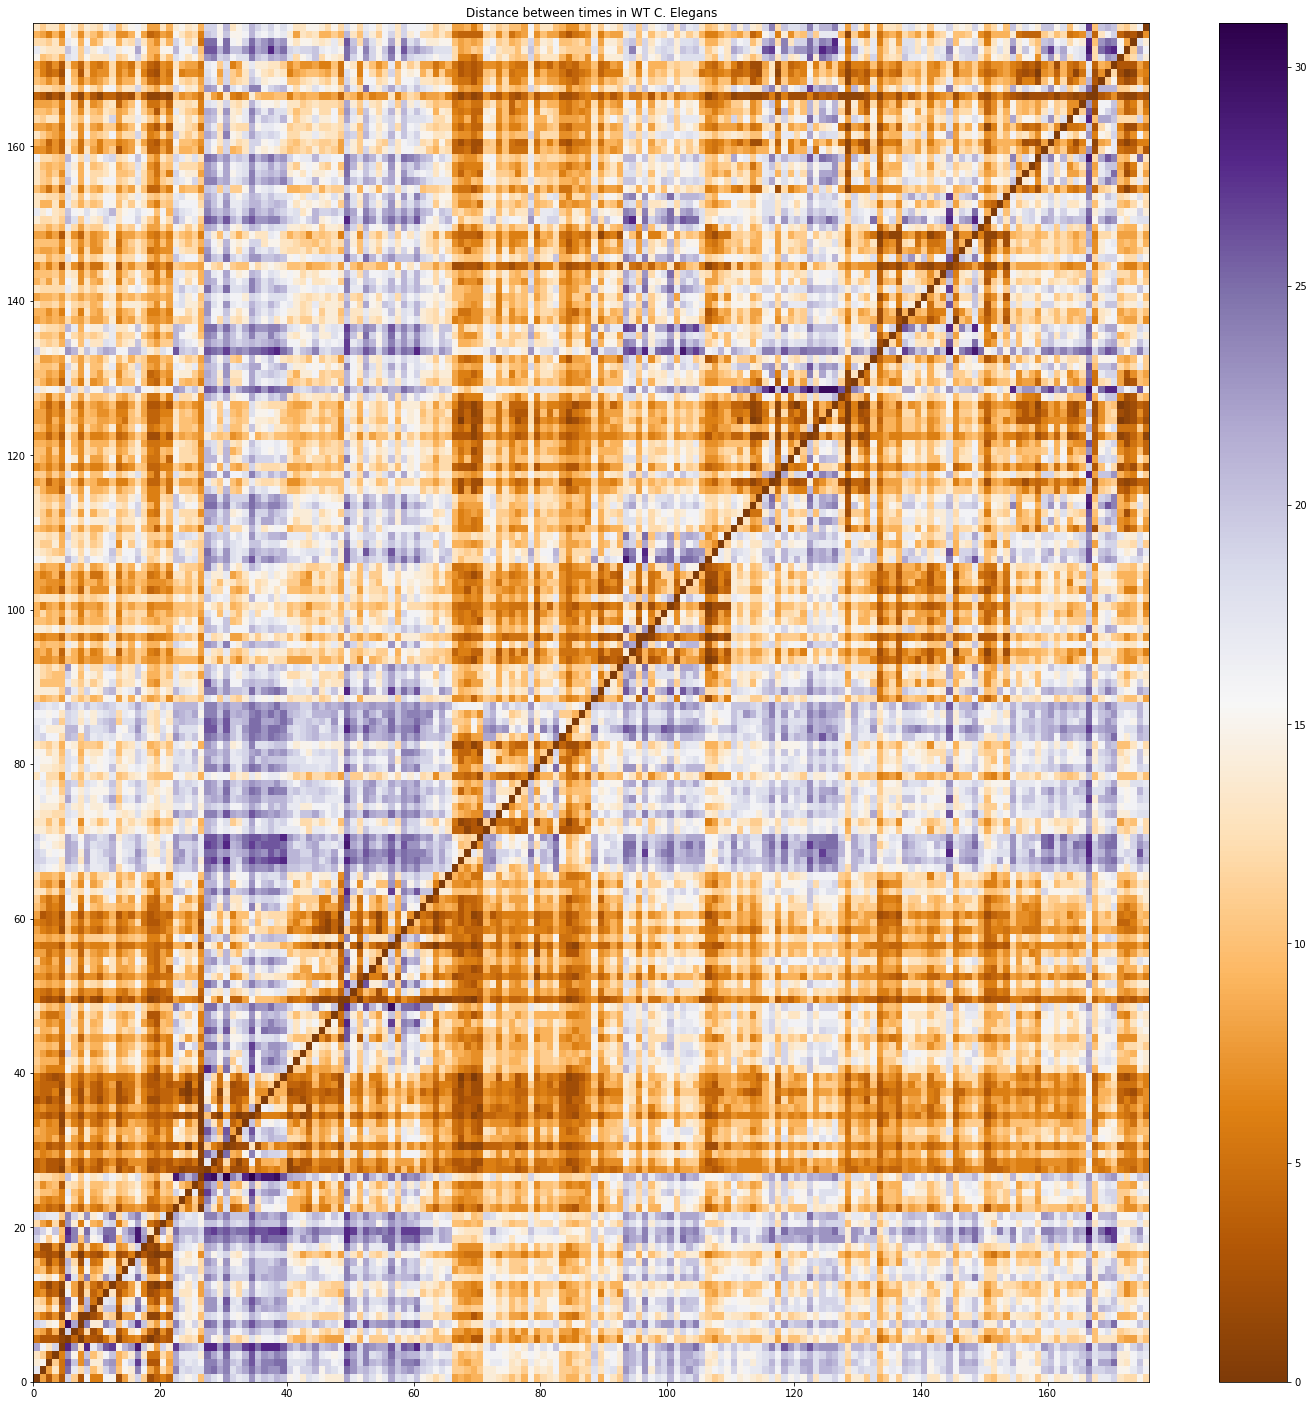

In [201]:
plot_2_examples(['PuOr'],self_b_mat_RNAi_eff[6*22:14*22].T[6*22:14*22])

In [202]:
self_b_mat_RNAi_eff = self_b_mat_RNAi_eff[6*22:14*22].T[6*22:14*22]

In [203]:
self_b_mat_RNAi_eff = self_b_mat_RNAi_eff.T

In [204]:
def third_comp(imp_mat):
    go = np.triu_indices(imp_mat.shape[0],1)
    return imp_mat.T[0:22,0:22][go].tolist() + imp_mat[0:22,0:22][go].tolist() 

In [205]:
#WT_no_notch = third_comp(self_b_mat_RNAi_eff.T[0:22,0:22])+third_comp(self_b_mat_RNAi_eff.T[3*22:4*22,3*22:4*22])+out_comp(self_b_mat_RNAi_eff.T[0:22,3*22:4*22])+out_comp(self_b_mat_RNAi_eff[0:22,3*22:4*22])
WT_notch_ABa = (self_b_mat_RNAi_eff.T[0:22,22:3*22].astype(int)).flatten().tolist() + (self_b_mat_RNAi_eff.T[3*22:4*22,22:3*22].astype(int)).flatten().tolist()
WT_notch_ABp = (self_b_mat_RNAi_eff.T[0:22,4*22:]).flatten().tolist() + (self_b_mat_RNAi_eff.T[3*22:4*22,4*22:]).flatten().tolist()

WT_no_notch = third_comp(self_b_mat_RNAi_eff.T[0:22,0:22])+third_comp(self_b_mat_RNAi_eff.T[3*22:4*22,3*22:4*22])
out_comp(self_b_mat_RNAi_eff.T[0:22,3*22:4*22])+out_comp(self_b_mat_RNAi_eff[0:22,3*22:4*22])

list(out_comp(self_b_mat_RNAi_eff.T[0:22,3*22:4*22]))+list(out_comp(self_b_mat_RNAi_eff[0:22,3*22:4*22]))

In [208]:
WT_no_notch = WT_no_notch + list(out_comp(self_b_mat_RNAi_eff.T[0:22,3*22:4*22]))+list(out_comp(self_b_mat_RNAi_eff[0:22,3*22:4*22]))

plt.hist(self_b_mat_RNAi_eff.T[0:22,3*22:4*22].flatten() + self_b_mat_RNAi_eff[0:22,3*22:4*22].flatten())

In [212]:
def out_comp(imp_mat):
    imp_mat = np.mat(imp_mat).flatten()
    return imp_mat.tolist()[0]

In [213]:
WT_no_notch = third_comp(self_b_mat_RNAi_eff.T[0:22,0:22])+third_comp(self_b_mat_RNAi_eff.T[3*22:4*22,3*22:4*22])+out_comp(self_b_mat_RNAi_eff.T[0:22,3*22:4*22])+out_comp(self_b_mat_RNAi_eff[0:22,3*22:4*22])


(Supplemental Figure 6B) Figure below

(array([ 10.,  19.,  30.,  45.,  44.,  54.,  61.,  65.,  86.,  98., 123.,
        106., 130., 130., 161., 156., 118.,  94.,  82.,  78.,  51.,  41.,
         37.,  25.,  19.,  13.,   4.,   5.,   6.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

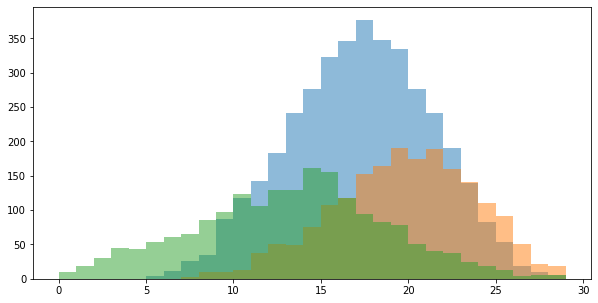

In [214]:
plt.hist(WT_notch_ABp, bins = range(30), alpha = 0.5)
plt.hist(WT_notch_ABa, bins = range(30), alpha = 0.5)
plt.hist(WT_no_notch, bins = range(30), alpha = 0.5)

In [714]:
(Supplemental Figure 7) Code below

In [215]:
transformation_assignments = {'APX-1': [('ABp', 'ABa')],
 'ATX-2': [('ABp', 'ABa'),
  ('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABara', 'ABala'),
  ('EMS', 'C')],
 'C49H3.8': [('ABala', 'ABara'), ('P2', 'EMS')],
 'CAMT-1': [('ABar', 'ABal'), ('ABara', 'ABala'), ('ABpra', 'ABpla')],
 'CDC-25.1': [('AB', 'ABp'), ('P1', 'P2')],
 'CDC-37': [('ABala', 'ABara'), ('ABalp', 'ABarp'), ('EMS', 'C'), ('P3', 'C')],
 'CEH-24': [('ABa', 'ABp'),
  ('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABarp', 'ABalp'),
  ('ABpla', 'ABpra')],
 'CHAF-2': [('ABala', 'ABara')],
 'CHK-1': [('ABala', 'ABara')],
 'CLS-2': [('AB', 'ABp')],
 'CPL-1': [('ABar', 'ABal'), ('ABala', 'ABara')],
 'CSN-4': [('ABa', 'ABp')],
 'CUL-1': [('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('MS', 'EMS'),
  ('C', 'EMS'),
  ('P4', 'P3')],
 'CUL-2': [('ABa', 'ABp')],
 'CUL-3': [('ABar', 'ABal'),
  ('ABala', 'ABarp'),
  ('ABpla', 'ABpra'),
  ('ABplp', 'ABpra'),
  ('ABpra', 'ABpla'),
  ('ABprp', 'ABpra')],
 'DIV-1': [('AB', 'ABp'), ('P1', 'P2')],
 'DLC-1': [('ABala', 'ABara')],
 'DLI-1': [('ABala', 'ABara')],
 'DRH-3': [('ABpla', 'ABplp')],
 'F23F1.5': [('ABa', 'ABp')],
 'F35F11.1': [('ABpla', 'ABpra')],
 'F44B9.8': [('EMS', 'C')],
 'GEI-17': [('C', 'MS')],
 'GLD-2': [('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABpra', 'ABpla'),
  ('E', 'MS'),
  ('P4', 'D')],
 'GLP-1': [('ABp', 'ABa'),
  ('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('ABpla', 'ABpra')],
 'GPB-1': [('ABarp', 'ABalp'), ('ABarp', 'ABara')],
 'GSK-3': [('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABpla', 'ABpra'),
  ('E', 'MS'),
  ('C', 'EMS')],
 'HDA-1': [('ABala', 'ABara')],
 'HMP-2': [('ABar', 'ABal')],
 'LAG-1': [('ABp', 'ABa'),
  ('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('ABpla', 'ABpra')],
 'LET-502': [('ABar', 'ABal'), ('ABala', 'ABara'), ('ABpra', 'ABpla')],
 'LIN-23': [('ABar', 'ABal'),
  ('ABpra', 'ABpla'),
  ('MS', 'EMS'),
  ('C', 'EMS'),
  ('P4', 'P3')],
 'MBK-2': [('AB', 'EMS'), ('EMS', 'C')],
 'MEI-1': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'MEX-3': [('D', 'P4')],
 'MEX-5': [('AB', 'EMS')],
 'MOM-2': [('ABar', 'ABal'), ('ABpra', 'ABpla'), ('E', 'MS')],
 'MOM-5': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'NMY-2': [('ABpla', 'ABpra')],
 'NPP-4': [('ABa', 'ABp'), ('ABpla', 'ABpra')],
 'NUD-1': [('ABala', 'ABara')],
 'OMA-1/2': [('ABar', 'ABal'),
  ('ABalp', 'ABarp'),
  ('ABpra', 'ABpla'),
  ('EMS', 'C')],
 'PAD-1': [('ABpla', 'ABpra')],
 'PAR-2': [('ABp', 'ABa'), ('ABar', 'ABal'), ('P2', 'EMS'), ('E', 'MS')],
 'PAR-3': [('ABar', 'ABal'), ('ABala', 'ABalp;ABara')],
 'PAR-6': [('ABp', 'ABa'),
  ('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('P2', 'EMS'),
  ('E', 'MS')],
 'PIE-1': [('ABp', 'ABa'), ('P2', 'EMS')],
 'PKC-3': [('ABp', 'ABa'), ('ABalp', 'ABarp'), ('P2', 'EMS'), ('E', 'MS')],
 'POP-1': [('ABpla', 'ABpra'), ('MS', 'E')],
 'POS-1': [('ABp', 'ABa'), ('ABar', 'ABal')],
 'PPFR-4': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'PUF-3': [('ABar', 'ABal')],
 'RAB-5': [('ABpla', 'ABpra')],
 'RAB-7': [('ABpra', 'ABpla')],
 'RAD-51': [('ABalp', 'ABara')],
 'RAN-4': [('ABa', 'ABp'), ('ABalp', 'ABarp'), ('ABpra', 'ABpla')],
 'RBA-1': [('ABala', 'ABara')],
 'RFC-3': [('AB', 'ABp')],
 'RGA-3': [('ABp', 'ABa'),
  ('ABar', 'ABal'),
  ('ABala', 'ABara'),
  ('ABpla', 'ABpra'),
  ('ABpra', 'ABpla')],
 'RUVB-1': [('ABpla', 'ABpra')],
 'SEL-8': [('ABp', 'ABa'), ('ABalp', 'ABarp'), ('ABara', 'ABala')],
 'SKN-1': [('ABalp', 'ABarp'),
  ('ABara', 'ABala'),
  ('ABpra', 'ABpla'),
  ('EMS', 'C')],
 'SRC-1': [('P4', 'D')],
 'SUF-1': [('ABpla', 'ABpra')],
 'T11G6.8': [('ABalp', 'ABara')],
 'TAG-256': [('ABar', 'ABal'), ('ABpra', 'ABpla')],
 'TAT-5': [('ABar', 'ABal'), ('ABala', 'ABara'), ('ABpra', 'ABpla')],
 'TSR-1': [('EMS', 'C')],
 'UBA-1': [('ABar', 'ABal')],
 'UBC-12': [('ABala', 'ABara'), ('ABarp', 'ABalp')],
 'VPS-4': [('ABala', 'ABara')],
 'WWP-1': [('ABa', 'ABp'), ('ABpla', 'ABpra')],
 'Y53F4B.22': [('ABpla', 'ABpra')],
 'ZYG-11': [('MS', 'EMS')],
 'ZYG-12': [('ABpla', 'ABpra')]}

In [ ]:
def scramble_individual(element):
    valuescramble = list(element.values())
    random.shuffle(valuescramble)
    keyscramble = list(element)
    random.shuffle(keyscramble)
    new_element = dict()
    for n in range(0,len(keyscramble)):
        new_element[keyscramble[n]] = valuescramble[n]
    return new_element

scramble_individual(fulldictset[0])

In [ ]:
transformed_sublineages = dict()
hits = 0
for n in transformation_assignments:
    origin = transformation_assignments[n][0][0]
    destination = transformation_assignments[n][0][1]
    #print(origin, destination)
    try:
        for pp in RNAi_size_assignments[n]:
            #print(pp)
            RNAi_org_scram = scramble_individual(node_comparison_trimmer(fulldictset[pp],origin))
            RNAi_org_scram = node_comparison_trimmer(fulldictset[pp],origin)
            #print(RNAi)
            for nn in RNAi_org_scram:
                print(origin + nn, RNAi_org_scram[nn])
                if origin + nn in transformed_sublineages:
                    transformed_sublineages[origin + nn].append(RNAi_org_scram[nn])
                else:
                    transformed_sublineages[origin + nn] = [RNAi_org_scram[nn]]
            '''
            for qq in inlier_ref:
                WT_dest_raw = node_comparison_trimmer(fulldictset[qq],destination)
                #print( "UBD" , union_branch_distance(RNAi_org_scram, WT_dest_raw))
                if union_branch_distance(RNAi_org_scram, WT_dest_raw) < diameters[root_cells_comp.index(destination)]:
                    hits = hits + 1
                    print(n,origin, "to", destination)
                    print("radius", diameters[root_cells_comp.index(destination)])
                    print( "UBD" , union_branch_distance(RNAi_org_scram, WT_dest_raw))'''
    except:
        pass

In [245]:
diameters = []
for n in root_cells_comp:
    diam_temp = 0
    for m in inlier_ref:
        q = node_comparison_trimmer(fulldictset[m],n)
        for l in inlier_ref:
            r = node_comparison_trimmer(fulldictset[l],n)
            #print(n,m,l)
            diam_temp = max(union_branch_distance(q,r), diam_temp)
    diameters.append(diam_temp)
    #print(n,diam_temp)

In [253]:
WT_lineages_truncated = []
for m in root_cells_comp:
    WT_lineages_truncated_0 = []
    for n in inlier_ref:
        print(n,m)
        WT_lineages_truncated_0.append(node_comparison_trimmer(fulldictset[n],m))
    WT_lineages_truncated.append(WT_lineages_truncated_0)

0 ABa
2 ABa
3 ABa
4 ABa
5 ABa
6 ABa
7 ABa
11 ABa
12 ABa
13 ABa
14 ABa
15 ABa
16 ABa
18 ABa
21 ABa
22 ABa
23 ABa
24 ABa
25 ABa
27 ABa
28 ABa
29 ABa
0 ABp
2 ABp
3 ABp
4 ABp
5 ABp
6 ABp
7 ABp
11 ABp
12 ABp
13 ABp
14 ABp
15 ABp
16 ABp
18 ABp
21 ABp
22 ABp
23 ABp
24 ABp
25 ABp
27 ABp
28 ABp
29 ABp
0 ABal
2 ABal
3 ABal
4 ABal
5 ABal
6 ABal
7 ABal
11 ABal
12 ABal
13 ABal
14 ABal
15 ABal
16 ABal
18 ABal
21 ABal
22 ABal
23 ABal
24 ABal
25 ABal
27 ABal
28 ABal
29 ABal
0 ABar
2 ABar
3 ABar
4 ABar
5 ABar
6 ABar
7 ABar
11 ABar
12 ABar
13 ABar
14 ABar
15 ABar
16 ABar
18 ABar
21 ABar
22 ABar
23 ABar
24 ABar
25 ABar
27 ABar
28 ABar
29 ABar
0 ABpl
2 ABpl
3 ABpl
4 ABpl
5 ABpl
6 ABpl
7 ABpl
11 ABpl
12 ABpl
13 ABpl
14 ABpl
15 ABpl
16 ABpl
18 ABpl
21 ABpl
22 ABpl
23 ABpl
24 ABpl
25 ABpl
27 ABpl
28 ABpl
29 ABpl
0 ABpr
2 ABpr
3 ABpr
4 ABpr
5 ABpr
6 ABpr
7 ABpr
11 ABpr
12 ABpr
13 ABpr
14 ABpr
15 ABpr
16 ABpr
18 ABpr
21 ABpr
22 ABpr
23 ABpr
24 ABpr
25 ABpr
27 ABpr
28 ABpr
29 ABpr
0 ABala
2 ABala
3 ABala
4 ABal

In [254]:
WT_lineages_truncated_dict = dict()
for n in range(len(WT_lineages_truncated)):
    print(n, root_cells_comp[n] ,len(WT_lineages_truncated[n]))
    WT_lineages_truncated_dict[root_cells_comp[n]] = WT_lineages_truncated[n]

0 ABa 22
1 ABp 22
2 ABal 22
3 ABar 22
4 ABpl 22
5 ABpr 22
6 ABala 22
7 ABalp 22
8 ABara 22
9 ABarp 22
10 ABpla 22
11 ABplp 22
12 ABpra 22
13 ABprp 22
14 EMS 22
15 P2 22
16 MS 22
17 E 22
18 C 22
19 P3 22
20 D 22


In [269]:
bit= 0
transformation_assignments_counter = []
for n in transformation_assignments:
    for nn in transformation_assignments[n]:
        origin = transformation_assignments[n][0][0]
        destination = transformation_assignments[n][0][1]
        for nnn in RNAi_size_assignments[n]:
            bit = bit + 1
            #print(n,origin,destination,nnn)
            RNAi_org_scram = node_comparison_trimmer(fulldictset[nnn],origin)
            RNAi_org_scram_2 = dict()
            for nnnn in list(RNAi_org_scram):
                RNAi_org_scram_2[nnnn] = random.choice(transformed_sublineages[origin + nnnn])
            hits = 0
            for qq in inlier_ref:
                WT_dest_raw = node_comparison_trimmer(fulldictset[qq],destination)
                try:
                    print(diameters[root_cells_comp.index(destination)])
                    if union_branch_distance(RNAi_org_scram_2, WT_dest_raw) < diameters[root_cells_comp.index(destination)]:
                        hits = hits + 1
                except:
                    pass
            transformation_assignments_counter.append(hits)

44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409

22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655

42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.0750816

30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.4651440

42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.0750816

42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.79449471770337
21.7944947

44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409

22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655731186
22.707377655

30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.4651440

30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.4651440

30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.4651440

30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.0

30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.46514401738485
30.4651440

42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485
44.070256409510485


26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319999575
26.040833319

42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.07508169926709
42.0750816

In [276]:
#replace 10000 with the number of iterations
bit = 0
perm_test_HT = [];perm_test_HT_22 = []
for bbb in range(10000):
    if bbb % 10 == 0: print(bbb)
    transformation_assignments_counter = []
    for n in transformation_assignments:
        for nn in transformation_assignments[n]:
            origin = transformation_assignments[n][0][0]
            destination = transformation_assignments[n][0][1]
            for nnn in RNAi_size_assignments[n]:
                bit = bit + 1
                RNAi_org_scram = node_comparison_trimmer(fulldictset[nnn],origin)
                RNAi_org_scram_2 = dict()
                for nnnn in list(RNAi_org_scram):
                    RNAi_org_scram_2[nnnn] = random.choice(transformed_sublineages[origin + nnnn])
                hits = 0
                #deedeedee = diameters[root_cells_comp.index(destination)]
                try:
                    deedeedee = diameters[root_cells_comp.index(destination)]
                    #print(deedeedee)
                    for qq in WT_lineages_truncated_dict[destination]:
                        #WT_dest_raw = qq
                        UBD = union_branch_distance(RNAi_org_scram_2, qq)
                        #print()
                        #print(UBD, deedeedee)
                        if UBD < deedeedee:
                            hits = hits + 1
                        elif UBD > 2 * deedeedee:
                            break
                    transformation_assignments_counter.append(hits)
                except:
                    pass
    transformation_assignments_counter = np.array(transformation_assignments_counter)
    perm_test_HT.append(np.count_nonzero(transformation_assignments_counter))
    perm_test_HT_22.append(np.count_nonzero(transformation_assignments_counter == 22))
    #print( len(transformation_assignments_counter) , np.count_nonzero(transformation_assignments_counter ) , np.count_nonzero(transformation_assignments_counter == 22))


'\nbit = 0\nperm_test_HT = [];perm_test_HT_22 = []\nfor bbb in range(10000):\n    if bbb % 10 == 0: print(bbb)\n    transformation_assignments_counter = []\n    for n in transformation_assignments:\n        for nn in transformation_assignments[n]:\n            origin = transformation_assignments[n][0][0]\n            destination = transformation_assignments[n][0][1]\n            for nnn in RNAi_size_assignments[n]:\n                bit = bit + 1\n                RNAi_org_scram = node_comparison_trimmer(fulldictset[nnn],origin)\n                RNAi_org_scram_2 = dict()\n                for nnnn in list(RNAi_org_scram):\n                    RNAi_org_scram_2[nnnn] = random.choice(transformed_sublineages[origin + nnnn])\n                hits = 0\n                #deedeedee = diameters[root_cells_comp.index(destination)]\n                try:\n                    deedeedee = diameters[root_cells_comp.index(destination)]\n                    #print(deedeedee)\n                    for qq in 

(Supplemental Figure 7B) Figure below

Text(0.5, 0, 'Number of WT Neighbors of shuffled transformed lineages ')

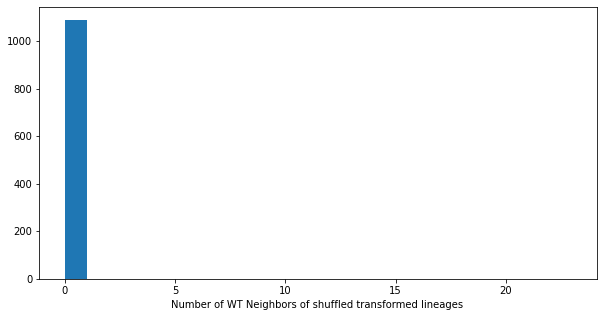

In [279]:
plt.hist(transformation_assignments_counter, bins = range(0,24))
plt.xlabel("Number of WT Neighbors of shuffled transformed lineages ")

(Supplemental Figure 7C) Figure below

Text(0.5, 0, 'Number of shuffled homeotic transformations with 22 WT lineage neighbors ')

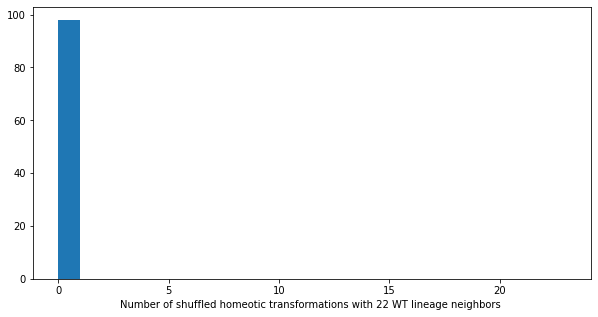

In [281]:
plt.hist(perm_test_HT_22, bins = range(0,24))
plt.xlabel("Number of shuffled homeotic transformations with 22 WT lineage neighbors ")

(Supplemental Figure 7D) Figure below

Text(0.5, 0, 'Number of shuffled homeotic transformations with 1+ WT lineage neighbors ')

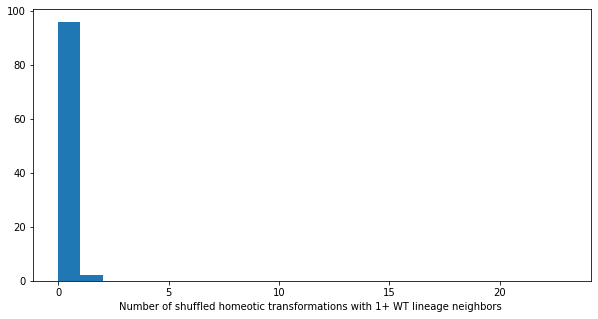

In [280]:
plt.hist(perm_test_HT, bins = range(0,24))
plt.xlabel("Number of shuffled homeotic transformations with 1+ WT lineage neighbors ")

In [283]:
#REFERENCE_ME
All_Rand_neighbors = []; All_Rand_neighbors_22 = []; 

In [290]:
#print("Knocked Down Gene, embryo, sublineage, number of WT neighbors, WT neighbor sublineages")
deliberations = 10000
for klep in range(0,deliberations):
    #f.write("Knocked Down Gene, embryo, sublineage, number of WT neighbors, WT neighbor sublineages")
    full_counter = []
    for an in range(len(fulldictset))[30:]:
        if an % 50: print(an/len(fulldictset))
        n = fulldictset[an]
        for m in root_cells_comp:
            #if RNAi_name_array[an] in transformation_assignments_format and m in transformation_assignments_format[RNAi_name_array[an]]:
            #    continue
            unperturbed = n#node_comparison_trimmer(n, m)
            shuffled = dict()
            for lol in unperturbed:
                #print(lol, unperturbed[lol])
                try:
                    #print()
                    shuffled[lol] = random.choice(fulldictset[30:])[lol]
                    #shuffled[lol] = cracked_dict_2[lol][0]
                except:
                    shuffled[lol] = 0
                    #print(0)
            unperturbed = node_comparison_trimmer(shuffled, m)
            max_val = 0; max_lin = ""
            for nn in range(len(WT_lineages_truncated)):
                counter = 0
                for nnn in range(len(WT_lineages_truncated[0])):
                    ubed = union_branch_distance(unperturbed,WT_lineages_truncated[nn][nnn] )
                    if ubed <= diameters[nn]:
                        counter = counter + 1;
                    elif ubed > 2 * diameters[nn]:
                        break
                if counter > max_val:
                    max_val = counter; 
            full_counter.append(max_val)
    full_counter = np.array(full_counter)
    break
    #print(, )
    All_Rand_neighbors.append(np.count_nonzero(full_counter))
    All_Rand_neighbors_22.append(np.count_nonzero(full_counter == 22))
    if klep % 5 == 0: print(klep / deliberations)

            #print()

In [ ]:
np.histogram(full_counter)

In [298]:
np.count_nonzero(np.array(full_counter) == 0)

27659

(Supplemental Figure 7F) Figure below

Text(0.5, 0, 'Number of WT Neighbors of all shuffled lineages ')

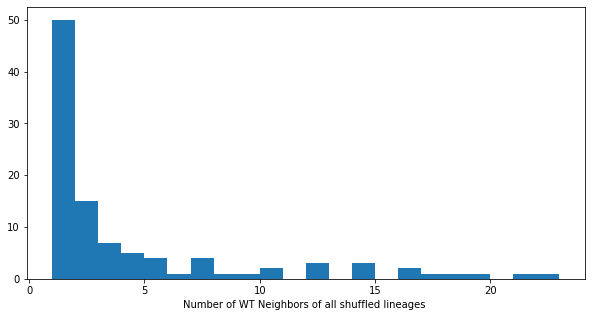

In [295]:
plt.hist(full_counter, bins = range(1,24))
plt.xlabel("Number of WT Neighbors of all shuffled lineages ")

(Supplemental Figure 7G) Figure below

Text(0.5, 0, 'Number of shuffled RNAi lineages with 22 WT lineage neighbors ')

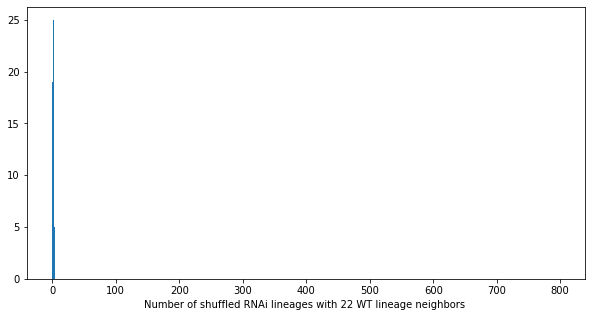

In [286]:
plt.hist(All_Rand_neighbors_22, bins = range(0,800))
plt.xlabel("Number of shuffled RNAi lineages with 22 WT lineage neighbors ")

(Supplemental Figure 7H) Figure below

Text(0.5, 0, 'Number of shuffled RNAi lineages with 1+ WT lineage neighbors ')

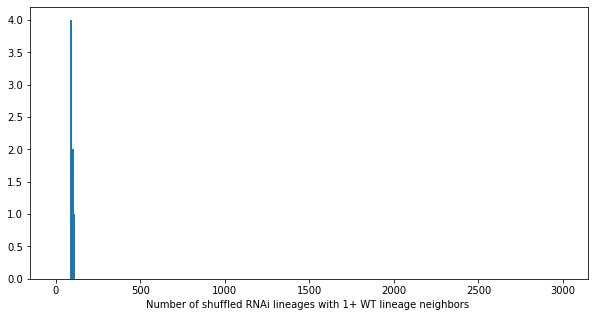

In [287]:
plt.hist(All_Rand_neighbors, bins = range(0,3000))
plt.xlabel("Number of shuffled RNAi lineages with 1+ WT lineage neighbors ")dd